<h2><center><h1><center><font color='Purple'> Telecom<font color='LightGreen'> Chrun <font color='Red'> Case <font color='Orange'>Study <font color='LightBlue'> Assignement 

<h4><center> By <br><br>
Farooq Ahmed,MSc IBF(Liverpool JMU), MBA (City London), EPAT <br>
email <font color='Blue'>Farooqams@hotmail.com<font color='Blue'>

<h2><center> Dec 2021<br><br>

# Objective of the Assignment 


### The assignement required to build a logistic regression model or a model from the tree family for customer retention using PCA in order to predict the customer chrun.

### Modelling : 
Build models to predict churn. 

### steps to build the model:

Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

Derive new features.

Reduce the number of variables using PCA.

Train a variety of models, tune model hyperparameters, etc. 
##### Due to limitation of time we limited to Random forest classifier without model hyperparameters

Evaluate the models using appropriate evaluation metrics. 

### Recommend strategies to manage customer churn based on your observations.

### We will approach the problem by  assessing the significant drivers and identifying the problem by Pythonic way, reducing duplcating task. Where possible / applicable. 


# Import Library

We import following libraries 

In [1]:
%%time

# Basic Libraries
import warnings
warnings.filterwarnings('ignore')
import datetime ## download to convert loan formating
import numpy as np 
import pandas as pd
import seaborn as sns ## download for using rich sea-born theme 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from IPython.display import display, HTML

# Processing Libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model Libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from scipy.stats import norm
from sklearn.decomposition import PCA

# Model Optimizing & Scoring and Feature Selection Libraries 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


# Visual Parameters
sns.set_style('white') 
sns.color_palette("rocket", as_cmap=True)
sns.light_palette("green", as_cmap=True)
plt.rcParams['font.family'] = 'serif'
plt.style.use('seaborn-bright')
%matplotlib inline
pd.set_option("display.max_rows",300)
pd.set_option("display.max_columns",300)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 30)
pd.options.display.float_format = "{:,.2f}".format ## This libary parameter is downloaded keep the loan in Notional Decimal.

# System Library 
import os

# Processing Benchmarking Library
from tqdm import tqdm
from tqdm.notebook import trange, tqdm

Wall time: 2.62 s


## Download  and Cleaning Data


We download the telecom_churn_data.csv data

In [2]:
df= pd.read_csv('telecom_churn_data.csv',encoding = "ISO-8859-1",parse_dates=True)

We check how many columns are there in the raw data.

In [3]:
df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

We also check how the raw data and analysed. And, decides which items we need to maniplate by dummpy variables or by scaling. 

In [4]:
display(df.head(10))

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7001865778        109            0.00            0.00            0.00   
2     7001625959        109            0.00            0.00            0.00   
3     7001204172        109            0.00            0.00            0.00   
4     7000142493        109            0.00            0.00            0.00   
5     7000286308        109            0.00            0.00            0.00   
6     7001051193        109            0.00            0.00            0.00   
7     7000701601        109            0.00            0.00            0.00   
8     7001524846        109            0.00            0.00            0.00   
9     7001864400        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   
5            6/30/2014            7/31/2014            8/31/2014   
6            6/30/2014            7/31/2014            8/31/2014   
7            6/30/2014            7/31/2014            8/31/2014   
8            6/30/2014            7/31/2014            8/31/2014   
9            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014   197.38   214.82   213.80   21.10          NaN   
1            9/30/2014    34.05   355.07   268.32   86.28        24.11   
2            9/30/2014   167.69   189.06   210.23  290.71        11.54   
3            9/30/2014   221.34   251.10   508.05  389.50        99.91   
4            9/30/2014   261.64   309.88   238.17  163.43        50.31   
5            9/30/2014    50.26    58.81    83.39  170.83        50.16   
6            9/30/2014   429.02   190.70   255.11  114.75        71.03   
7            9/30/2014 1,069.18 1,349.85 3,171.48  500.00        57.84   
8            9/30/2014   378.72   492.22   137.36  166.79       413.69   
9            9/30/2014   119.52   247.44   170.23  160.04        33.89   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   
5        43.63        85.48       138.79         19.28         13.44   
6        45.03        76.66        15.23        262.73         49.24   
7        54.68        52.29          NaN        453.43        567.16   
8       351.03        35.08        33.46         94.66         80.63   
9        30.11        22.43        27.84         63.48         54.16   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   
5         14.46         46.91           0.00           0.00           0.00   
6         92.08         50.33           0.00           0.00           0.00   
7        325.91           NaN          16.23          33.49          31.64   
8        136.48        108.71           0.00           0.00           0.00

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


None

In [6]:
df.shape

(99999, 226)

The decribe data help use to understand the minimum and maximum

In [7]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count        99,999.00  99,999.00       98,981.00       98,981.00   
mean  7,001,207,270.39     109.00            0.00            0.00   
std         695,669.39       0.00            0.00            0.00   
min   7,000,000,074.00     109.00            0.00            0.00   
25%   7,000,606,232.50     109.00            0.00            0.00   
50%   7,001,204,632.00     109.00            0.00            0.00   
75%   7,001,812,030.50     109.00            0.00            0.00   
max   7,002,410,905.00     109.00            0.00            0.00   

       loc_ic_t2o_mou    arpu_6    arpu_7    arpu_8    arpu_9  onnet_mou_6  \
count       98,981.00 99,999.00 99,999.00 99,999.00 99,999.00    96,062.00   
mean             0.00    282.99    278.54    279.15    261.65       132.40   
std              0.00    328.44    338.16    344.47    342.00       297.21   
min              0.00 -2,258.71 -2,014.05   -945.81 -1,899.51         0.00   
25%              0.00     93.41     86.98     84.13     62.69         7.38   
50%              0.00    197.70    191.64    192.08    176.85        34.31   
75%              0.00    371.06    365.34    369.37    353.47       118.74   
max              0.00 27,731.09 35,145.83 33,543.62 38,805.62     7,376.71   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count    96,140.00    94,621.00    92,254.00     96,062.00     96,140.00   
mean        133.67       133.02       130.30        197.94        197.05   
std         308.79       308.95       308.48        316.85        325.86   
min           0.00         0.00         0.00          0.00          0.00   
25%           6.66         6.46         5.33         34.73         32.19   
50%          32.33        32.36        29.84         96.31         91.73   
75%         115.59       115.86       112.13        231.86        226.82   
max       8,157.78    10,752.56    10,427.46      8,362.36      9,667.13   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count     94,621.00     92,254.00      96,062.00      96,140.00   
mean         196.57        190.34           9.95           7.15   
std          327.17        319.40          72.83          73.45   
min            0.00          0.00           0.00           0.00   
25%           31.63         27.13           0.00           0.00   
50%           92.14         87.29           0.00           0.00   
75%          228.26        220.50           0.00           0.00   
max       14,007.34     10,310.76      13,724.38      15,371.04   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count      94,621.00      92,254.00      96,062.00      96,140.00   
mean            7.29           6.34          13.91           9.82   
std            68.40          57.14          71.44          58.46   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max        13,095.36       8,464.03       3,775.11       2,812.04   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count      94,621.00      92,254.00         96,062.00         96,140.00   
mean            9.97           8.56             47.10             46.47   
std            64.71          58.44            150.86            155.32   
min             0.00           0.00              0.00              0.00   
25%             0.00           0.00              1.66              1.63   
50%             0.00           0.00             11.91             11.61   
75%             0.00           0.00             40.96             39.91   
max         5,337.04       4,428.46          6,431.33          7,400.66   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count         94

We check in the dataset characteristics and data dictonary

In [8]:
## Dataset characteristics

''' Acronyms    	Descriptions
MOBILE_NUMBER	Customer phone number
CIRCLE_ID	Telecom circle area to which the customer belongs to
LOC	Local calls - within same telecom circle
STD	STD calls - outside the calling circle
IC	Incoming calls
OG	Outgoing calls
T2T	Operator T to T, i.e. within same operator (mobile to mobile)
T2M    	Operator T to other operator mobile
T2O    	Operator T to other operator fixed line
T2F    	Operator T to fixed lines of T
T2C    	Operator T to it’s own call center
ARPU    	Average revenue per user
MOU    	Minutes of usage - voice calls
AON    	Age on network - number of days the customer is using the operator T network
ONNET   	All kind of calls within the same operator network
OFFNET    	All kind of calls outside the operator T network
ROAM	Indicates that customer is in roaming zone during the call
SPL   	Special calls
ISD    	ISD calls
RECH    	Recharge
NUM    	Number
AMT    	Amount in local currency
MAX    	Maximum
DATA    	Mobile internet
3G    	3G network
AV    	Average
VOL    	Mobile internet usage volume (in MB)
2G    	2G network
PCK    	Prepaid service schemes called - PACKS
NIGHT    	Scheme to use during specific night hours only
MONTHLY    	Service schemes with validity equivalent to a month
SACHET   	Service schemes with validity smaller than a month
*.6    	KPI for the month of June
*.7    	KPI for the month of July
*.8    	KPI for the month of August
*.9    	KPI for the month of September
FB_USER	Service scheme to avail services of Facebook and similar social networking sites
VBC    	Volume based cost - when no specific scheme is not purchased and paid as per usage '''


' Acronyms    \tDescriptions\nMOBILE_NUMBER\tCustomer phone number\nCIRCLE_ID\tTelecom circle area to which the customer belongs to\nLOC\tLocal calls - within same telecom circle\nSTD\tSTD calls - outside the calling circle\nIC\tIncoming calls\nOG\tOutgoing calls\nT2T\tOperator T to T, i.e. within same operator (mobile to mobile)\nT2M    \tOperator T to other operator mobile\nT2O    \tOperator T to other operator fixed line\nT2F    \tOperator T to fixed lines of T\nT2C    \tOperator T to it’s own call center\nARPU    \tAverage revenue per user\nMOU    \tMinutes of usage - voice calls\nAON    \tAge on network - number of days the customer is using the operator T network\nONNET   \tAll kind of calls within the same operator network\nOFFNET    \tAll kind of calls outside the operator T network\nROAM\tIndicates that customer is in roaming zone during the call\nSPL   \tSpecial calls\nISD    \tISD calls\nRECH    \tRecharge\nNUM    \tNumber\nAMT    \tAmount in local currency\nMAX    \tMaximum

## Data Preparation from the above characteristics

we will check categorical and continues variables, further reduce the NA / Blank data to certain threshold acceptable in modelling

In [9]:
# Create List of Categorical and Continues Variables 
CatrgoricalCols = []
ContinuesCols = []

for col in list(df):
    if df[col].dtypes == 'object':
        CatrgoricalCols.append(col)  
    else:
        ContinuesCols.append(col)
print('Categorical columns:\n',CatrgoricalCols)

print('Continues Variable columns:\n',ContinuesCols)

Categorical columns:
 ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']
Continues Variable columns:
 ['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'lo

In [10]:
df.isnull().sum().sort_values(ascending = False).head(10)

arpu_3g_6                   74846
night_pck_user_6            74846
total_rech_data_6           74846
arpu_2g_6                   74846
max_rech_data_6             74846
fb_user_6                   74846
av_rech_amt_data_6          74846
date_of_last_rech_data_6    74846
count_rech_2g_6             74846
count_rech_3g_6             74846
dtype: int64

In [11]:
(df.isnull().sum() / df.count()).sort_values(ascending = False).head(10)

arpu_3g_6                  2.98
night_pck_user_6           2.98
total_rech_data_6          2.98
arpu_2g_6                  2.98
max_rech_data_6            2.98
fb_user_6                  2.98
av_rech_amt_data_6         2.98
date_of_last_rech_data_6   2.98
count_rech_2g_6            2.98
count_rech_3g_6            2.98
dtype: float64

In [12]:
def columns_drops(cols):
    for col in cols:
        if (df[col].isna().sum()/len(df)) > 20:   
            df.drop(columns=[col],inplace=True)

In [13]:
columns_drops(df.columns)

In [14]:
(df.isnull().sum() / df.count()).sort_values(ascending = False).head(10)

arpu_3g_6                  2.98
night_pck_user_6           2.98
total_rech_data_6          2.98
arpu_2g_6                  2.98
max_rech_data_6            2.98
fb_user_6                  2.98
av_rech_amt_data_6         2.98
date_of_last_rech_data_6   2.98
count_rech_2g_6            2.98
count_rech_3g_6            2.98
dtype: float64

In [15]:
(df.isnull().sum() / df.count()).sort_values(ascending = False).head(10)

arpu_3g_6                  2.98
night_pck_user_6           2.98
total_rech_data_6          2.98
arpu_2g_6                  2.98
max_rech_data_6            2.98
fb_user_6                  2.98
av_rech_amt_data_6         2.98
date_of_last_rech_data_6   2.98
count_rech_2g_6            2.98
count_rech_3g_6            2.98
dtype: float64

In [16]:
df = df.fillna(0)

We re-check the data , after updating the custom features

In [17]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7001865778        109            0.00            0.00            0.00   
2     7001625959        109            0.00            0.00            0.00   
3     7001204172        109            0.00            0.00            0.00   
4     7000142493        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014  197.38  214.82  213.80   21.10         0.00   
1            9/30/2014   34.05  355.07  268.32   86.28        24.11   
2            9/30/2014  167.69  189.06  210.23  290.71        11.54   
3            9/30/2014  221.34  251.10  508.05  389.50        99.91   
4            9/30/2014  261.64  309.88  238.17  163.43        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00           0.00           0.00           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0           0.00           0.00           0.00           0.00           0.00   
1           0.00           0.00           0.00           0.00           0.00   
2          38.49           0.00           0.00           0.00          70.94   
3           0.00           0.00          28.09          39.04           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              0.00              0.00              0.00              0.00   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00              0.00              0.00              0.00   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06  

## EDA Univariate Analysis

we decided to run the EDA analysis to understand the data

  0%|          | 0/225 [00:00<?, ?it/s]

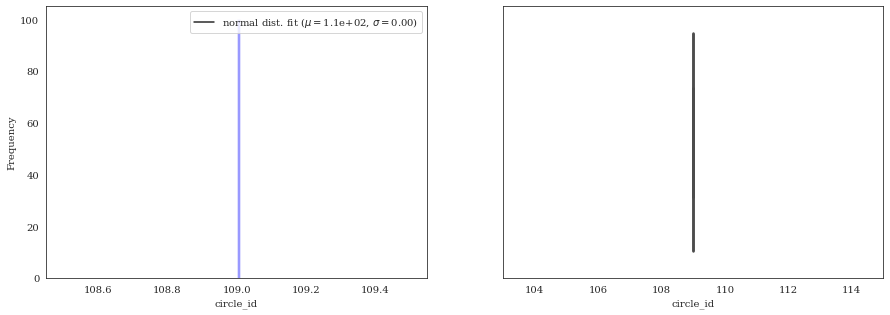

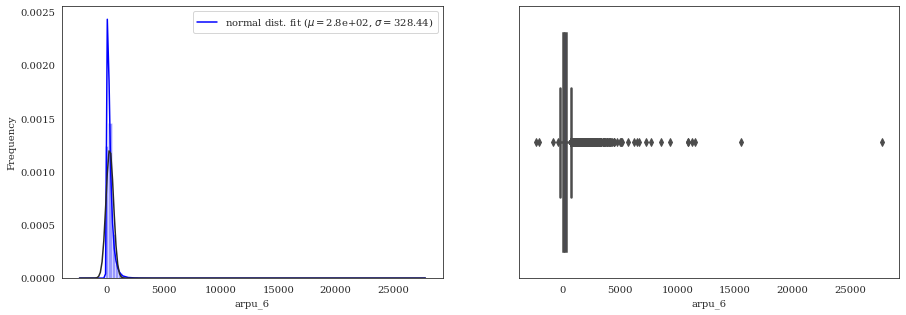

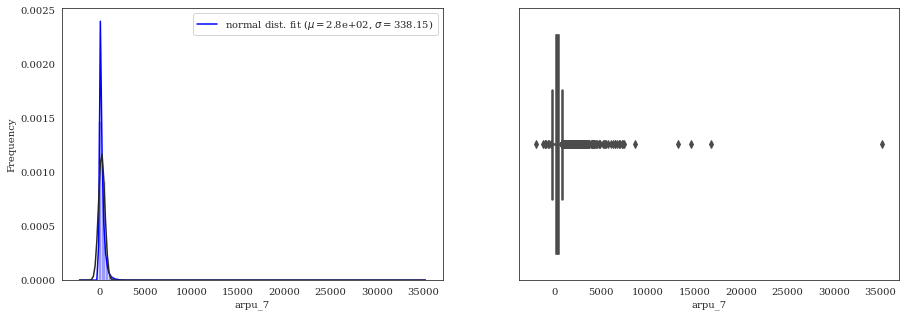

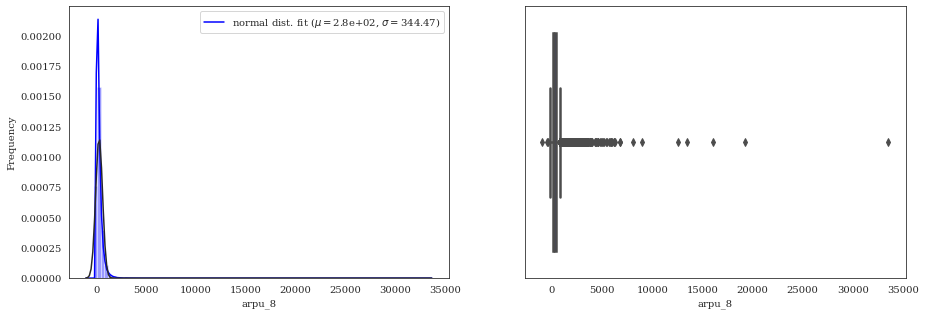

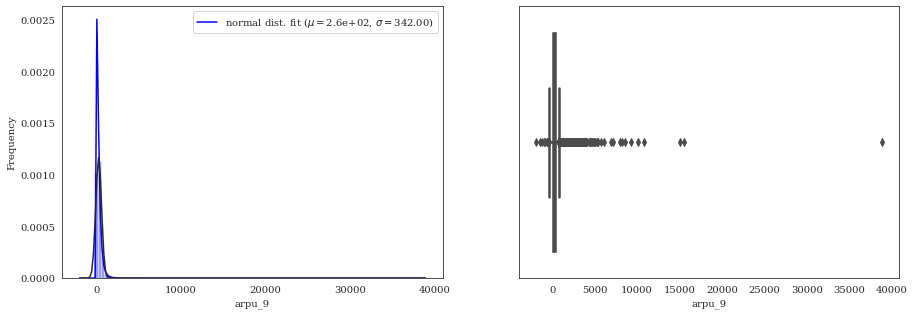

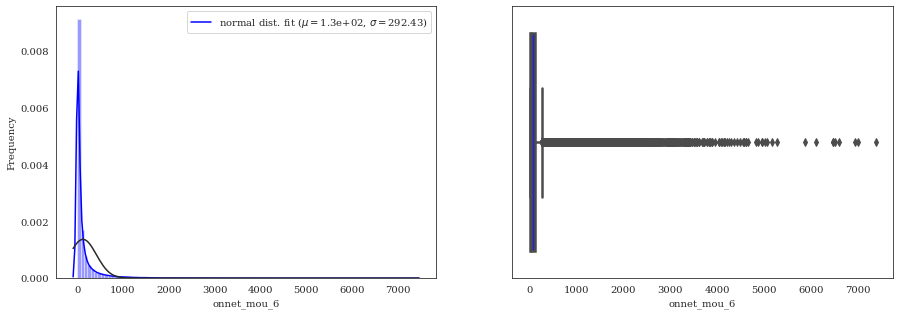

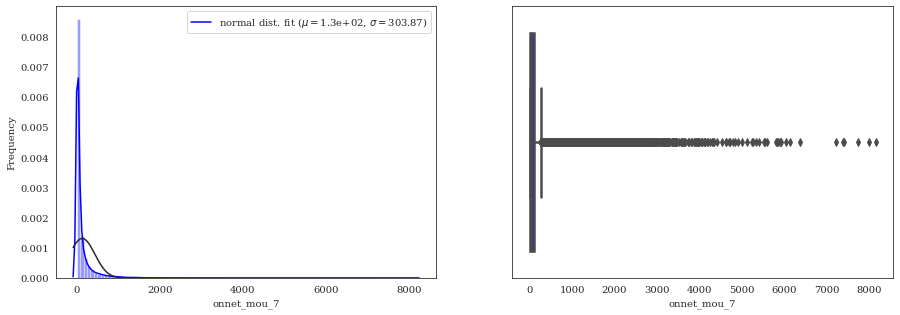

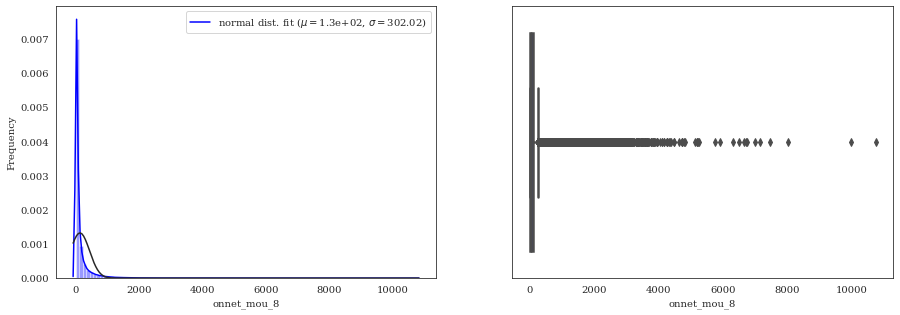

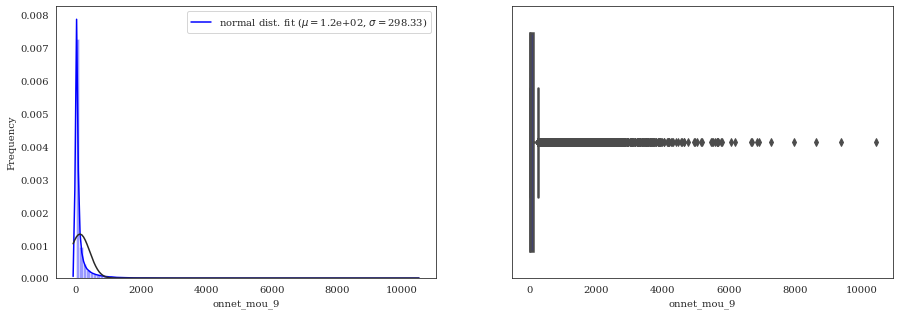

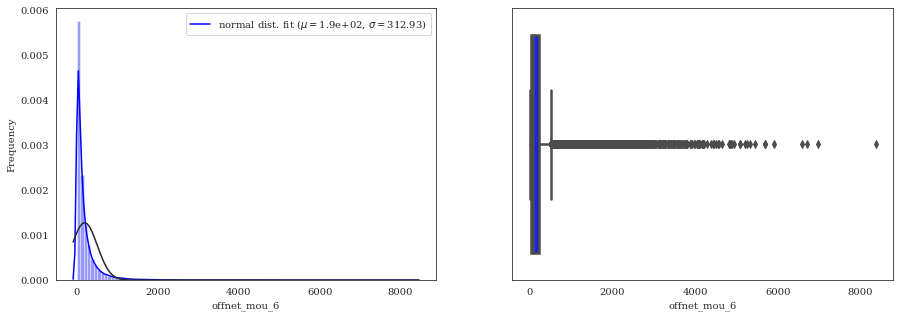

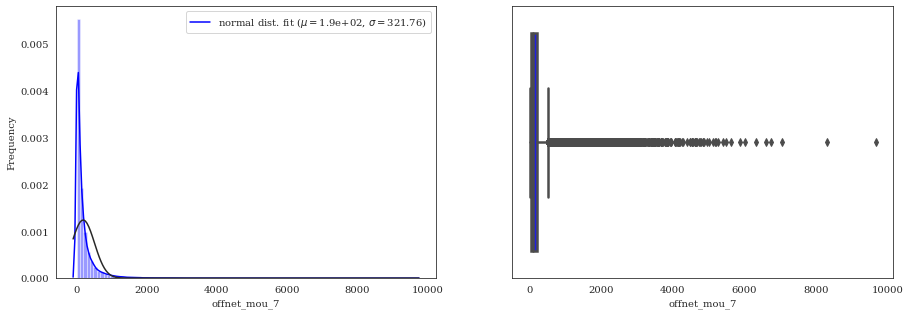

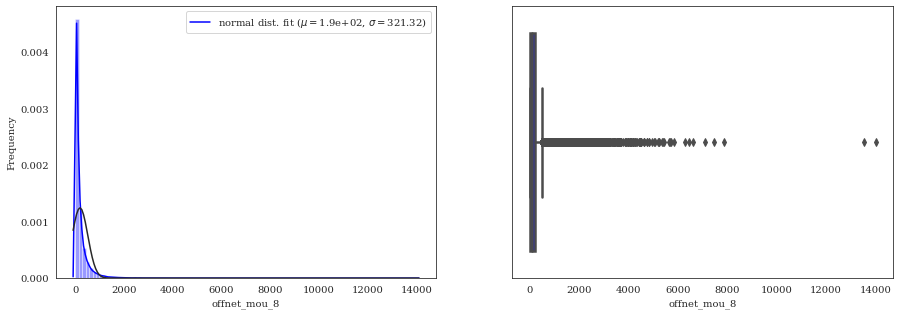

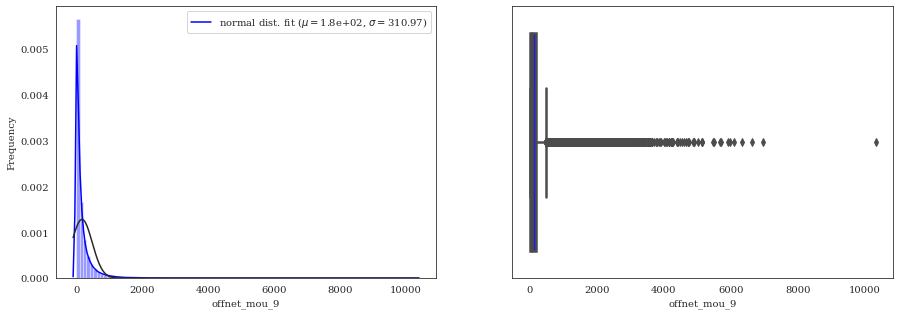

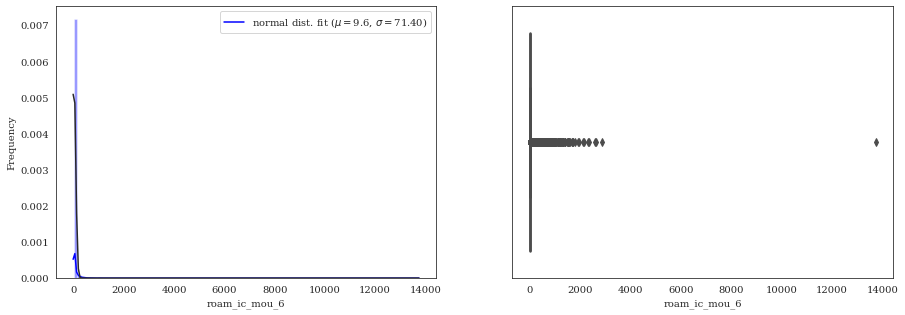

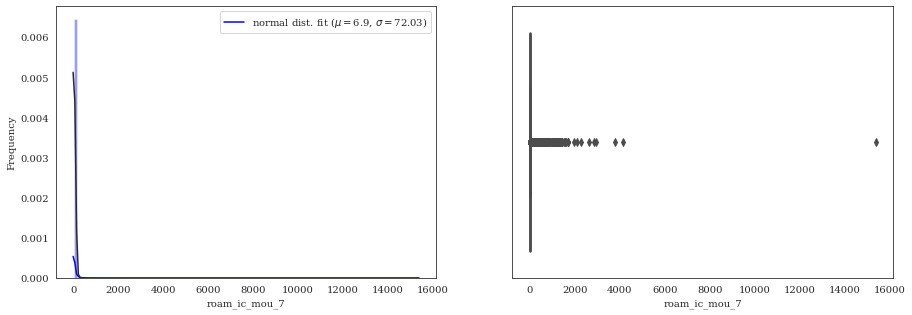

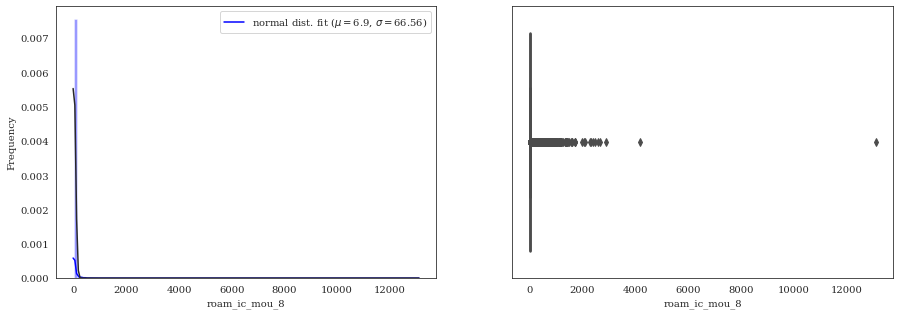

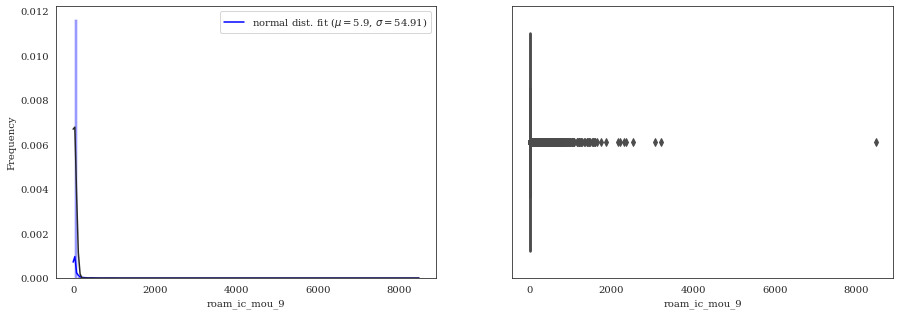

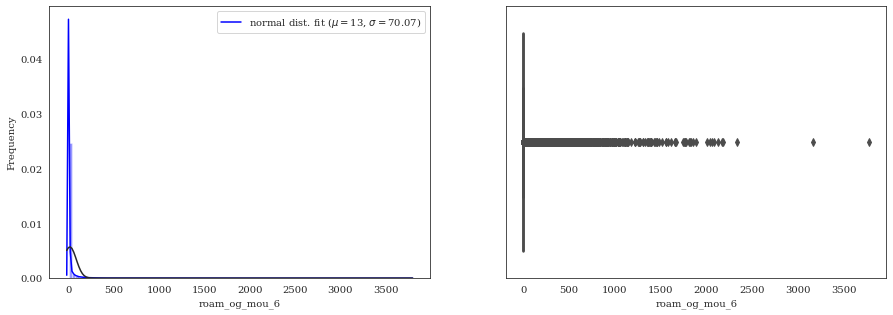

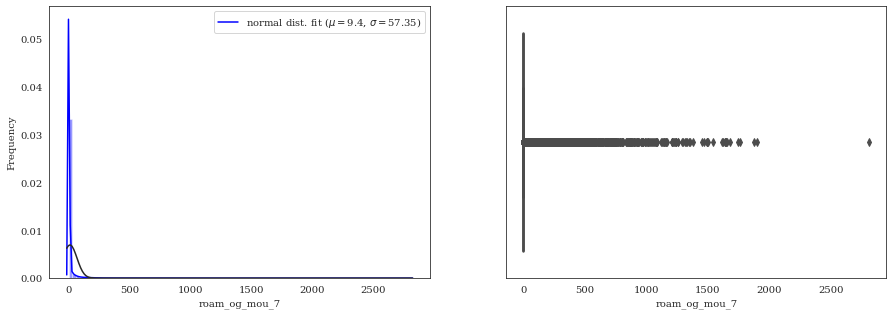

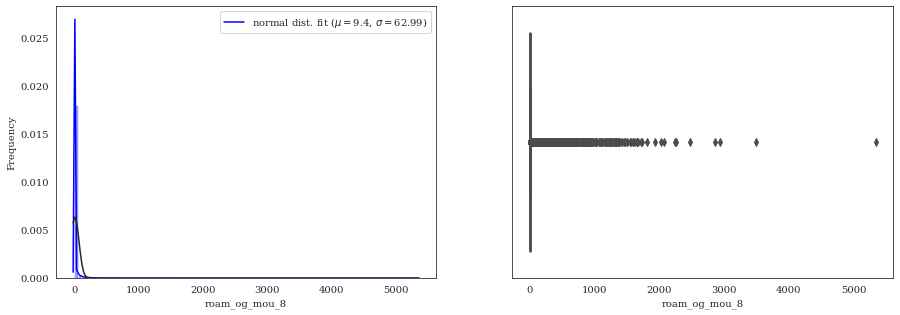

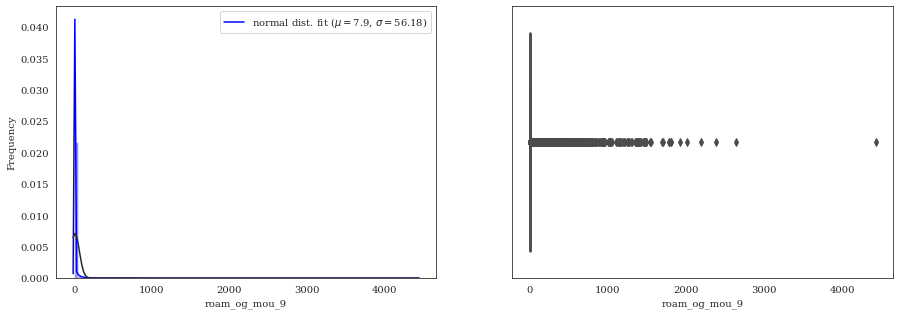

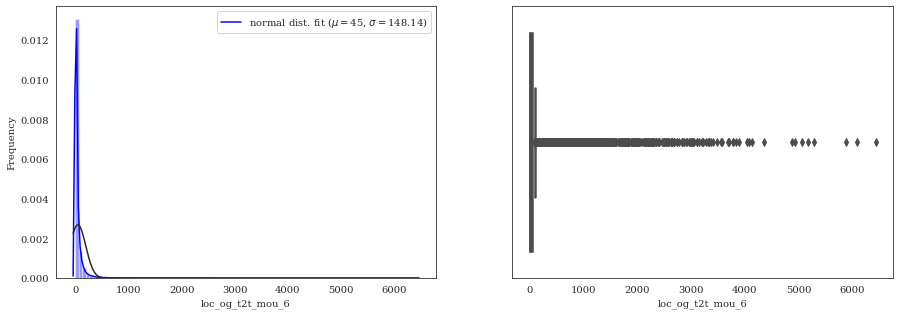

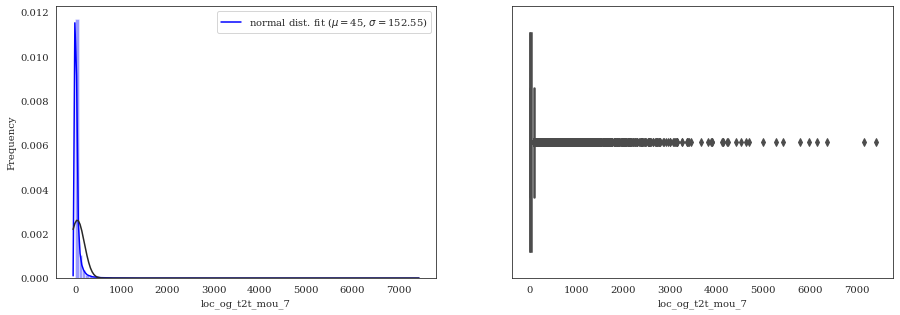

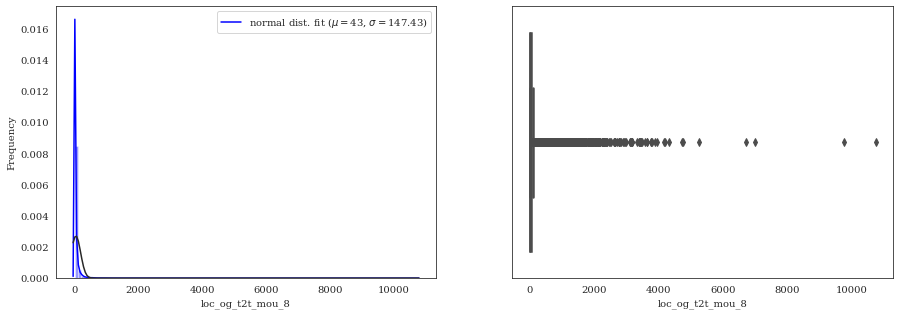

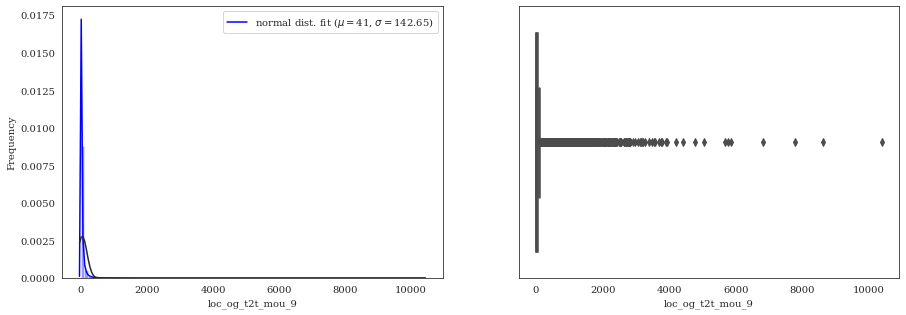

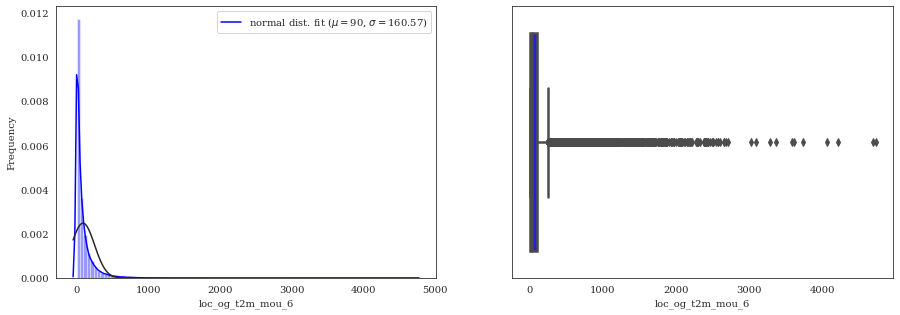

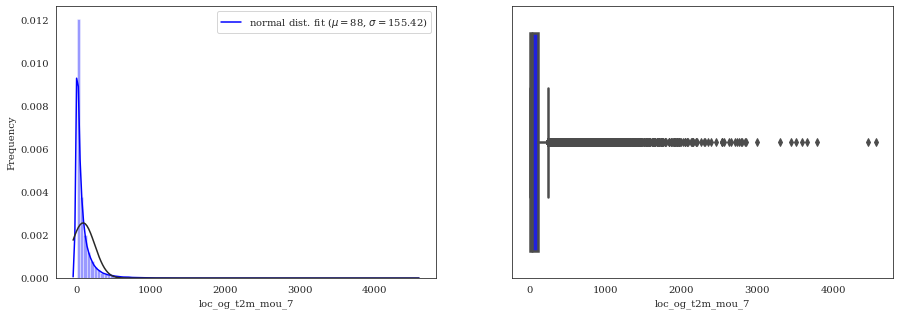

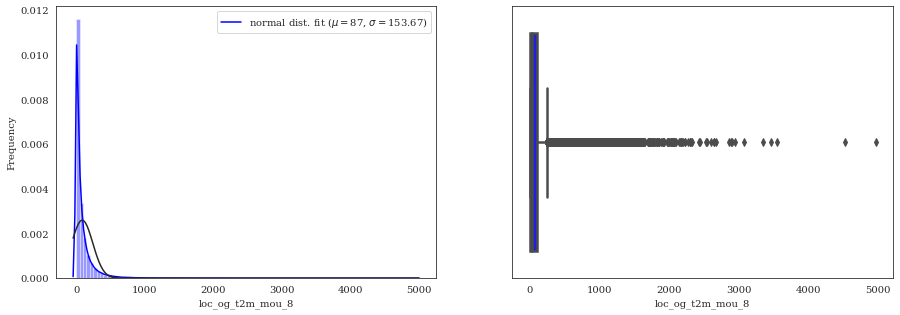

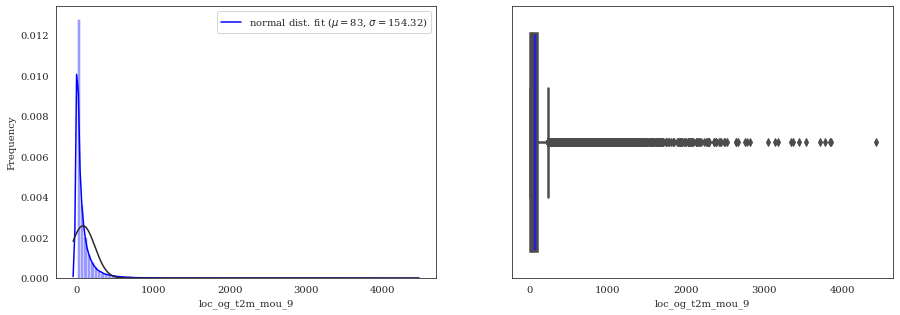

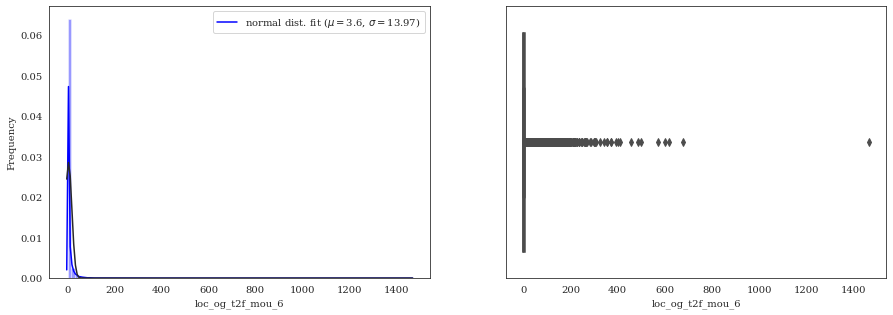

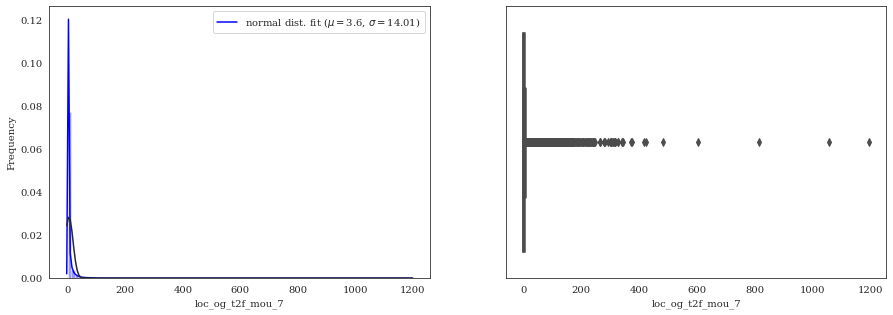

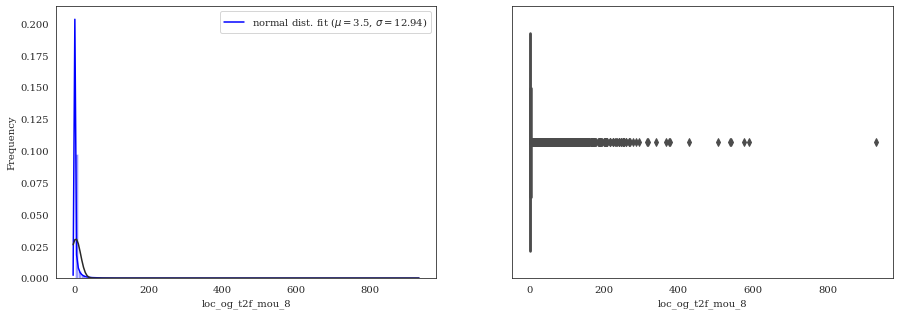

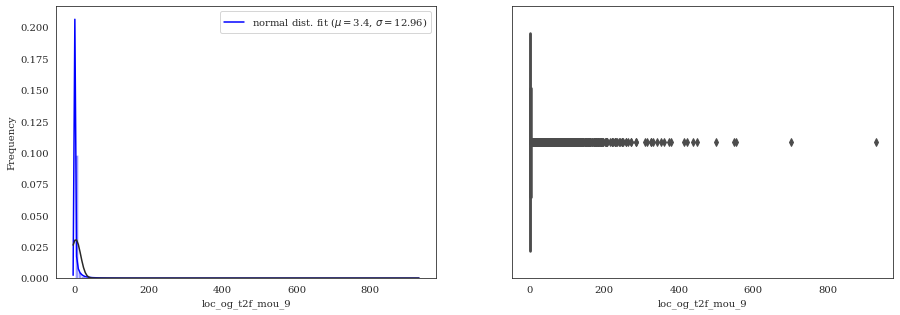

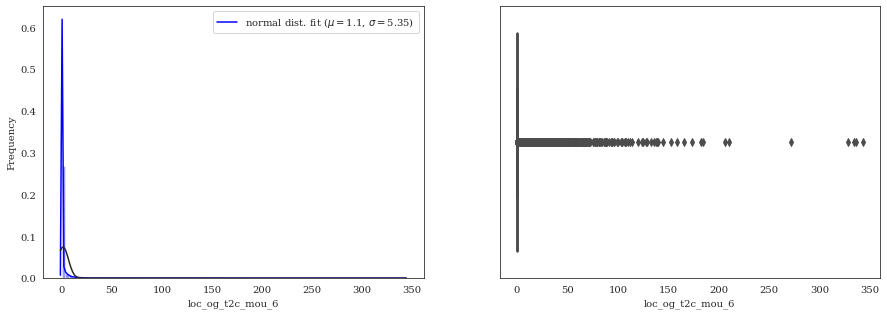

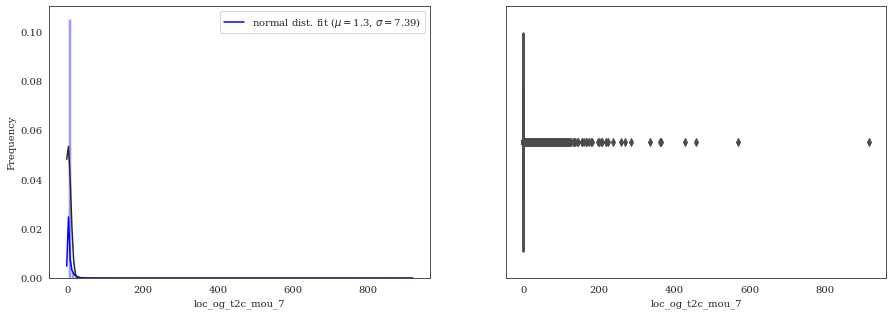

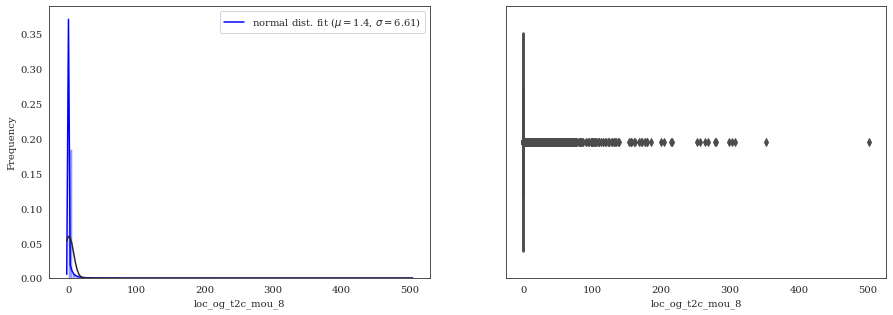

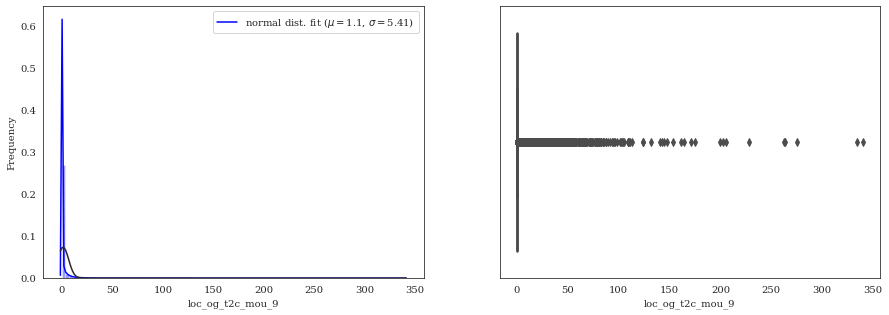

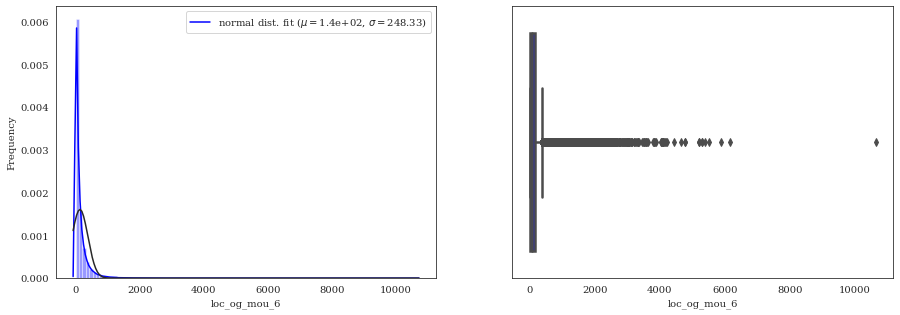

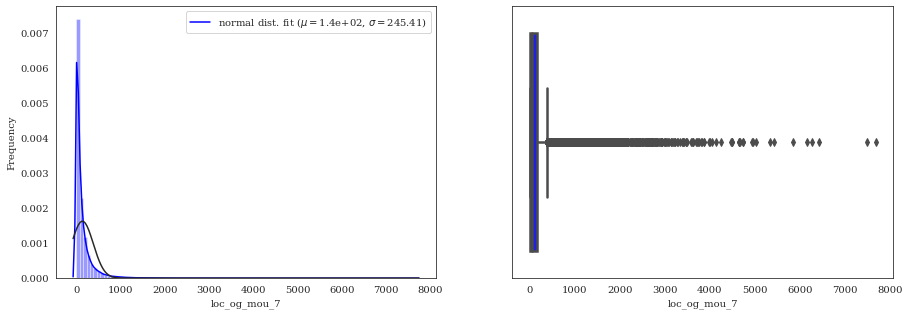

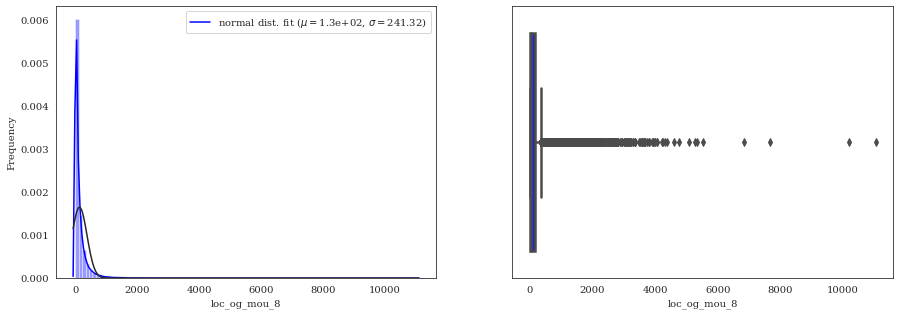

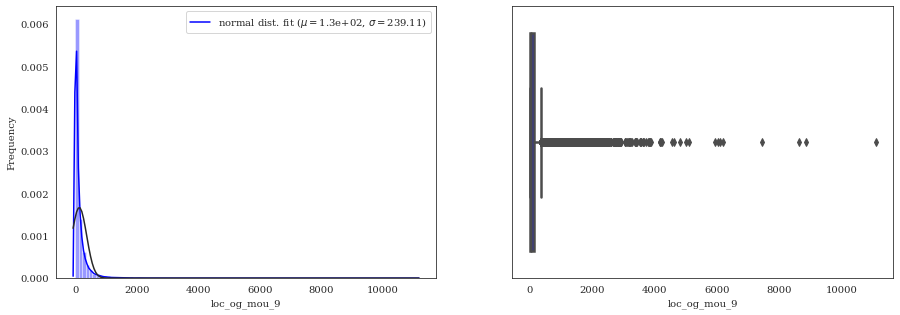

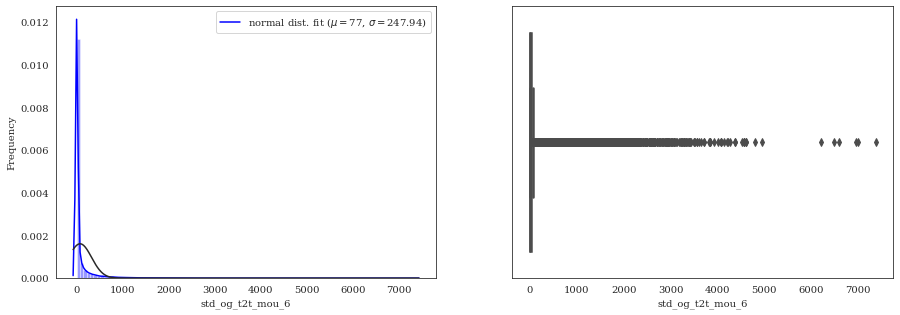

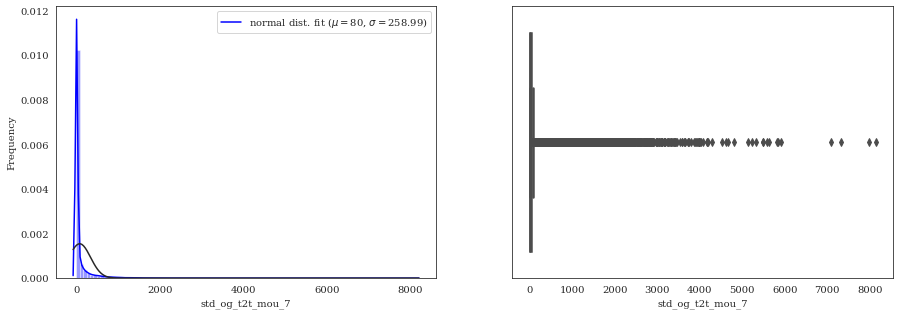

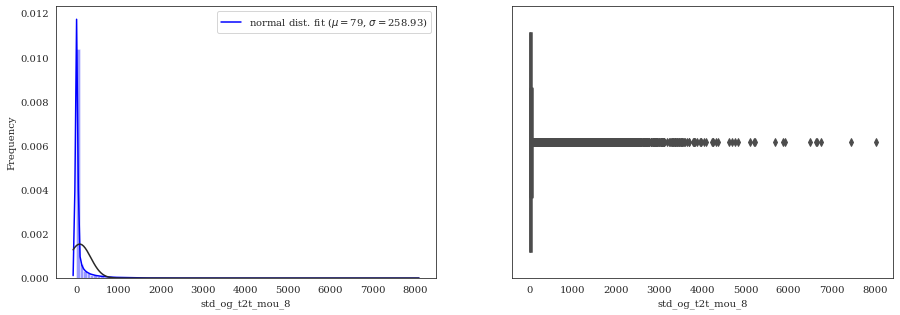

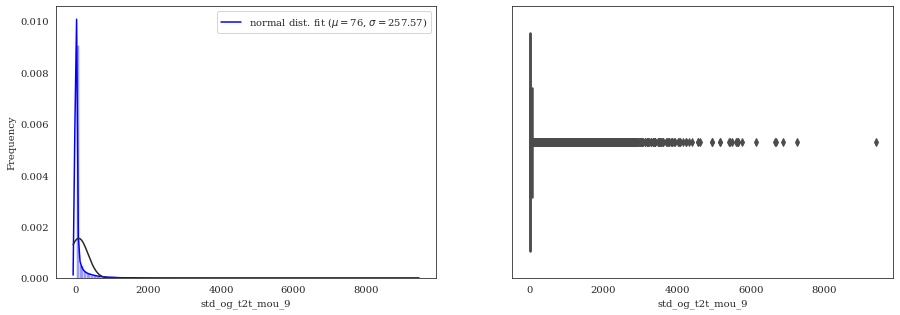

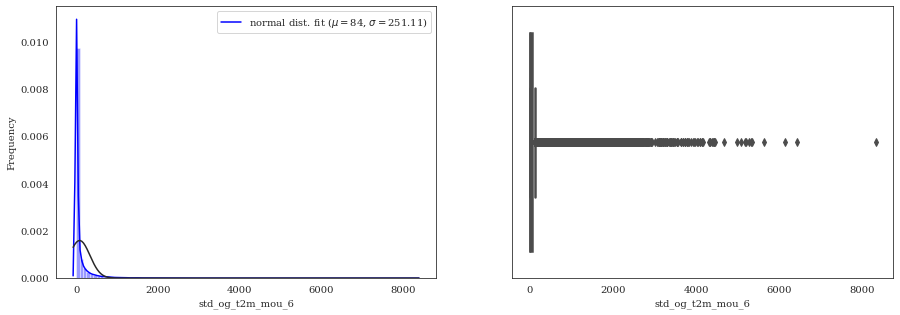

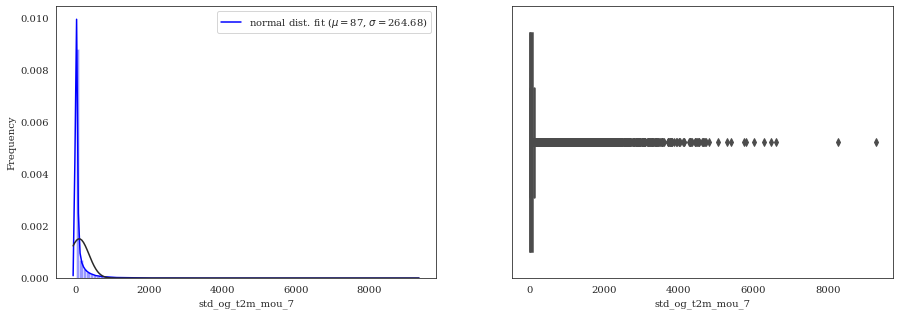

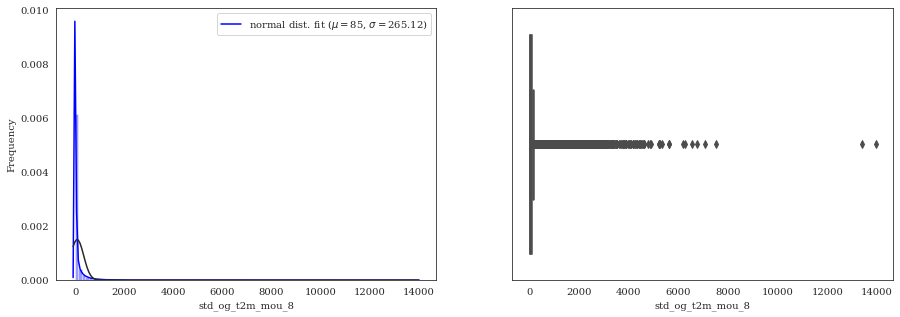

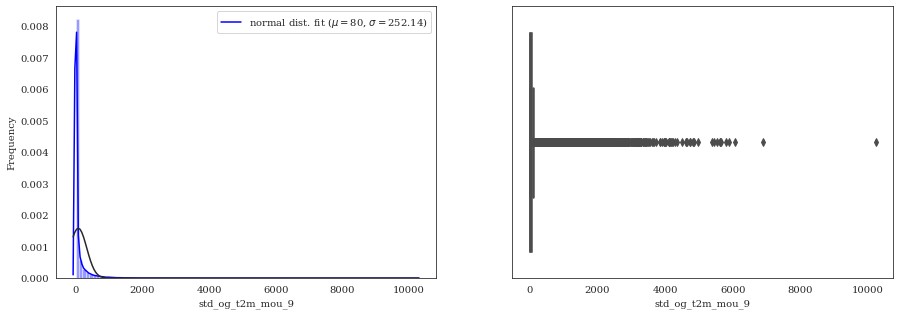

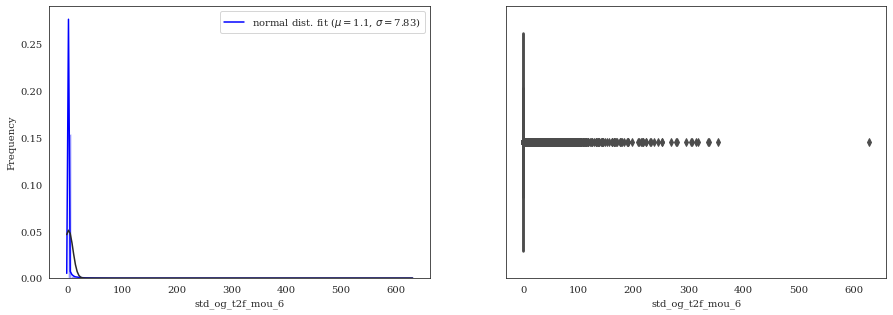

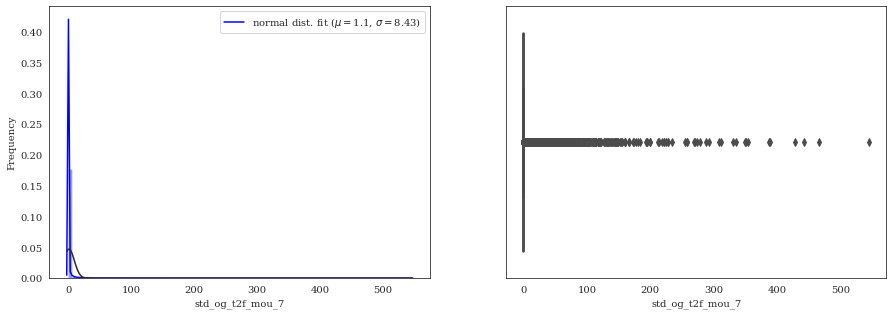

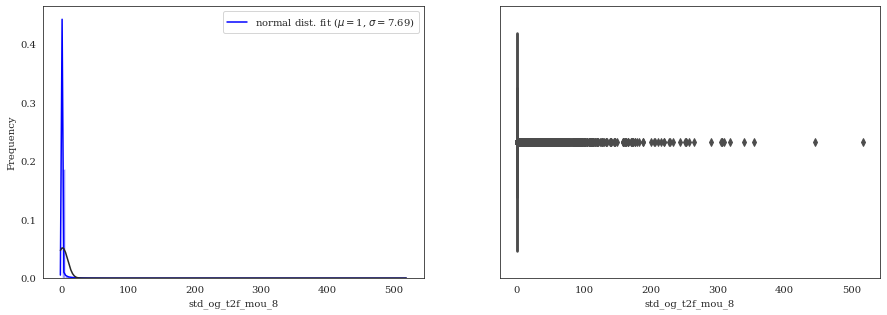

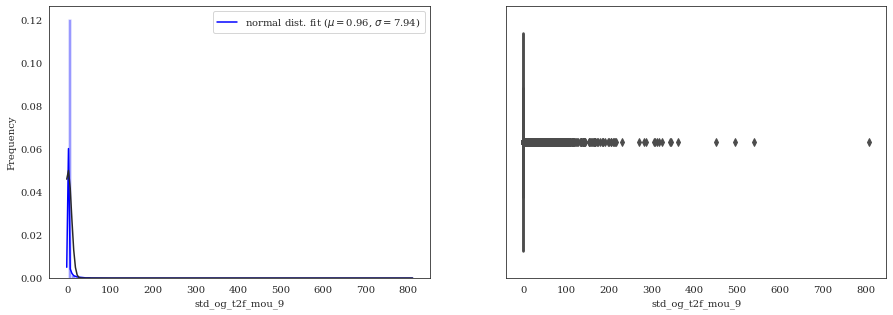

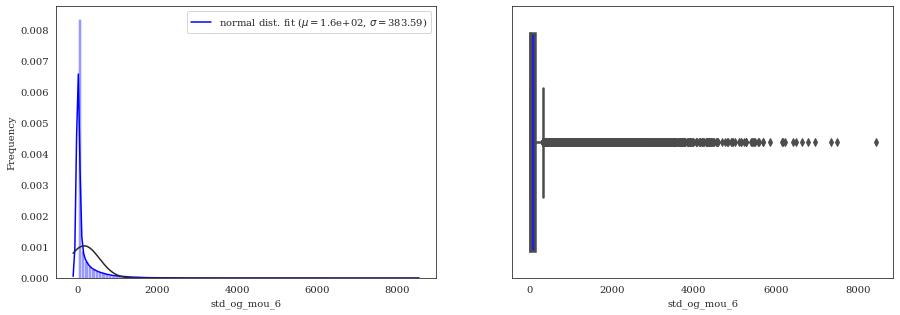

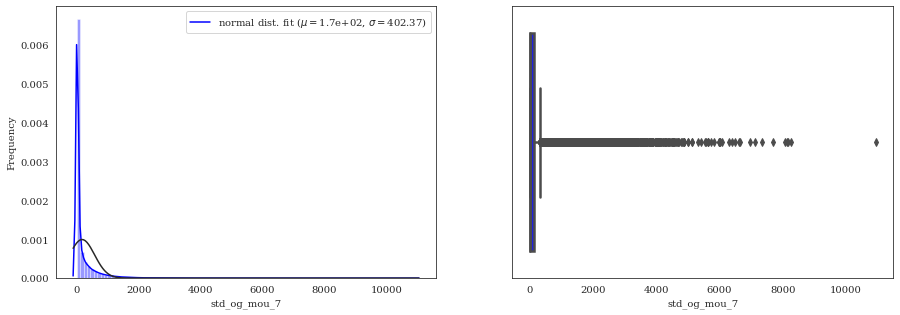

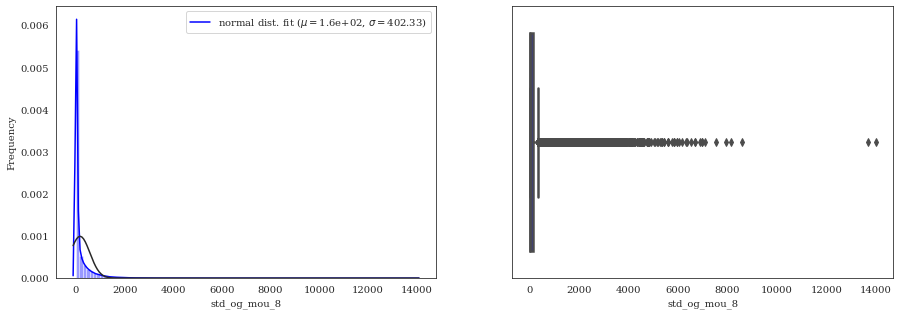

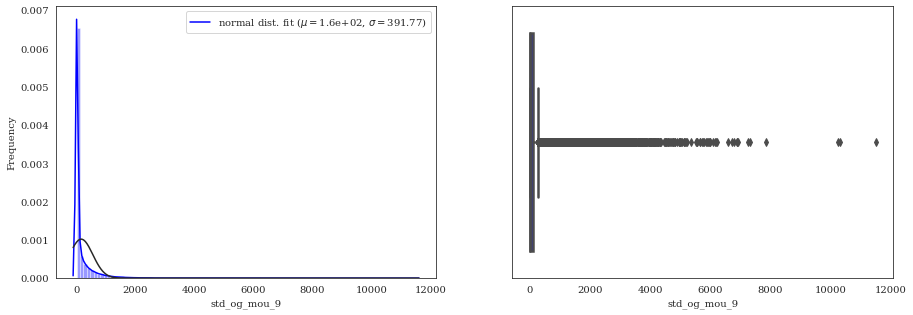

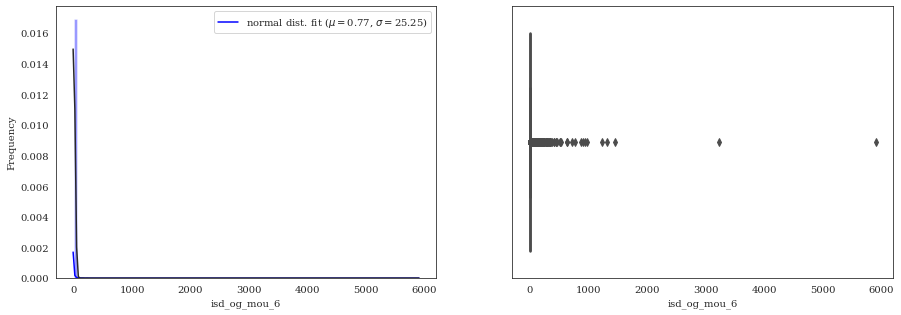

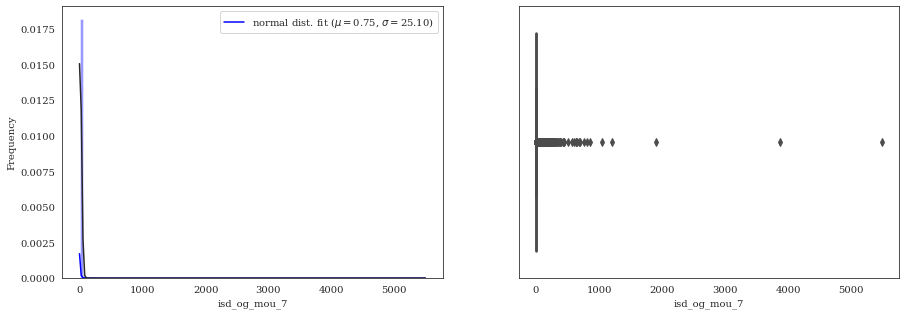

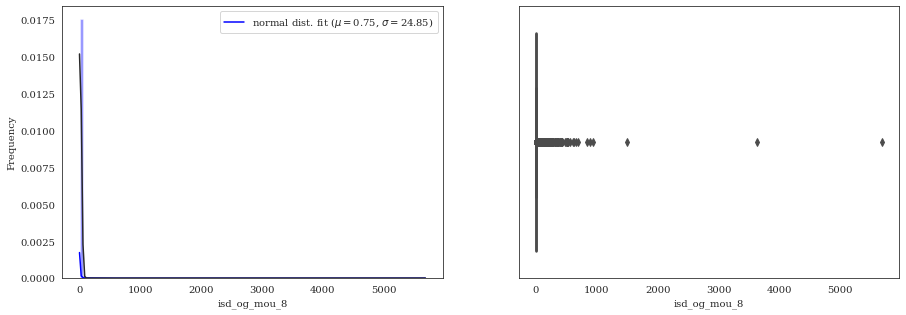

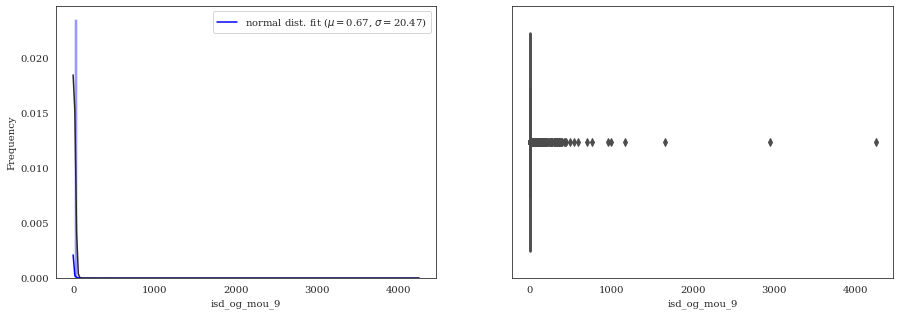

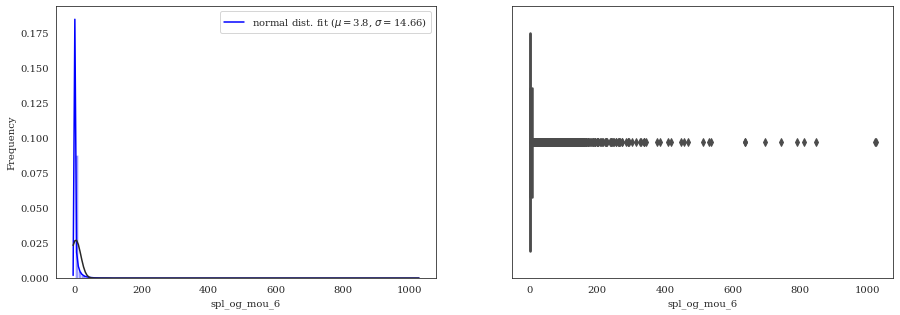

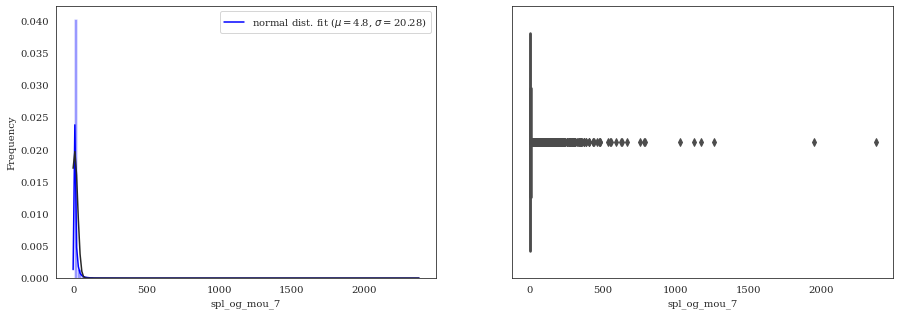

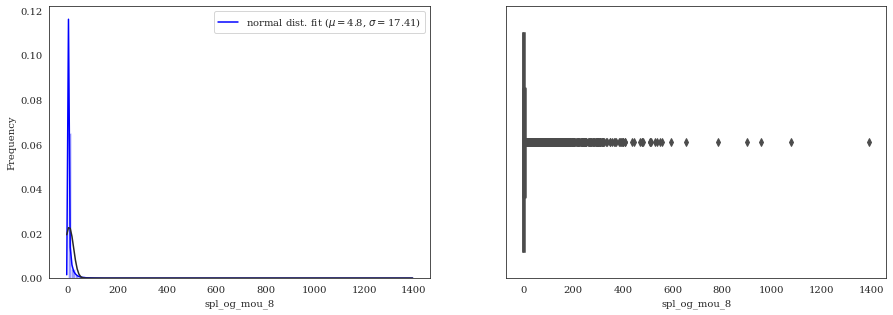

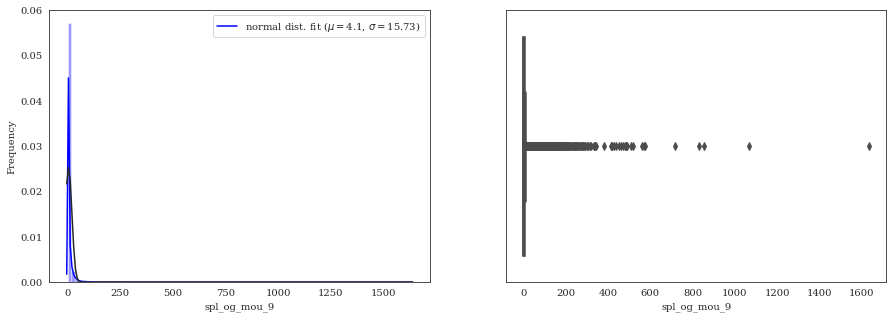

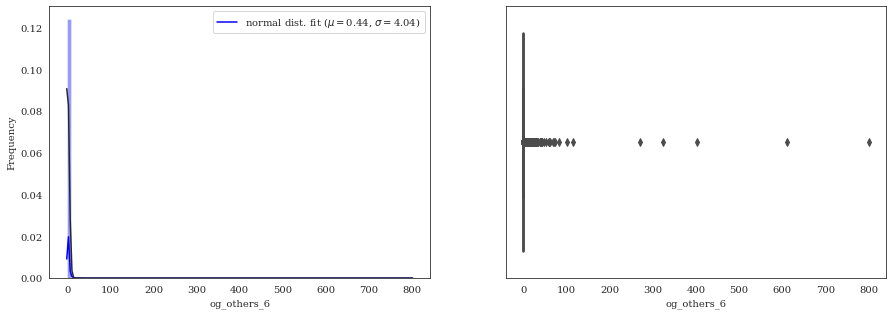

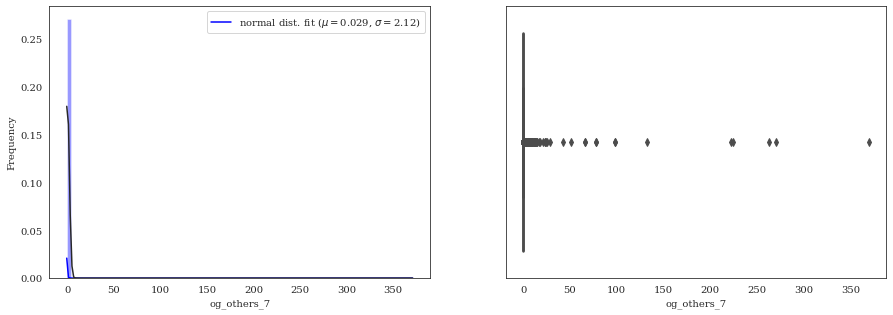

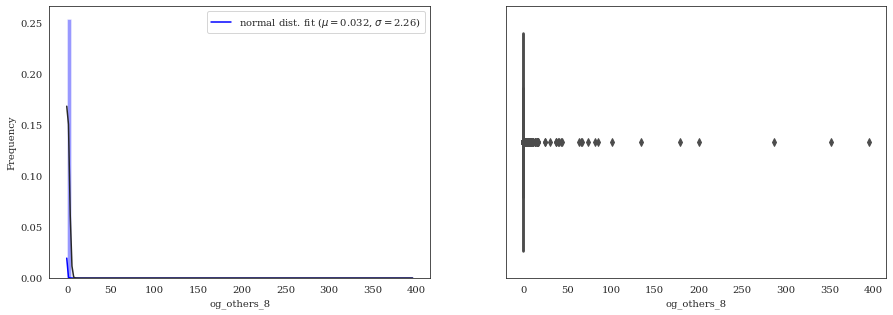

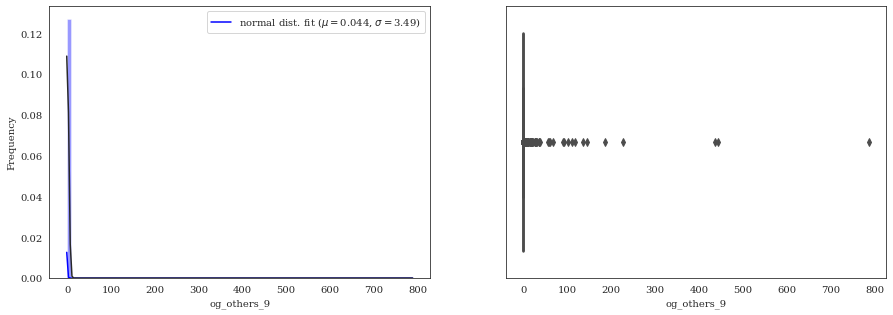

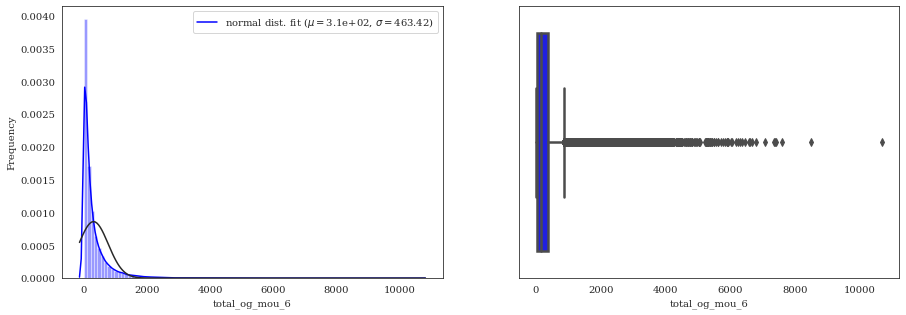

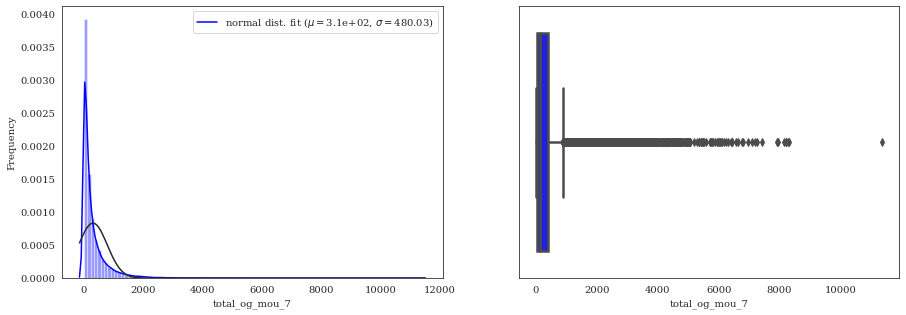

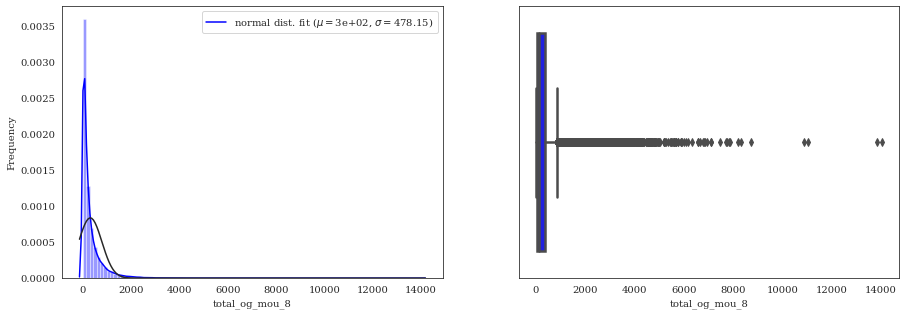

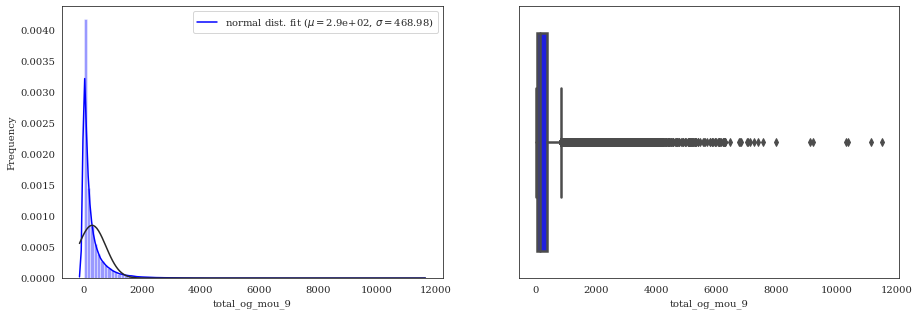

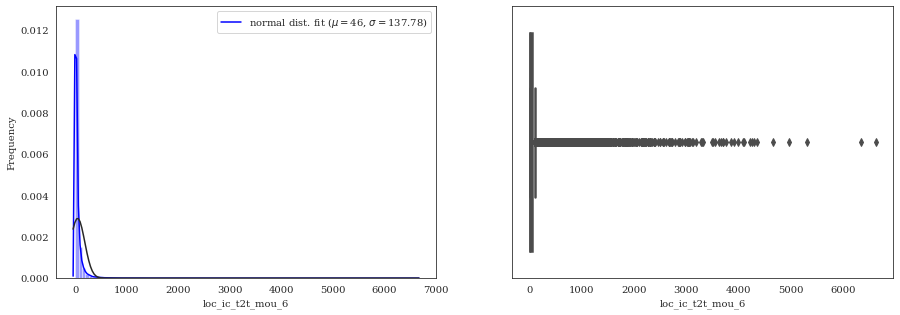

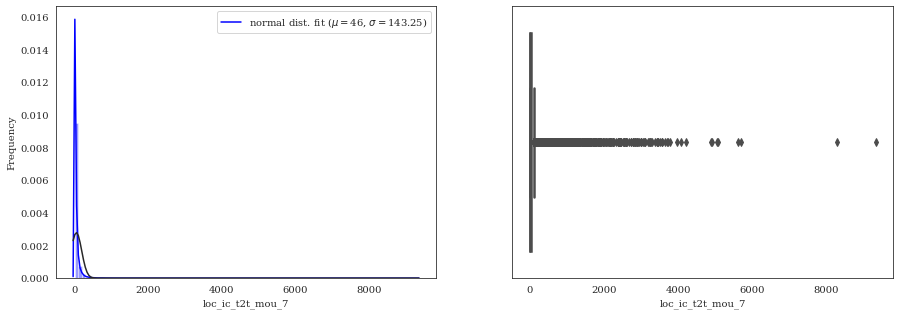

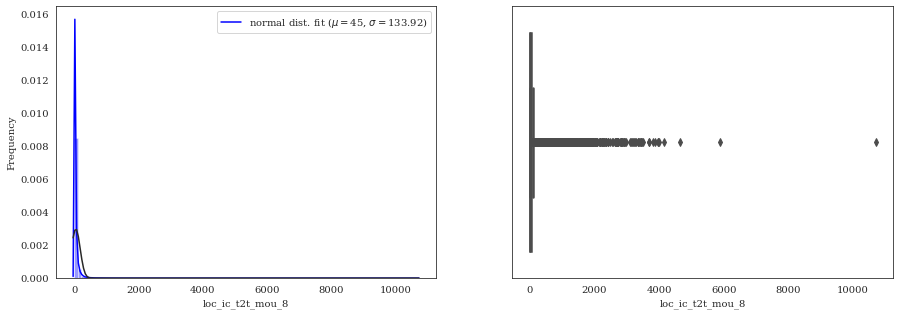

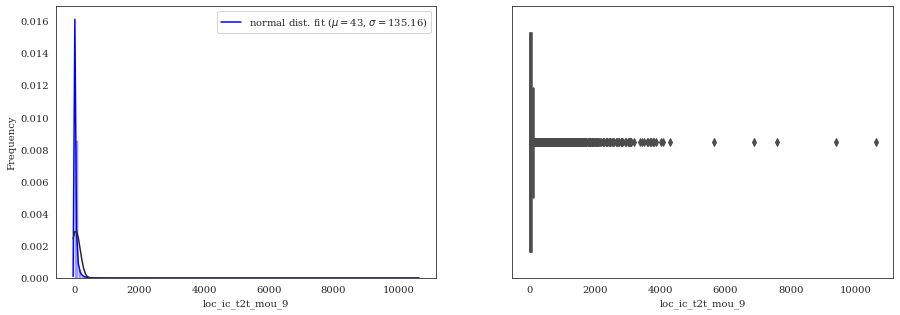

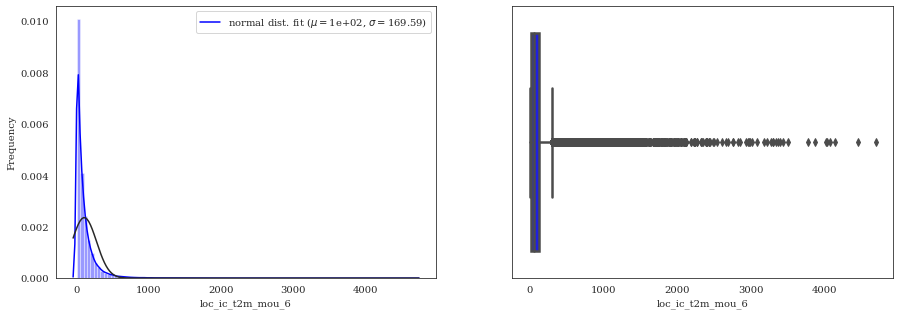

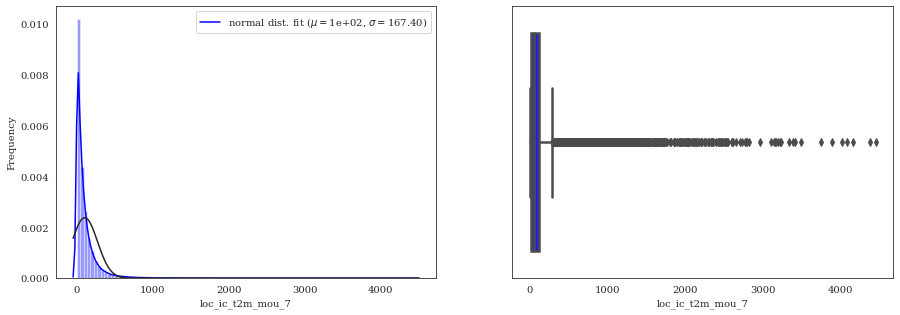

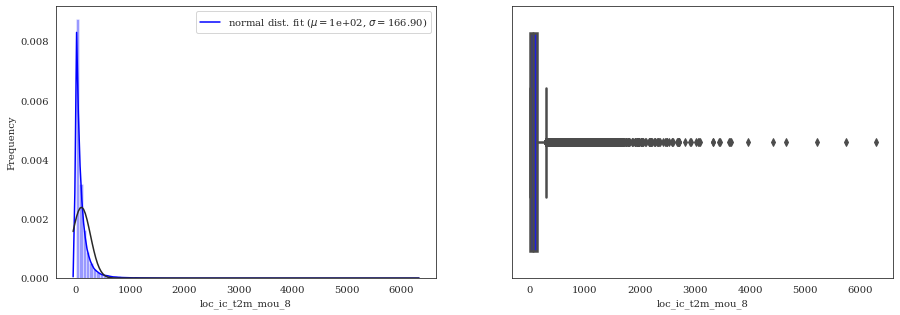

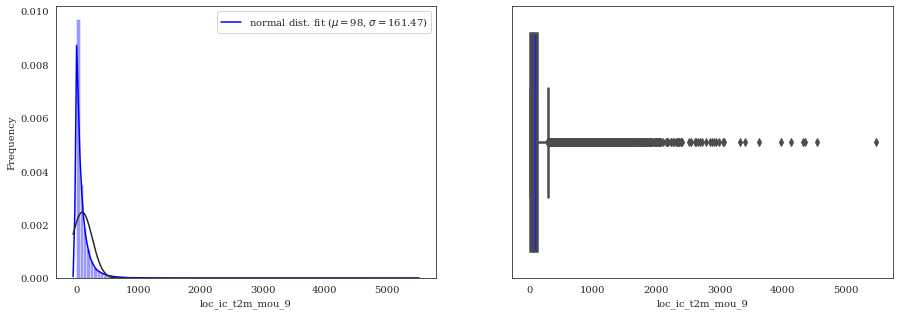

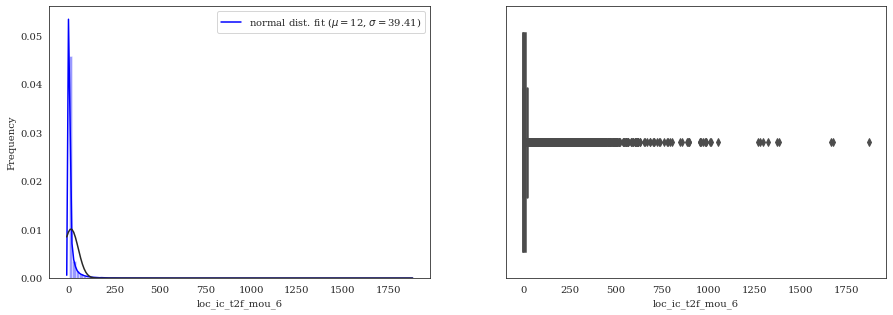

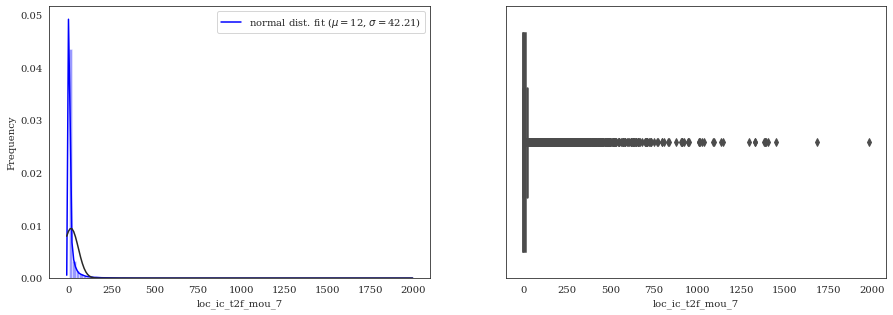

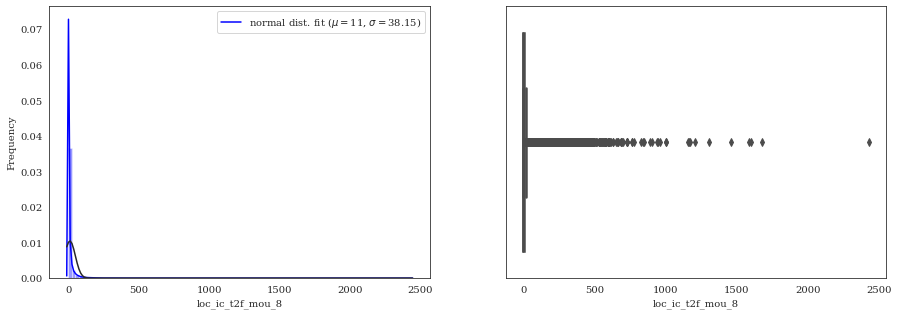

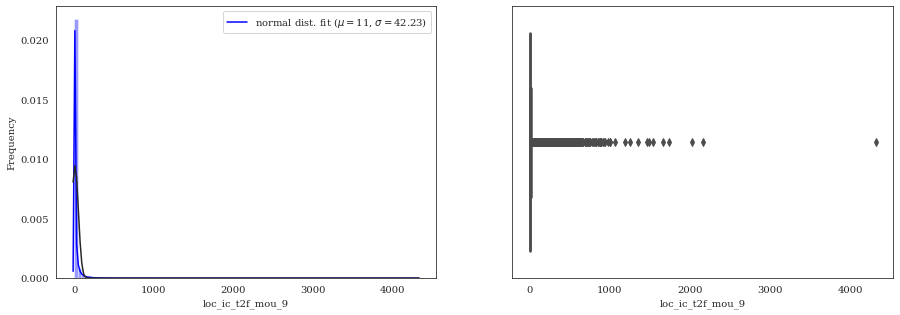

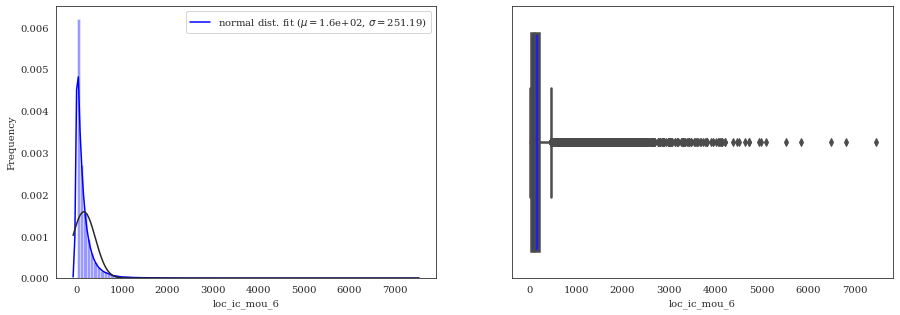

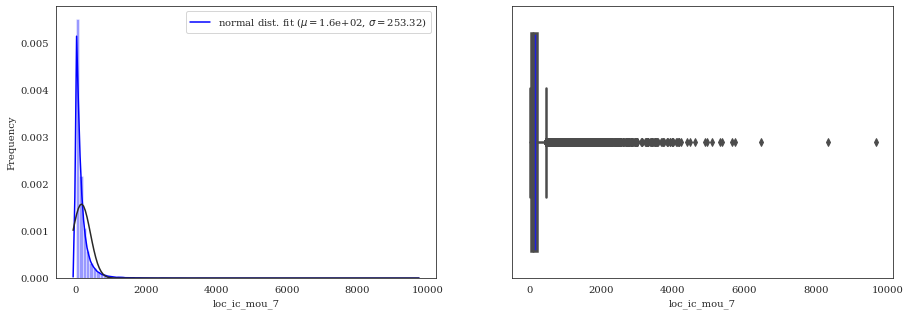

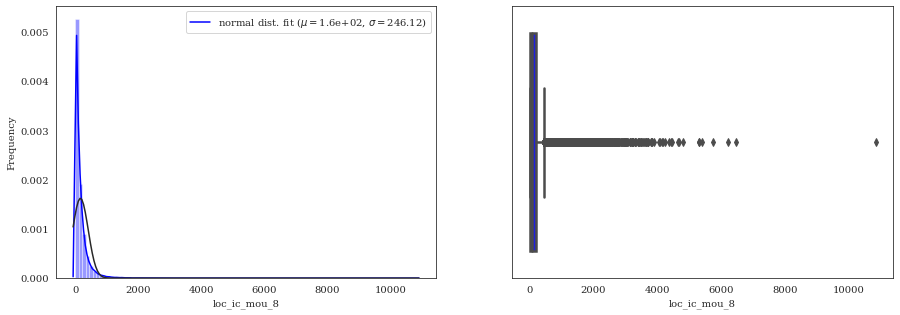

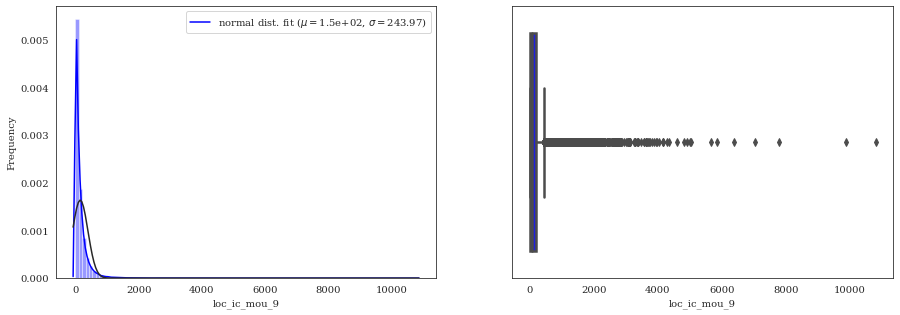

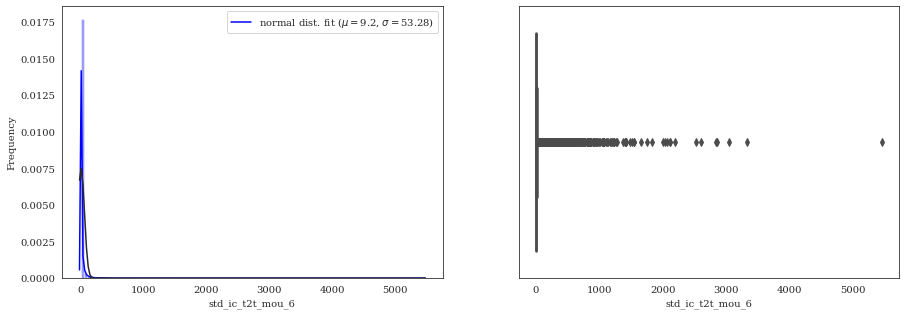

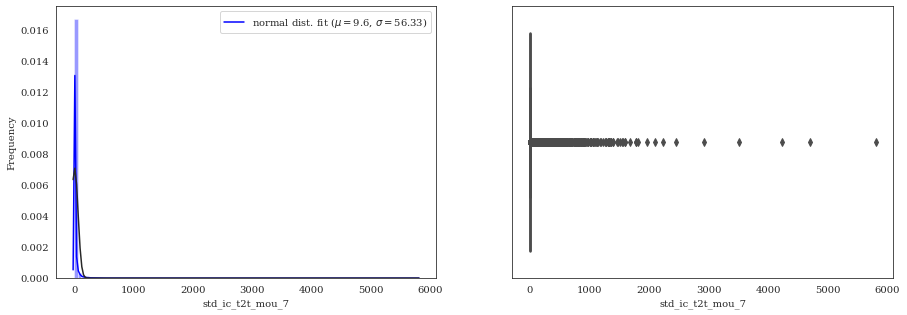

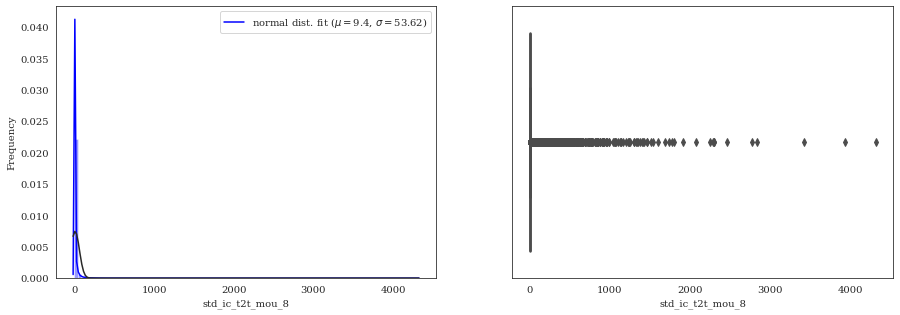

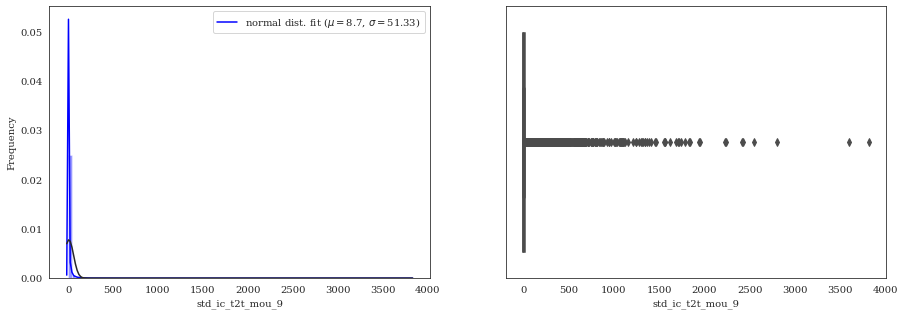

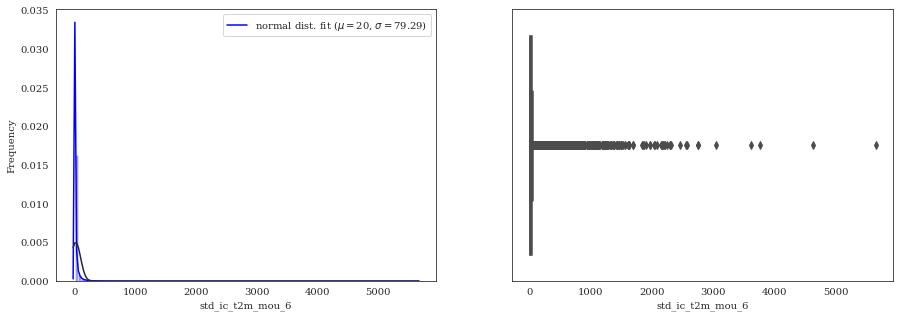

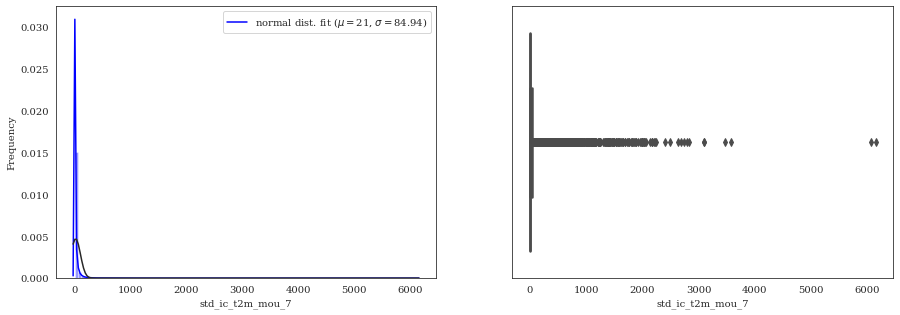

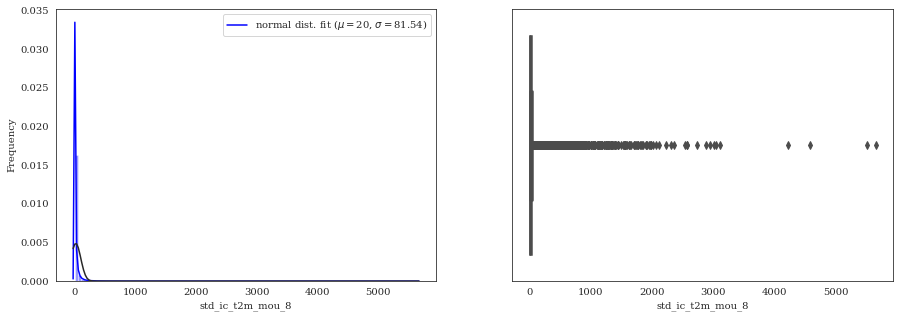

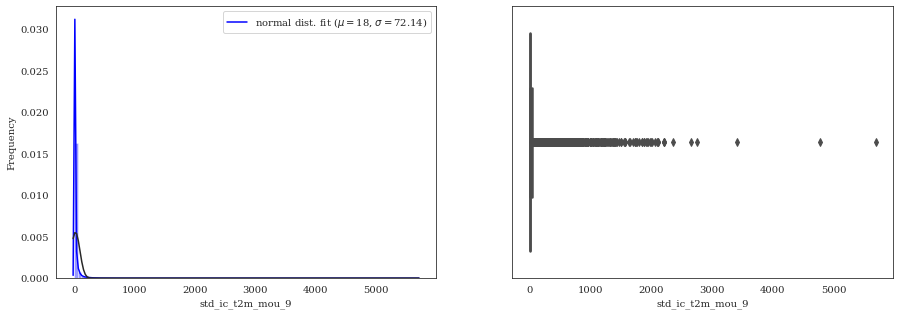

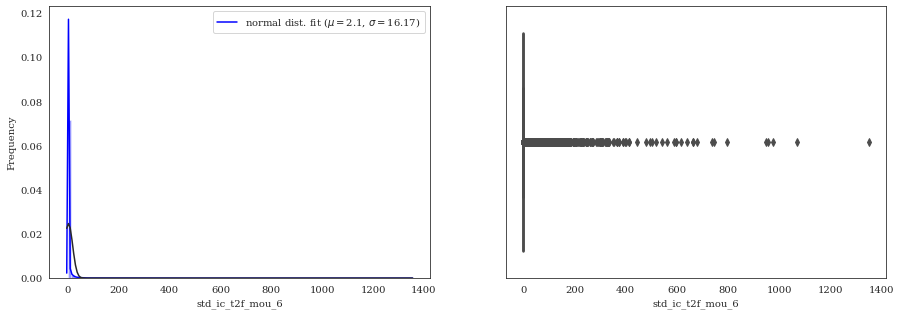

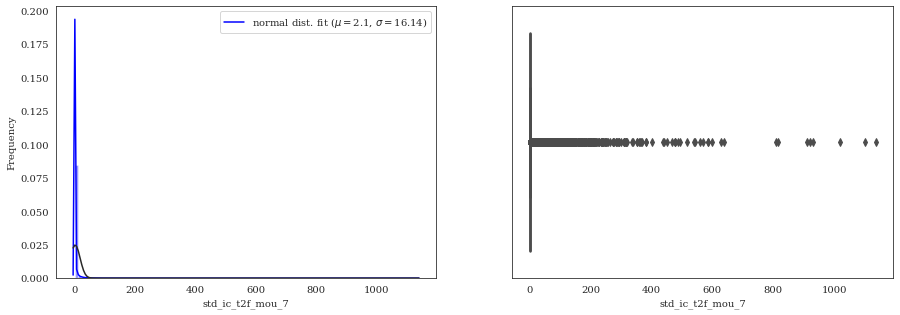

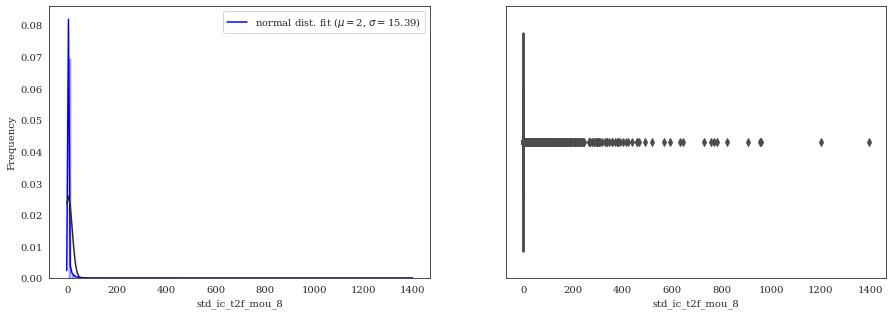

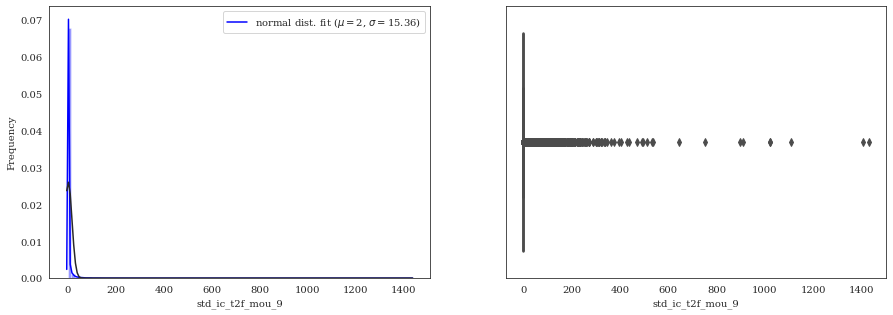

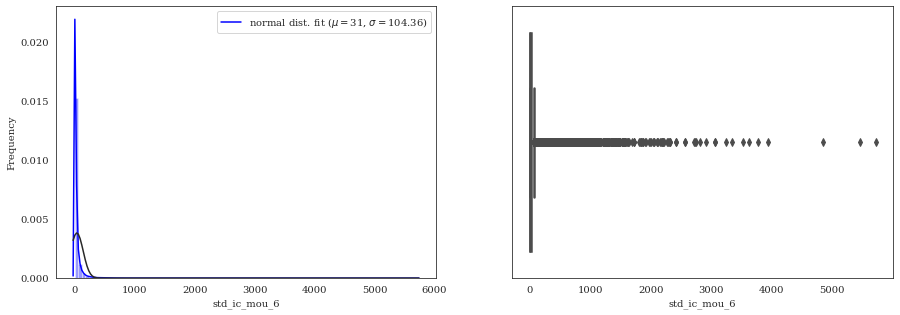

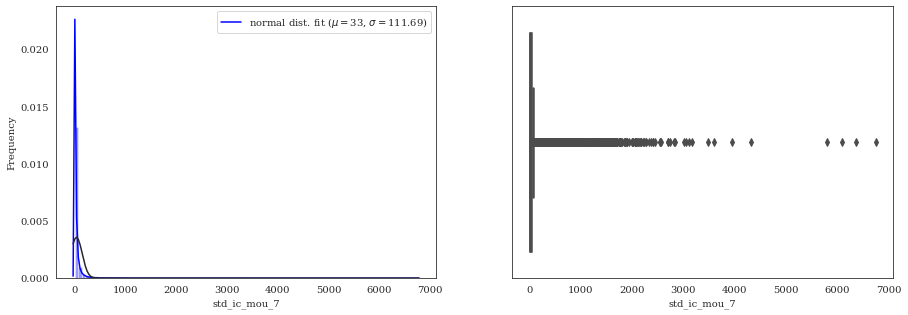

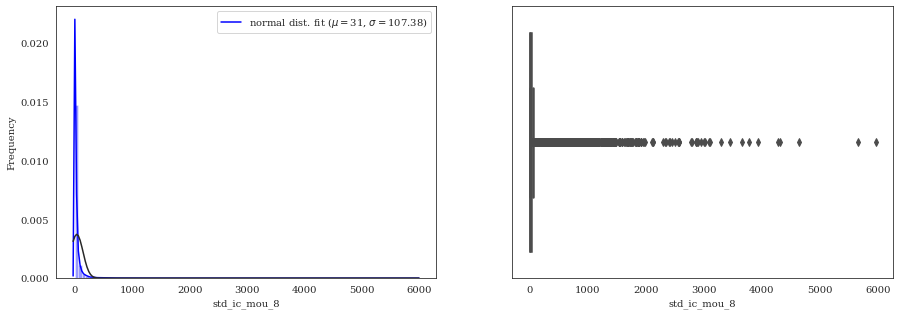

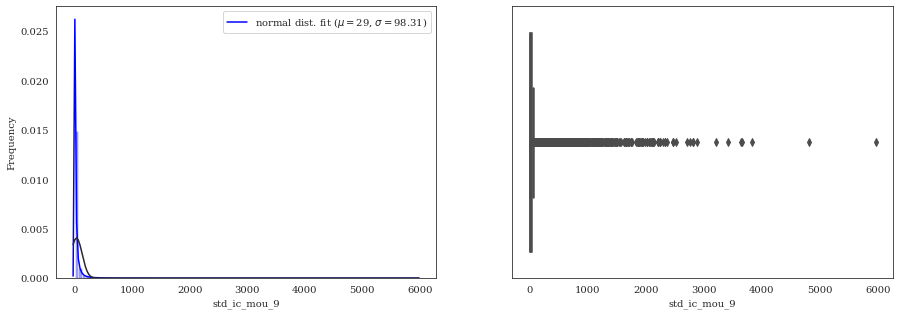

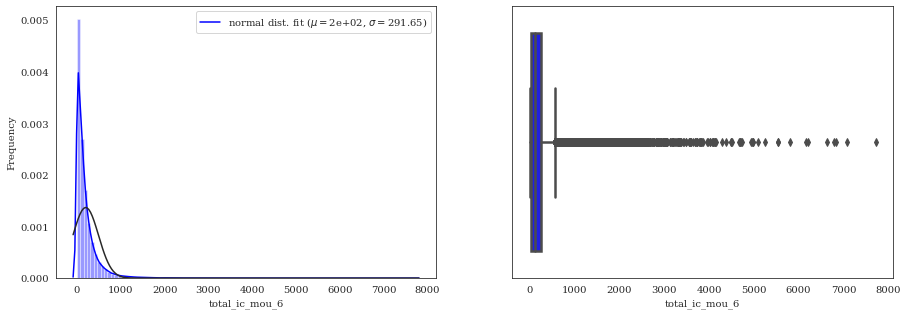

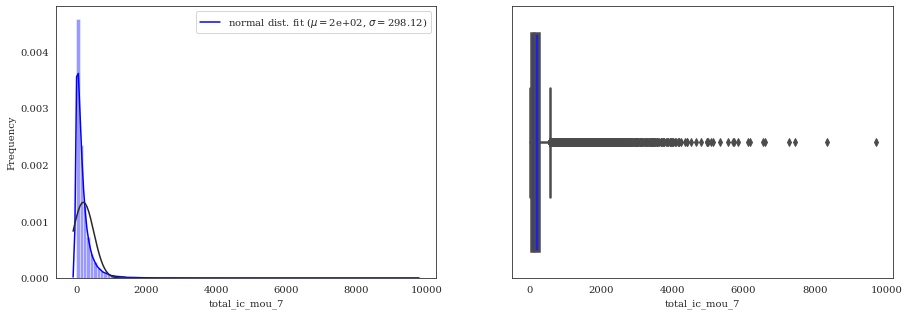

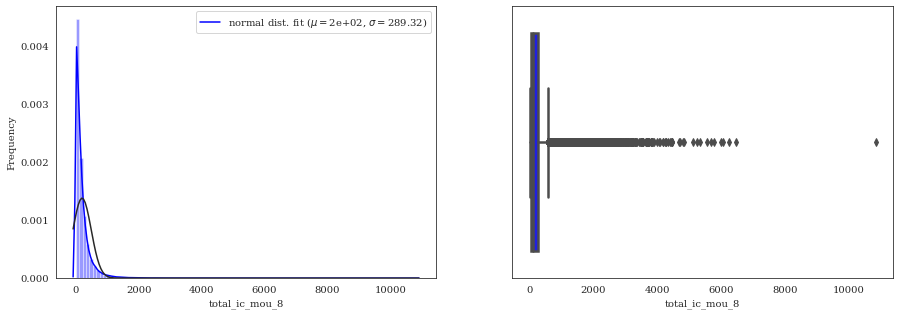

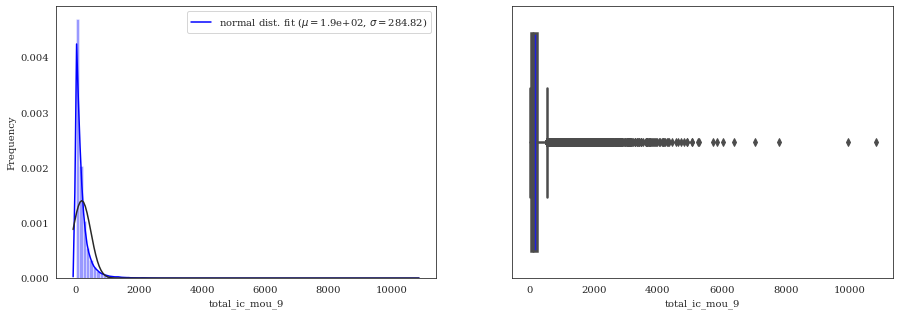

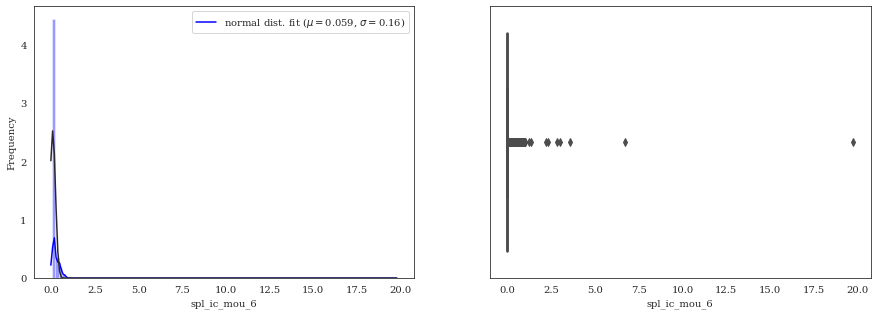

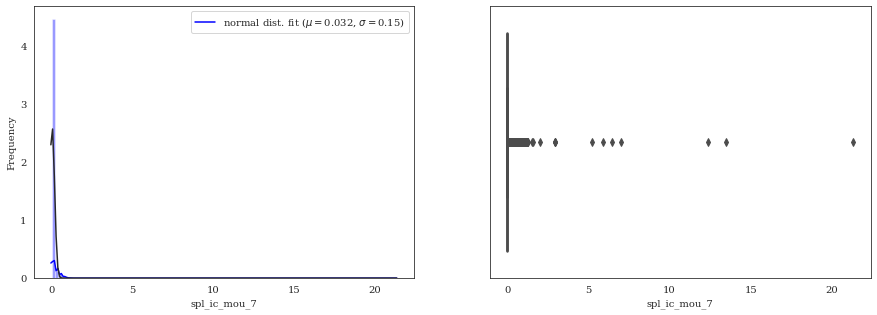

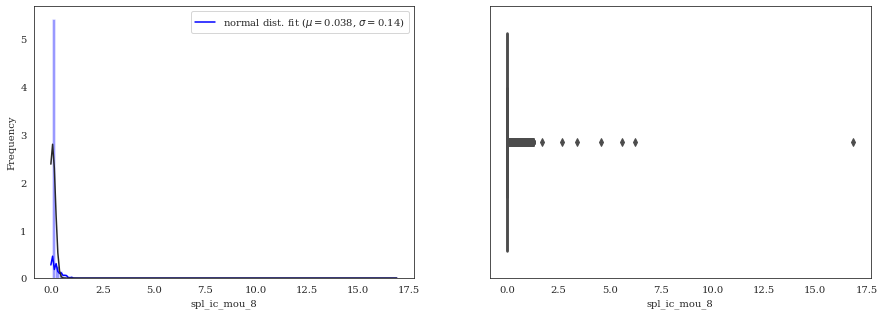

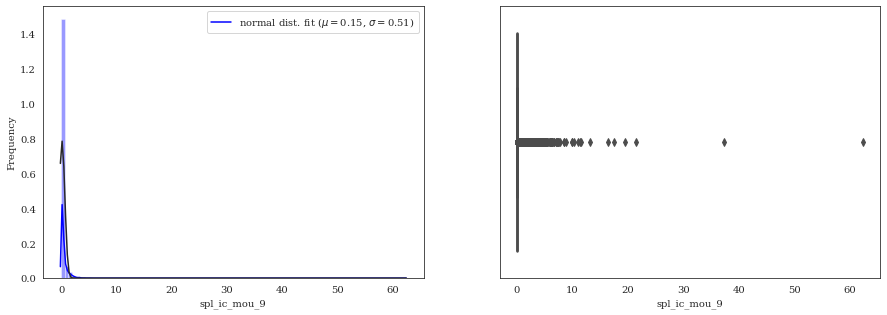

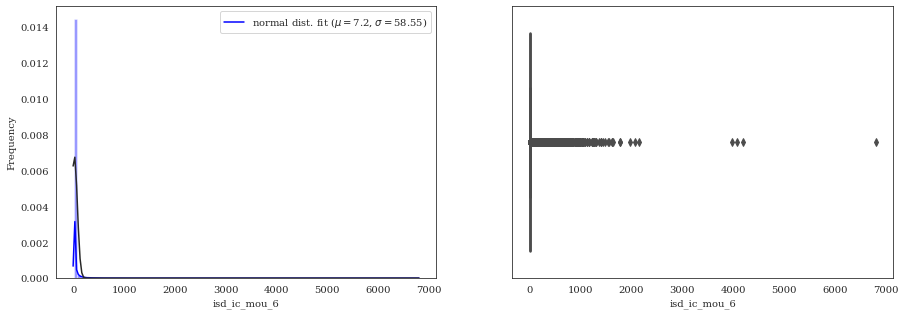

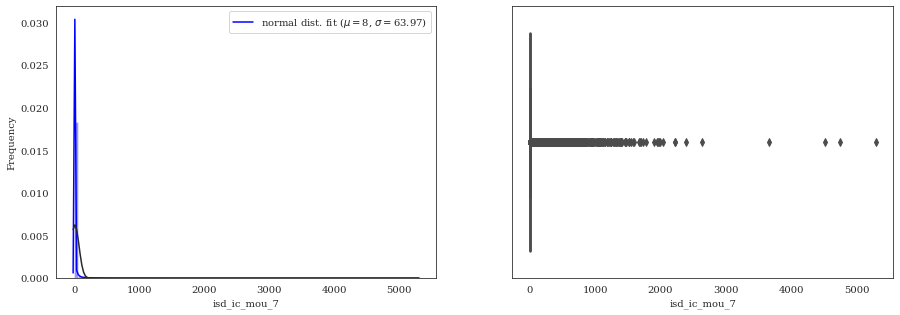

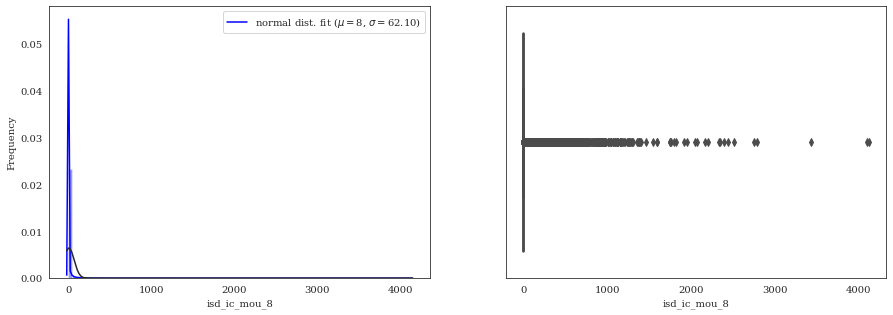

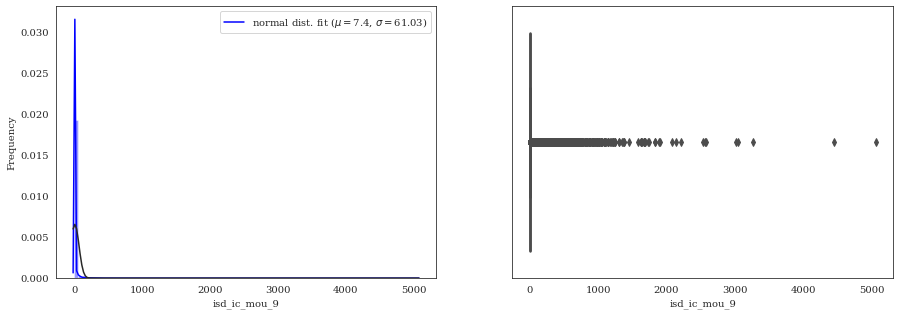

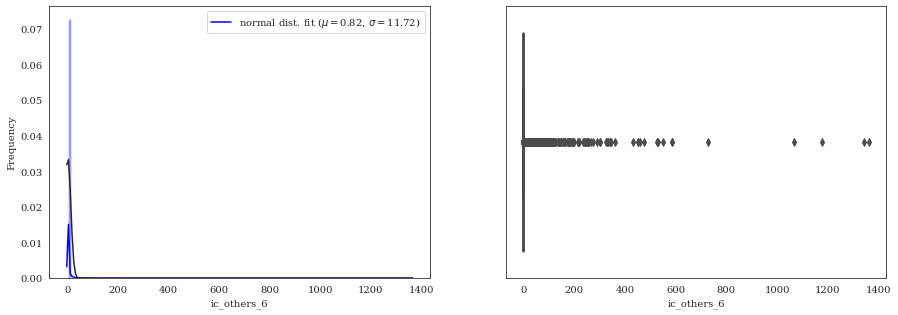

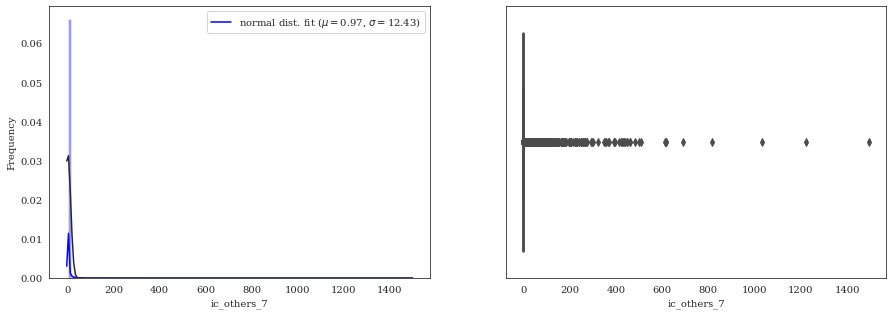

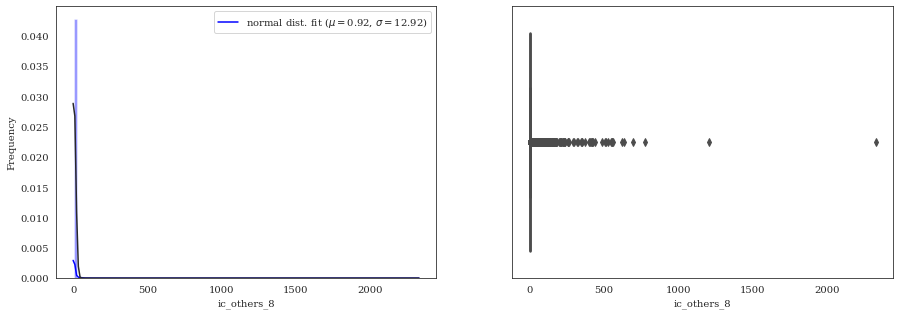

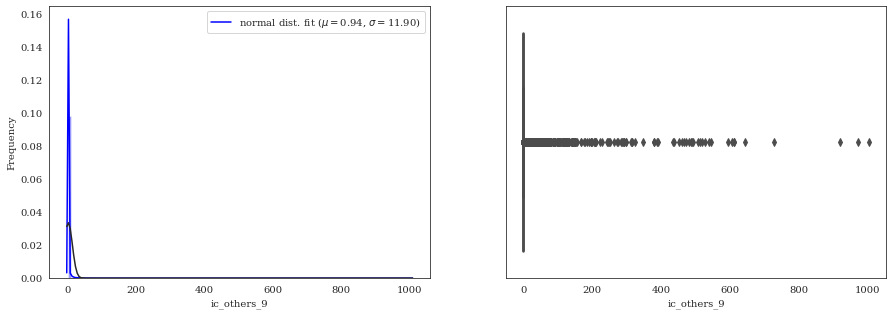

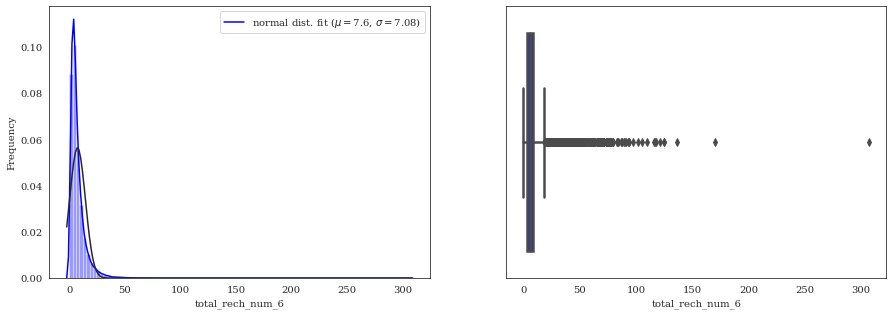

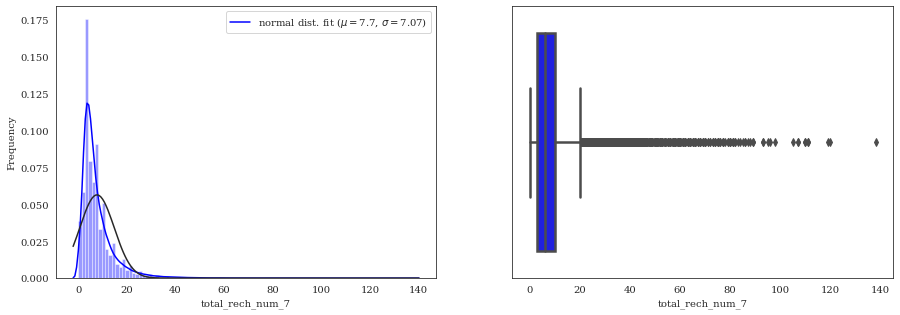

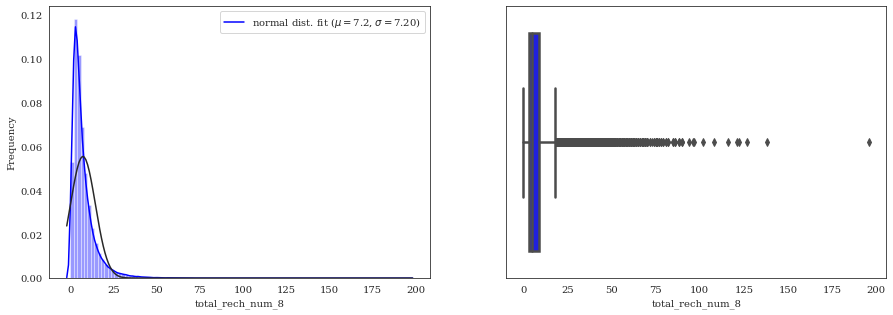

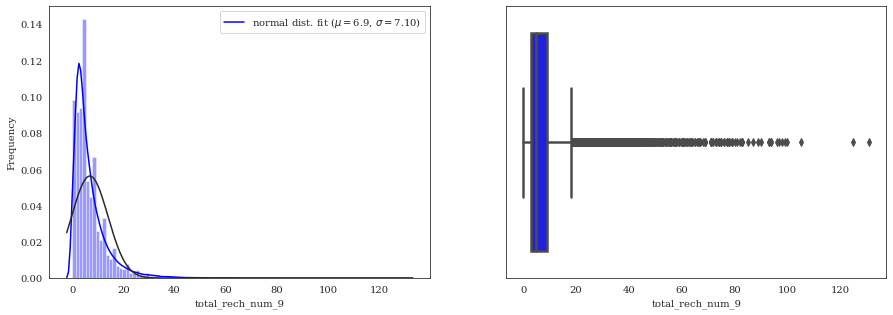

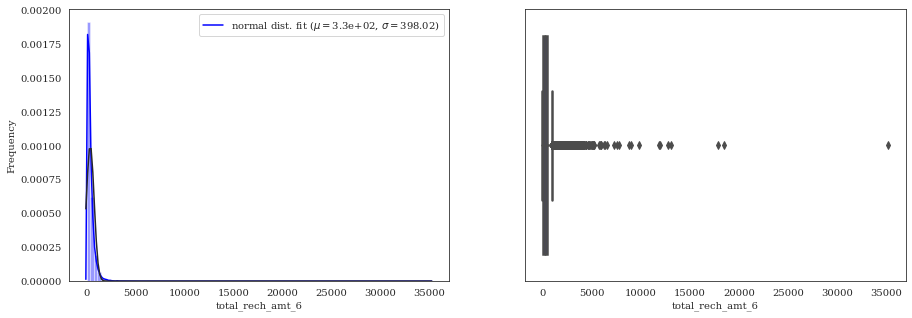

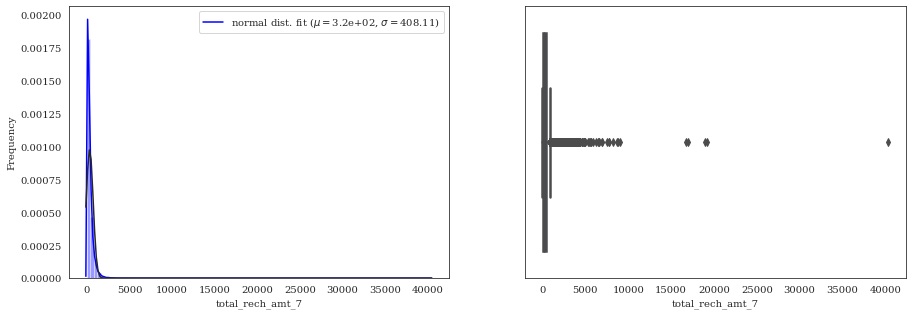

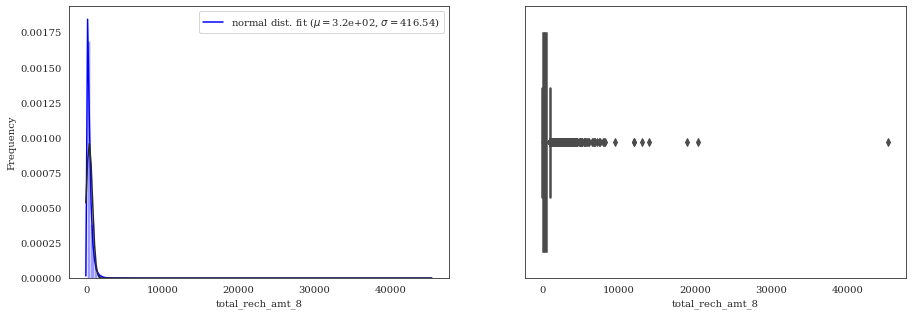

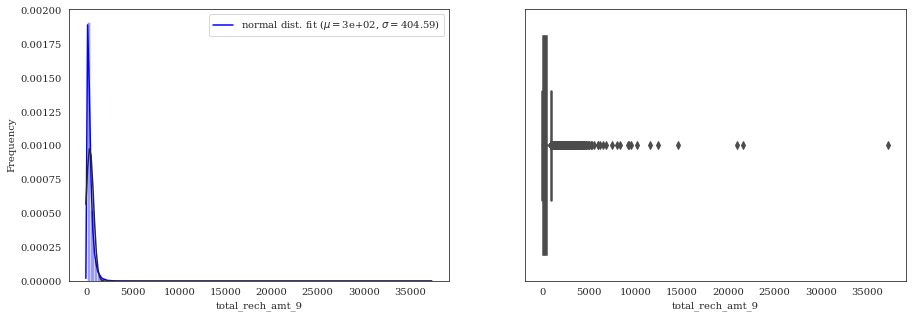

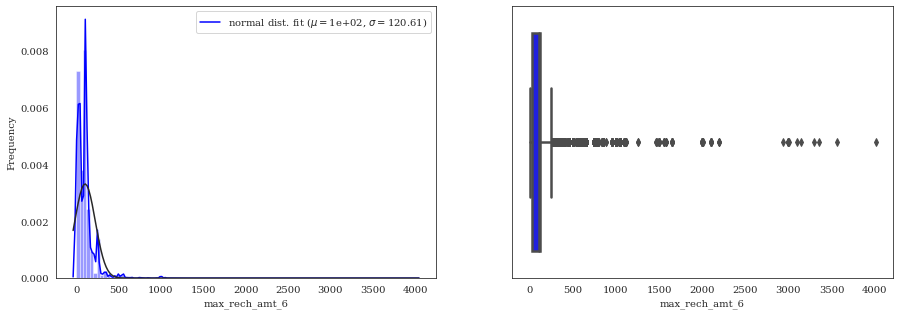

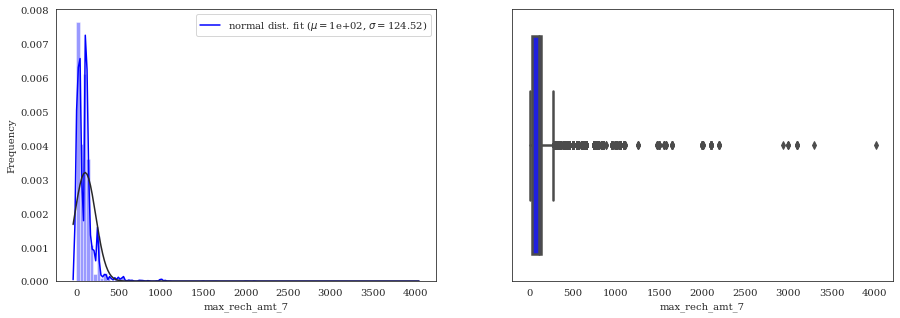

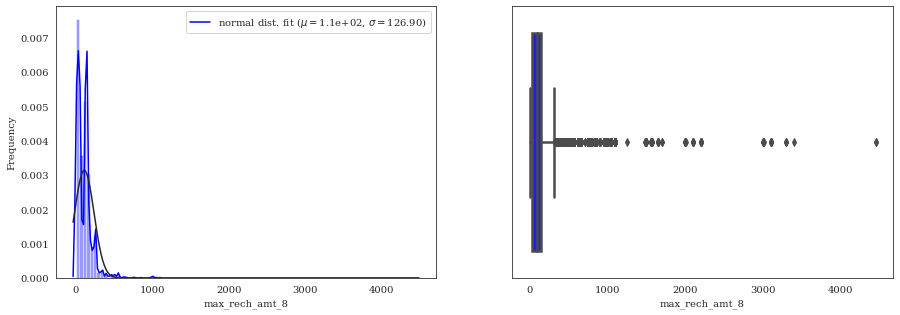

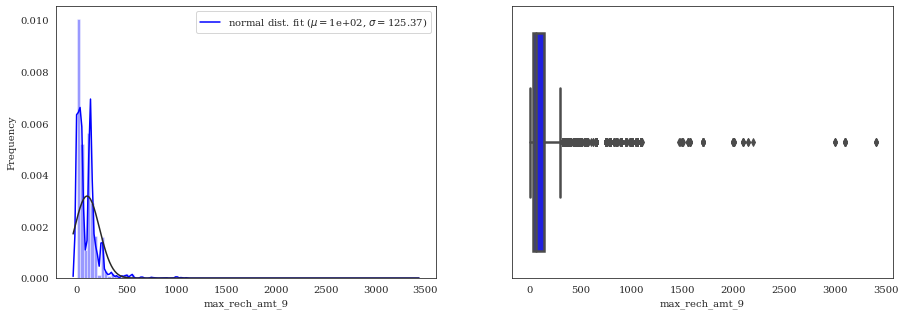

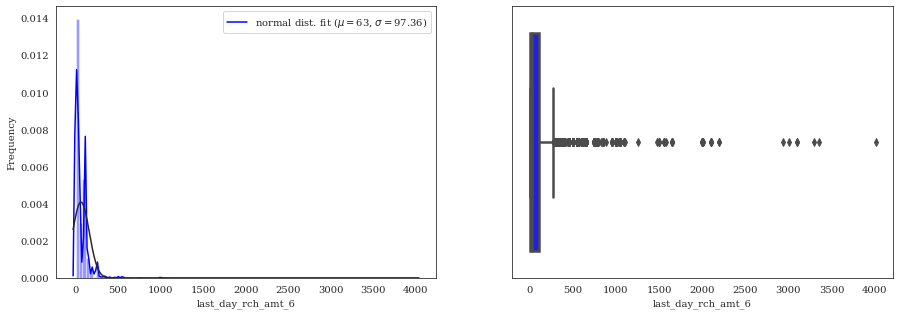

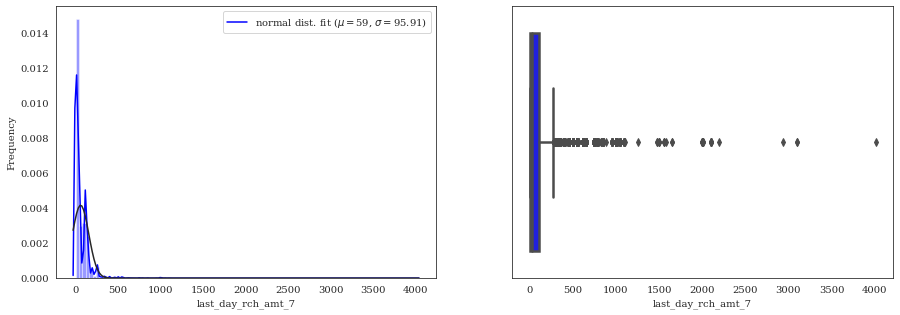

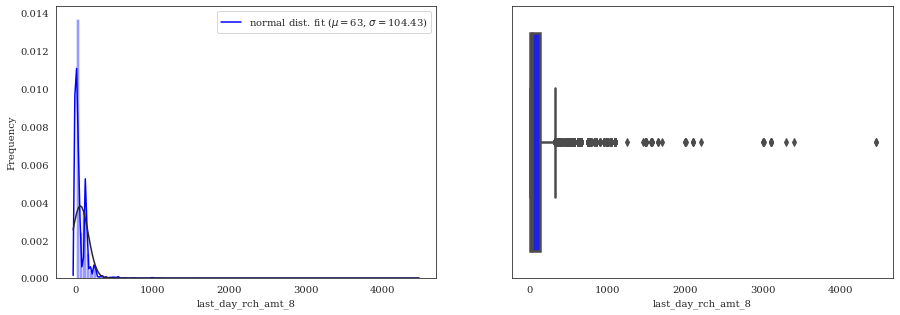

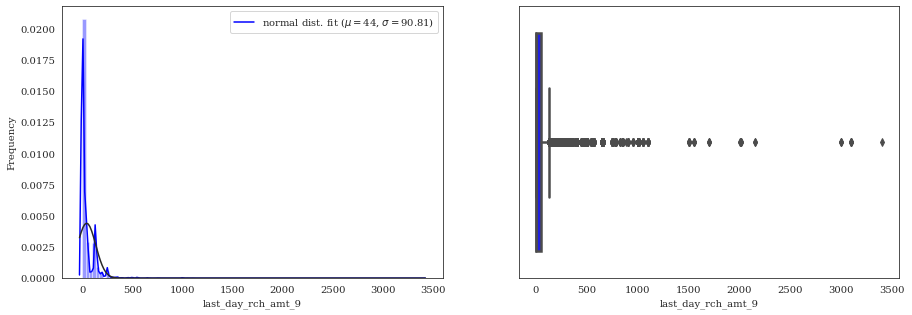

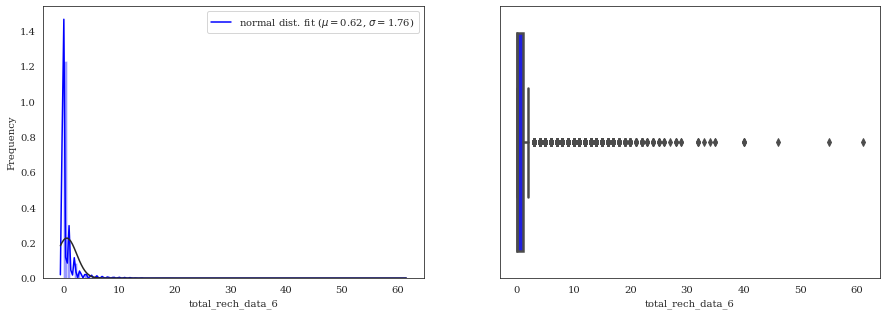

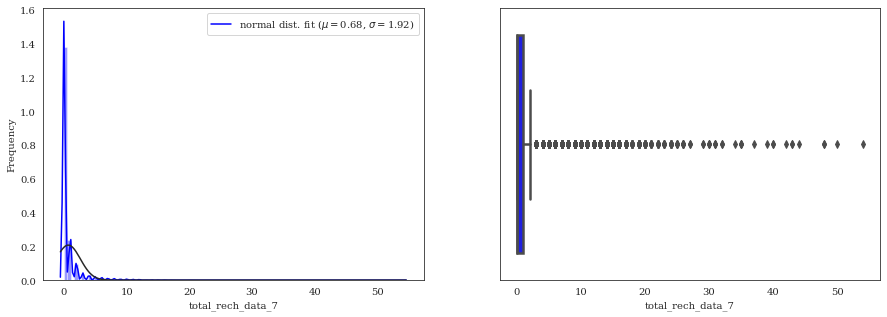

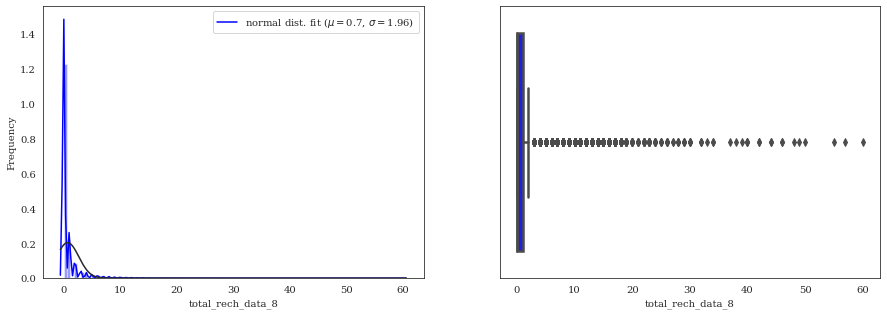

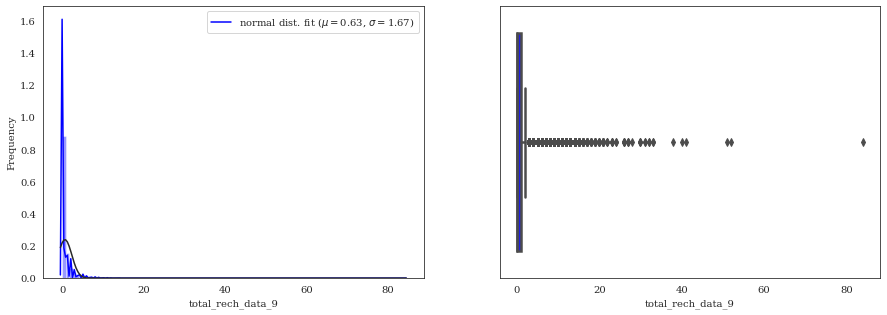

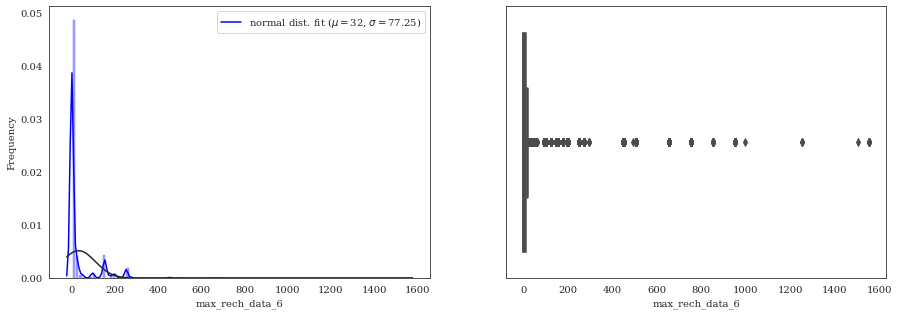

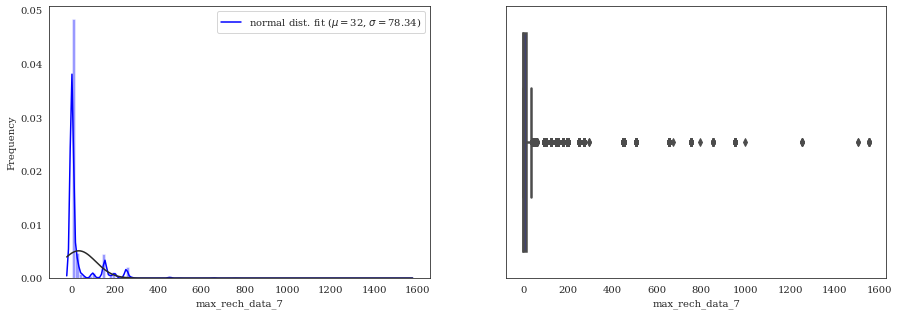

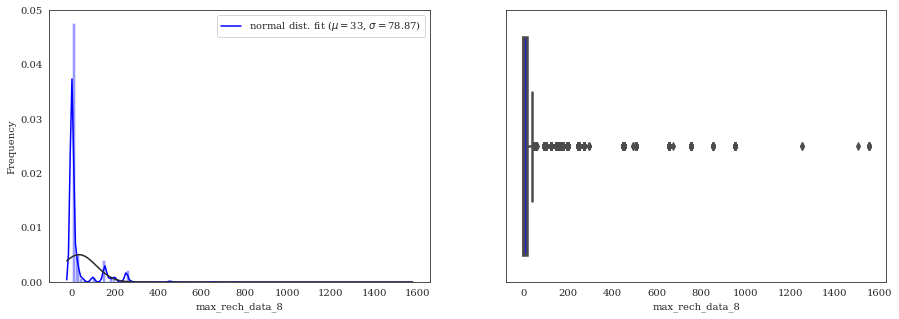

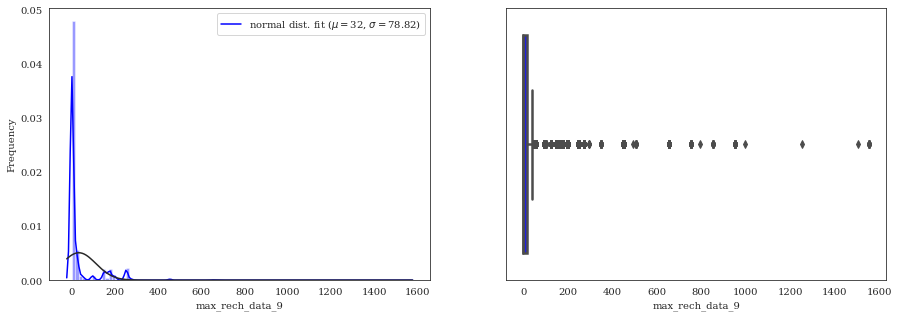

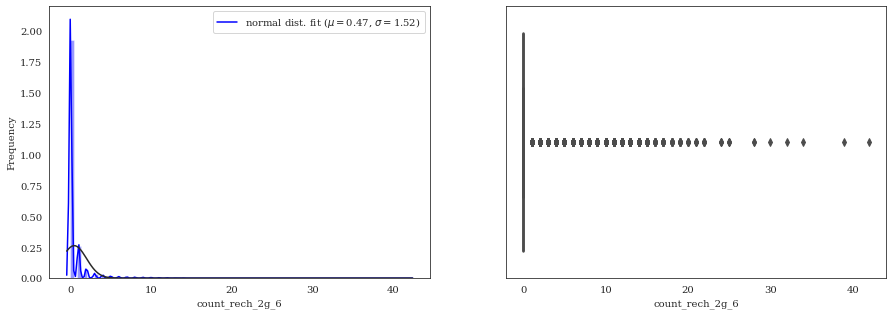

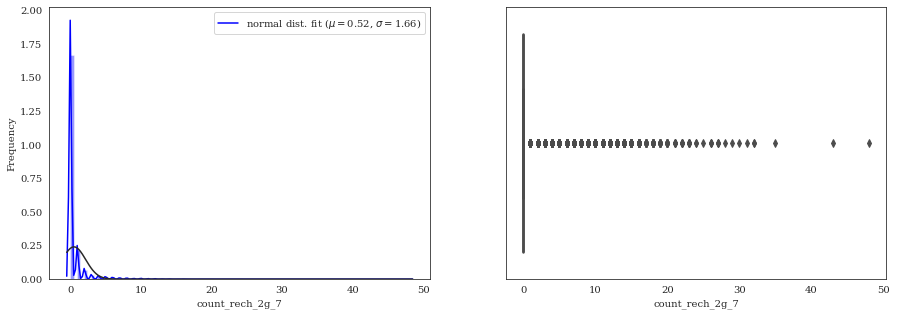

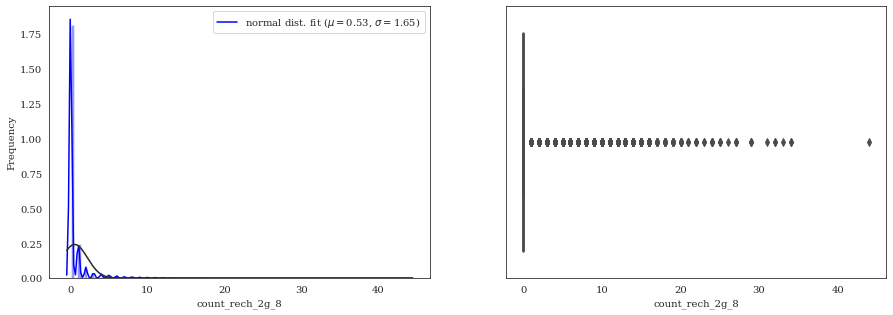

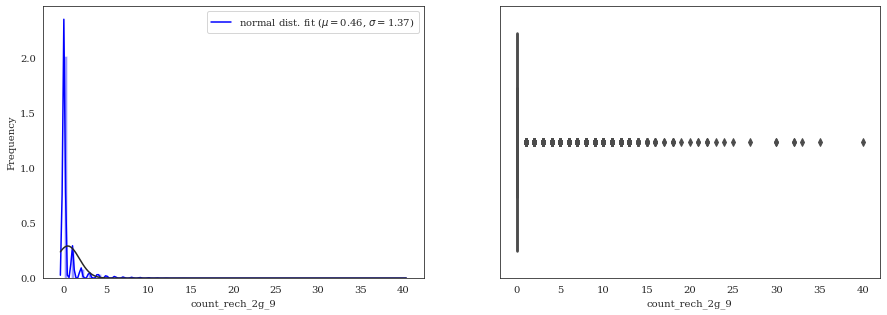

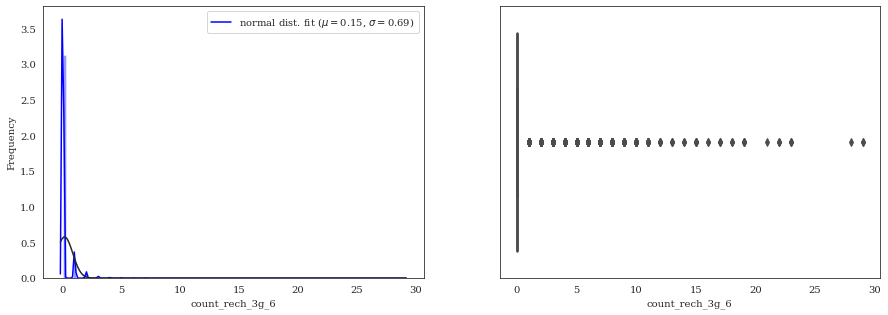

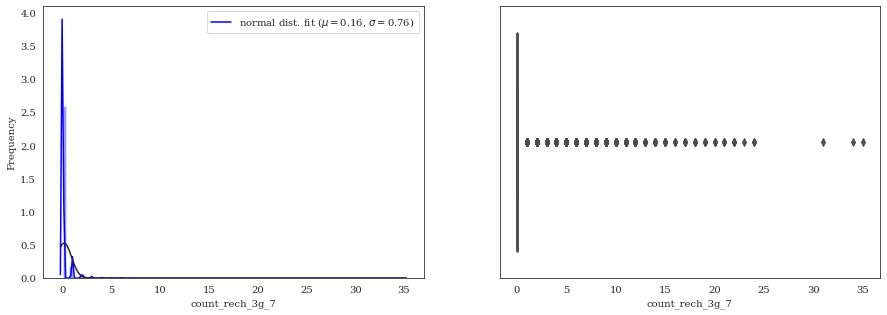

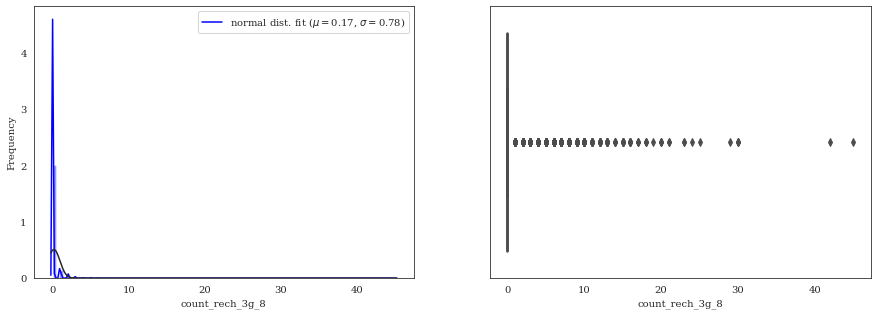

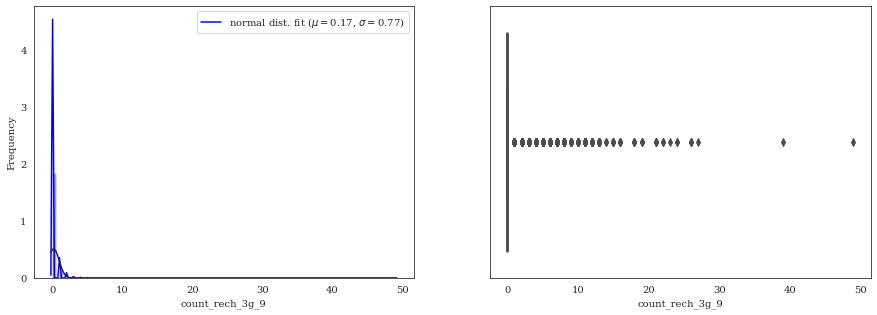

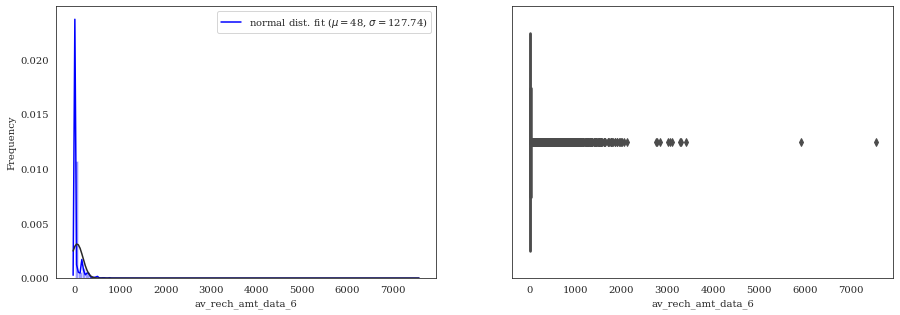

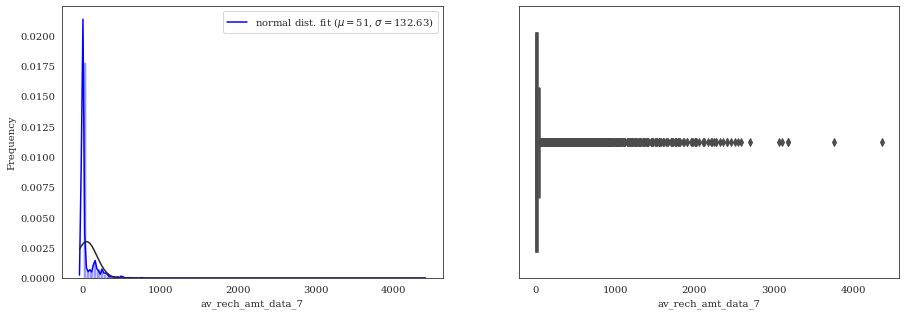

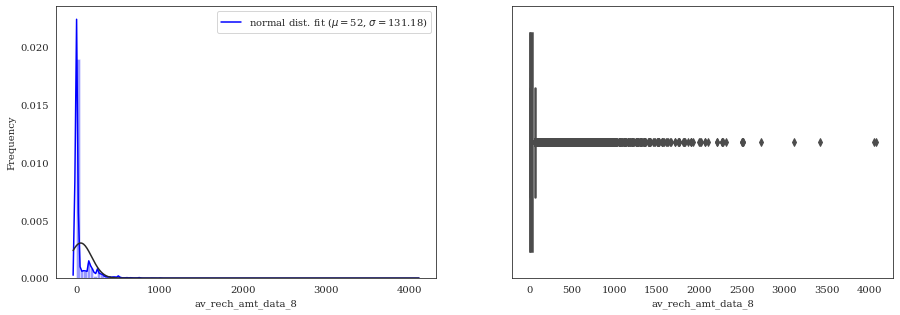

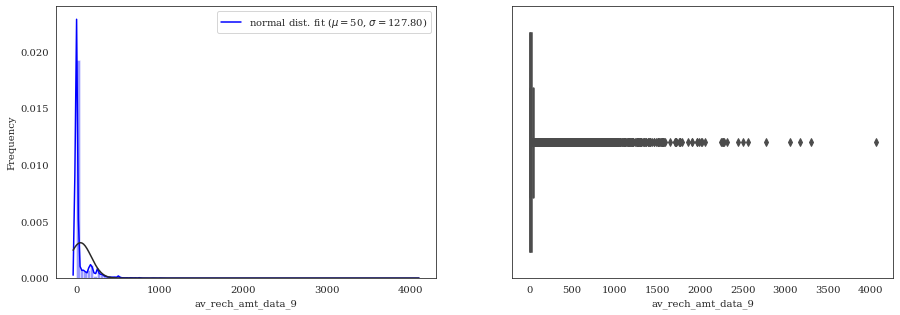

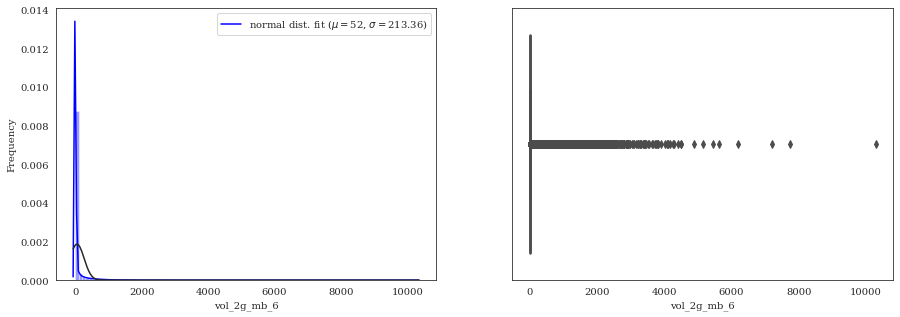

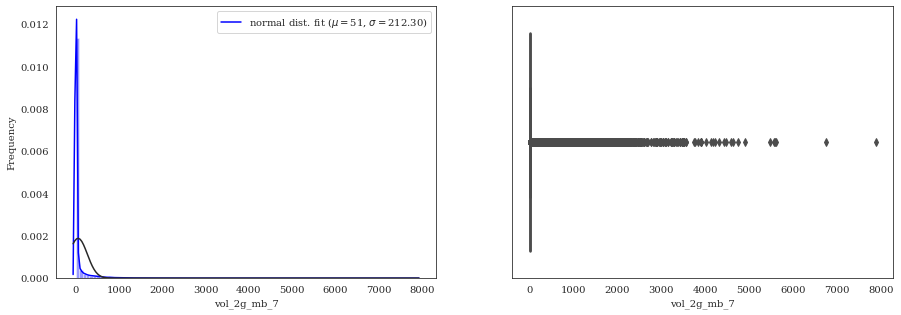

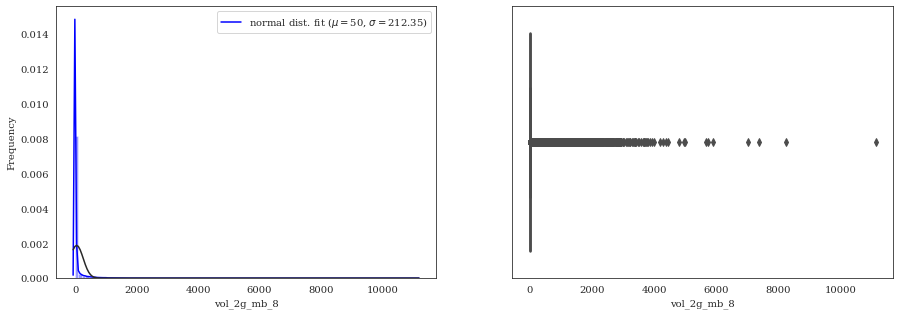

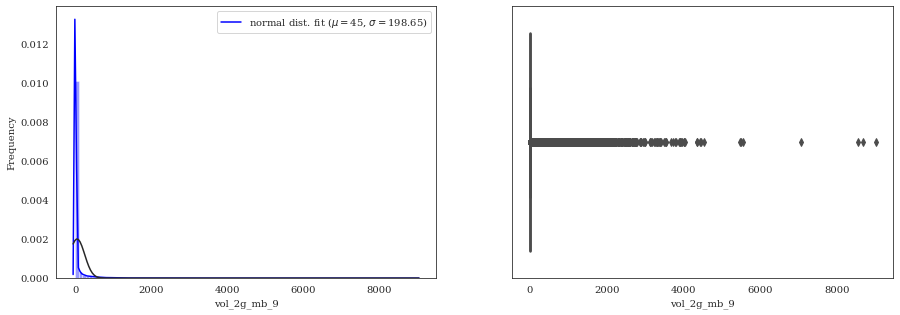

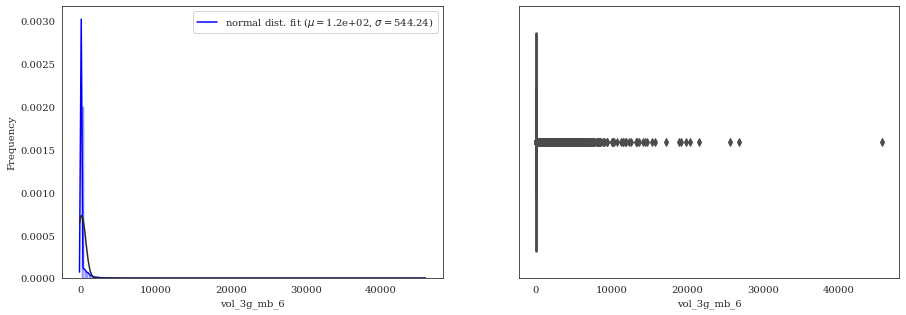

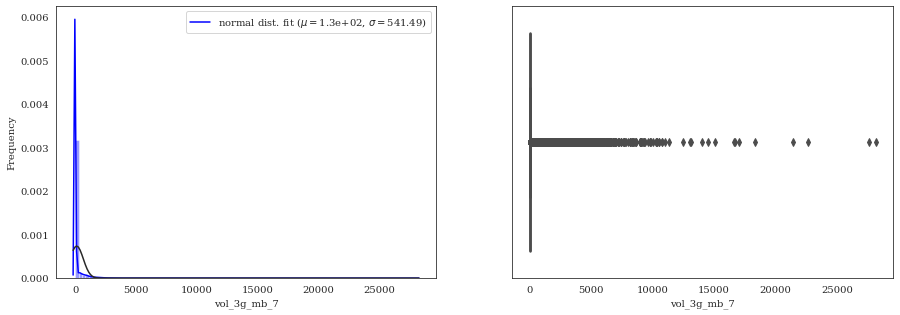

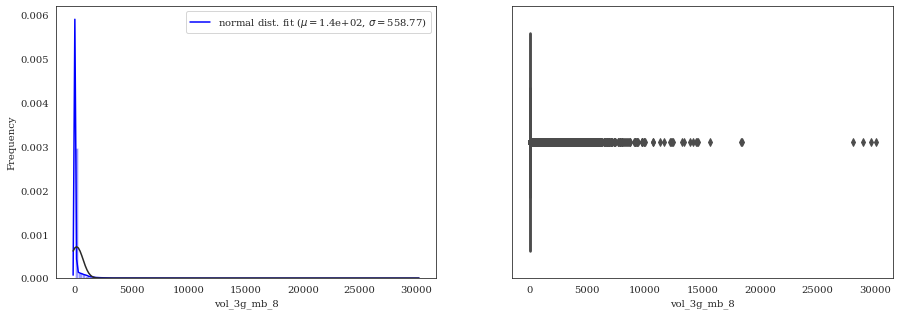

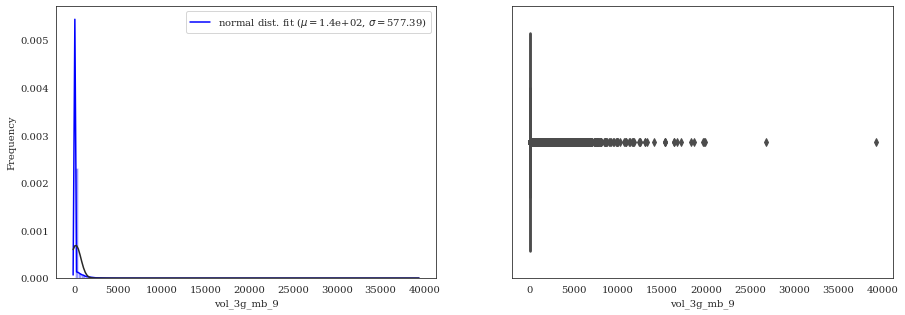

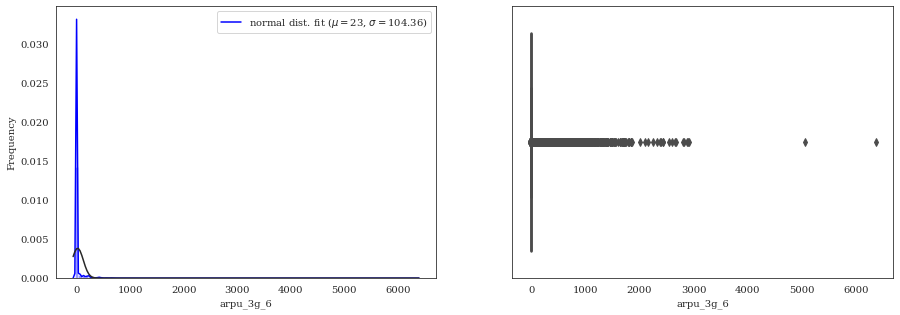

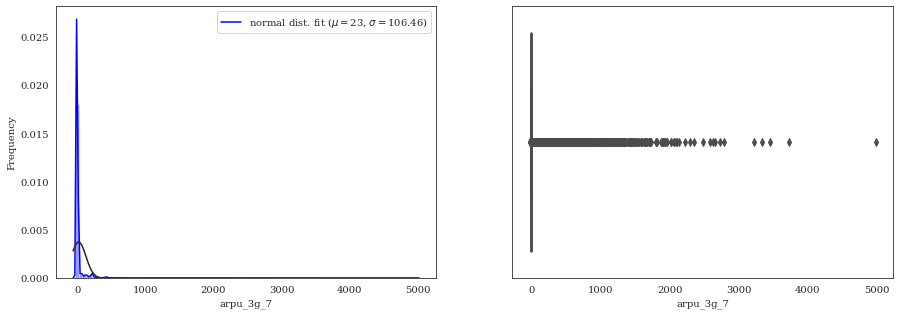

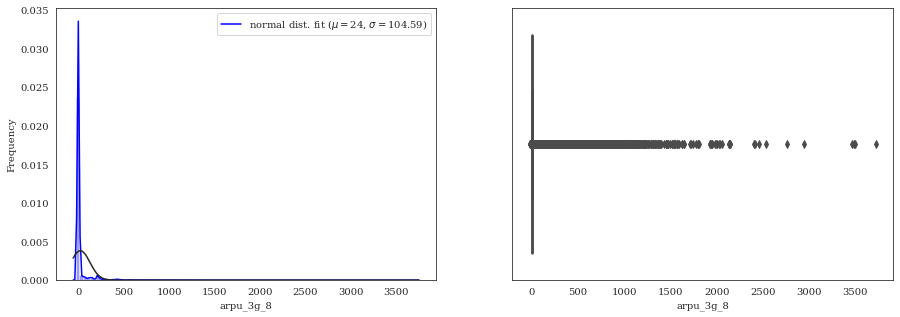

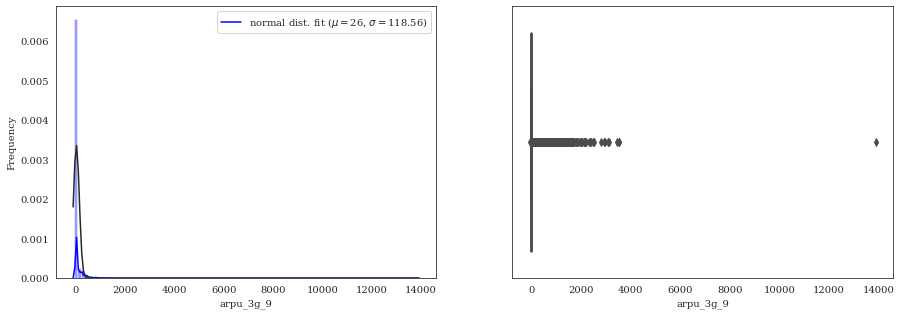

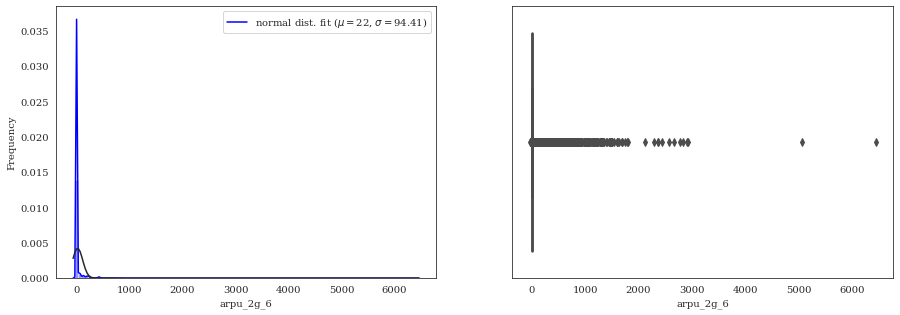

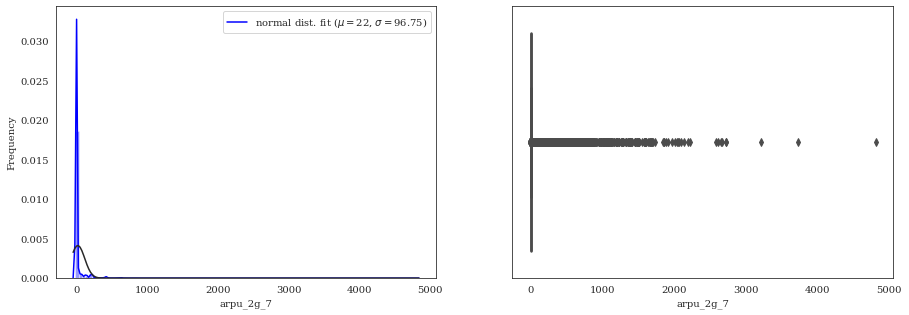

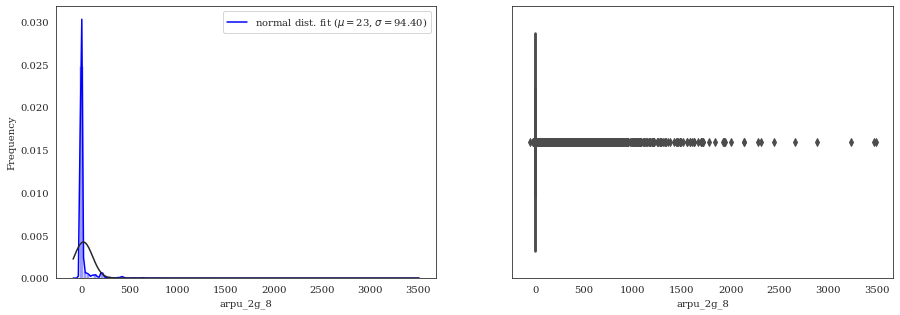

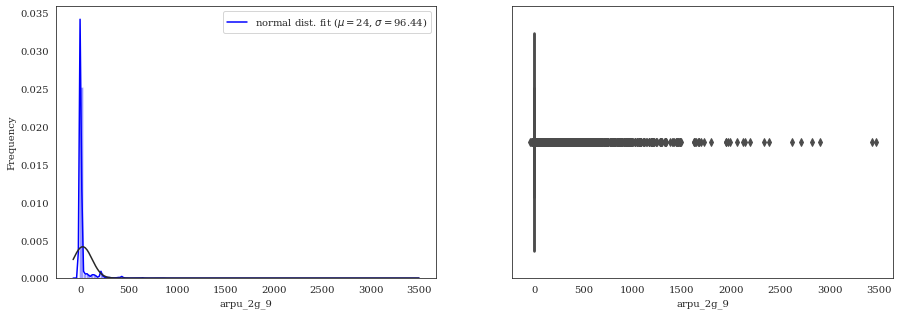

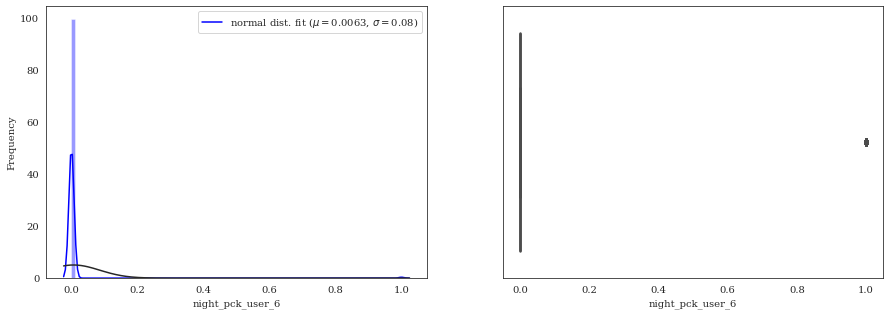

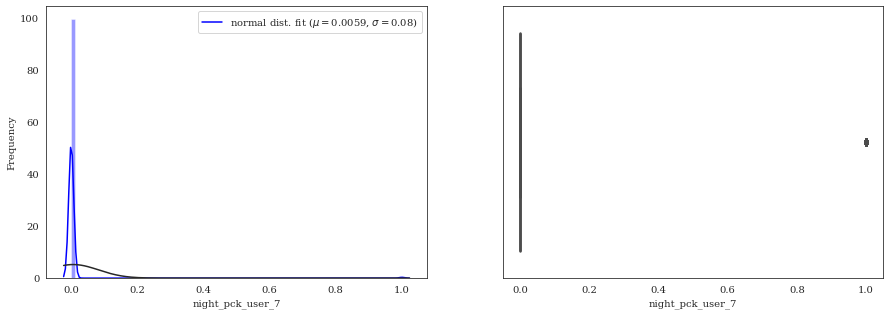

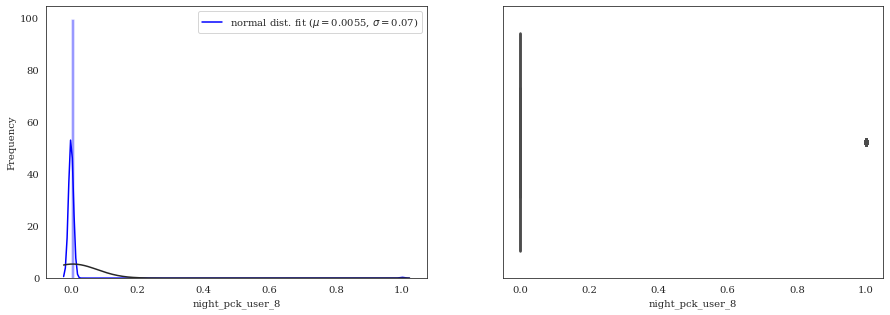

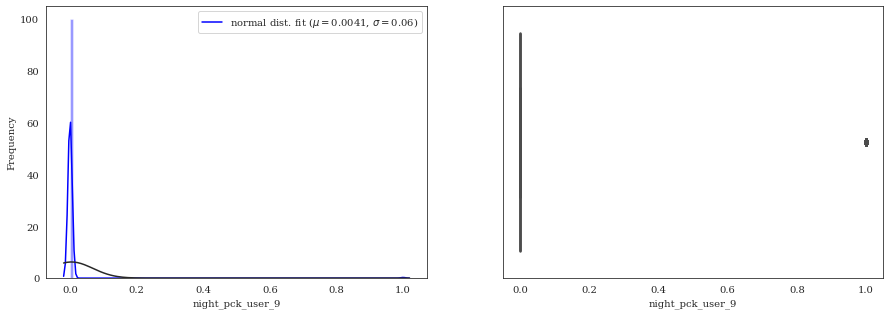

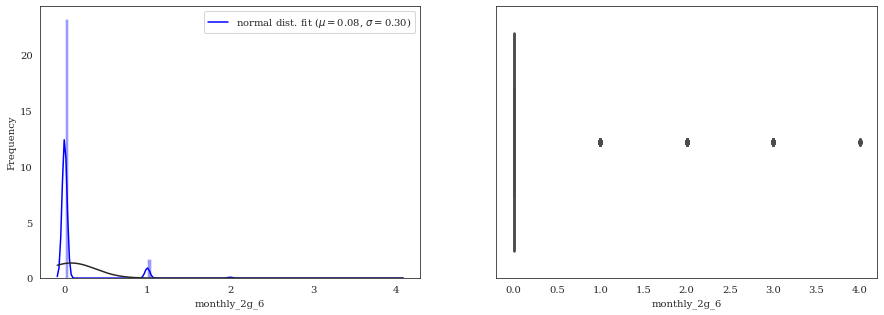

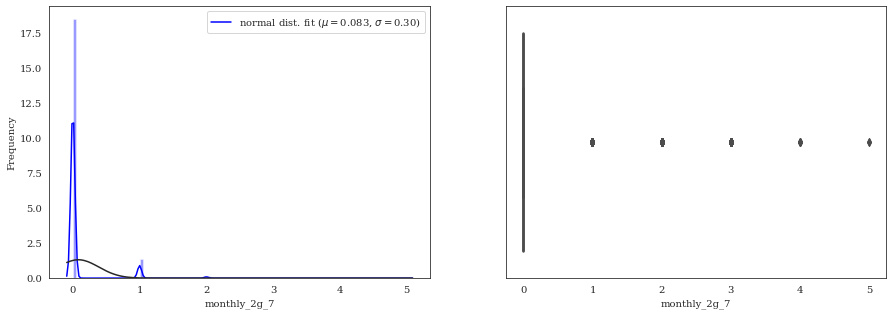

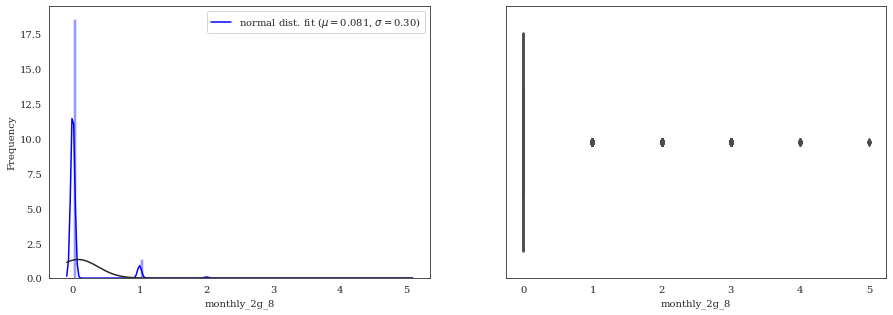

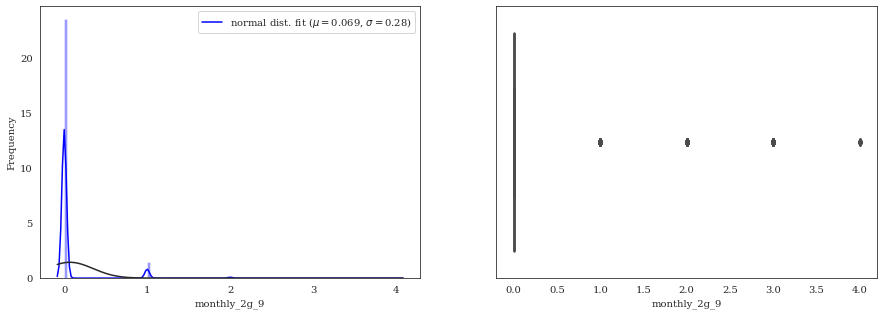

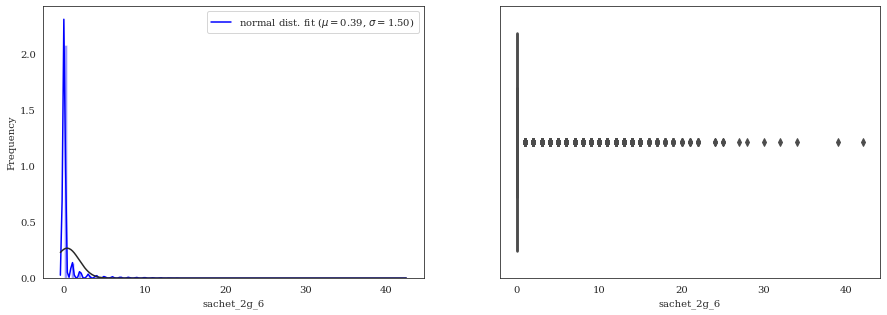

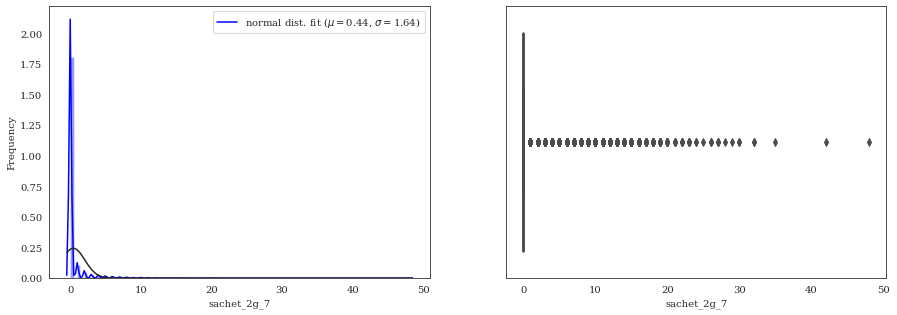

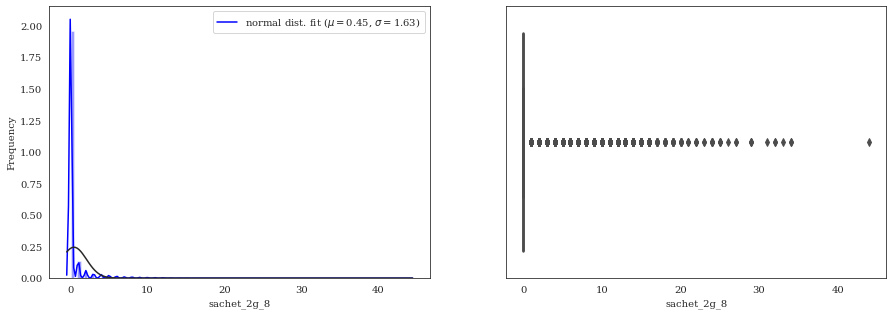

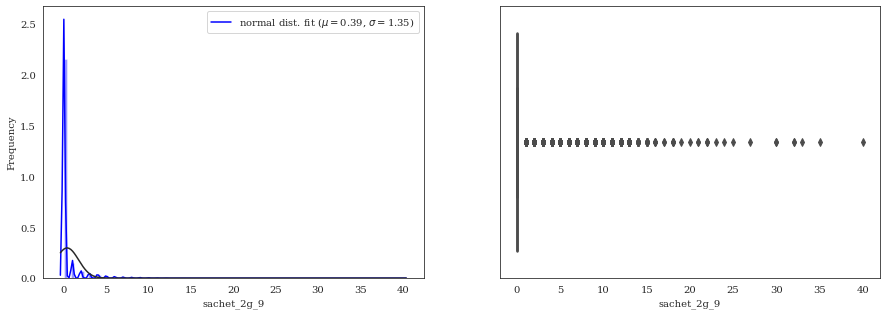

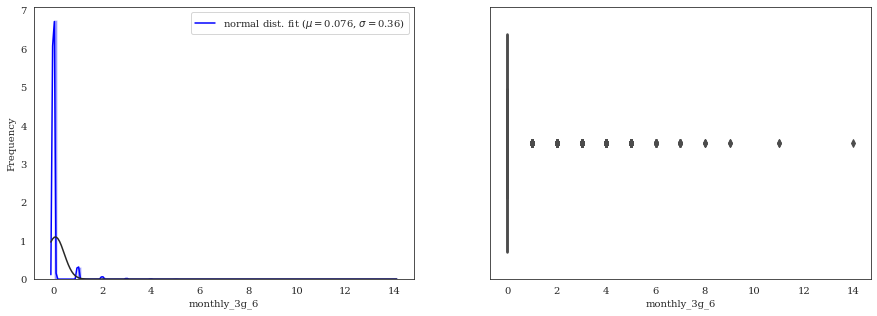

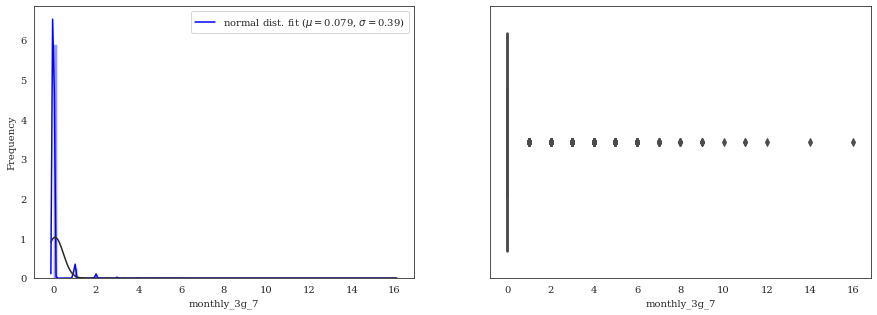

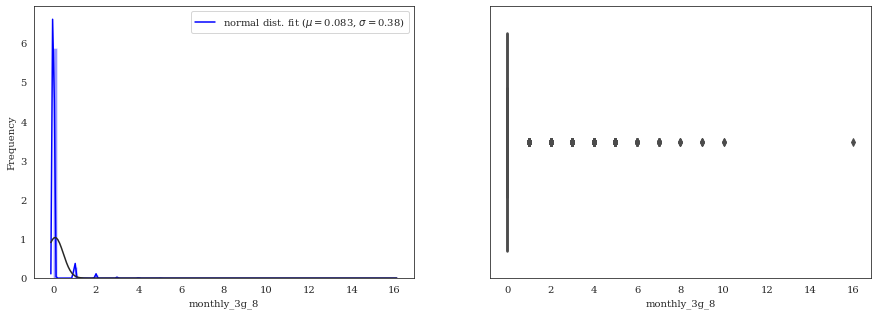

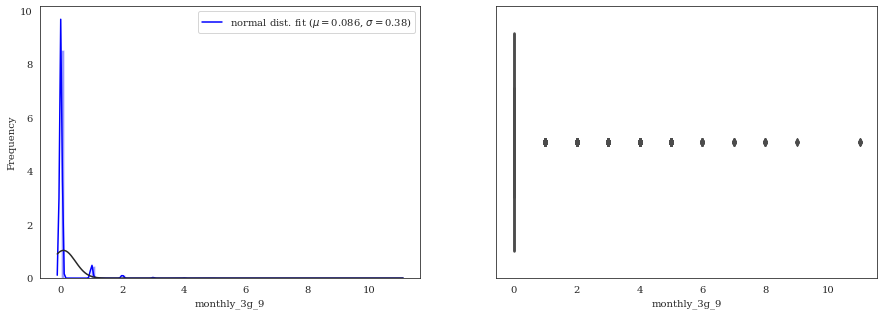

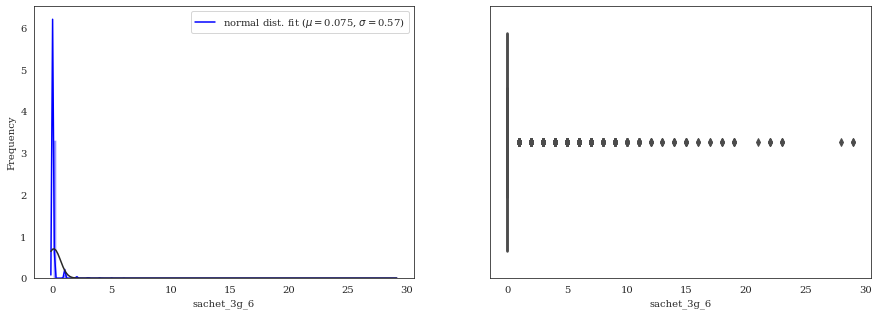

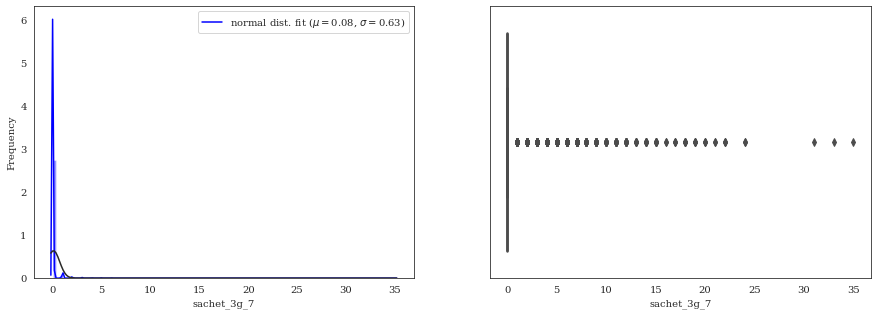

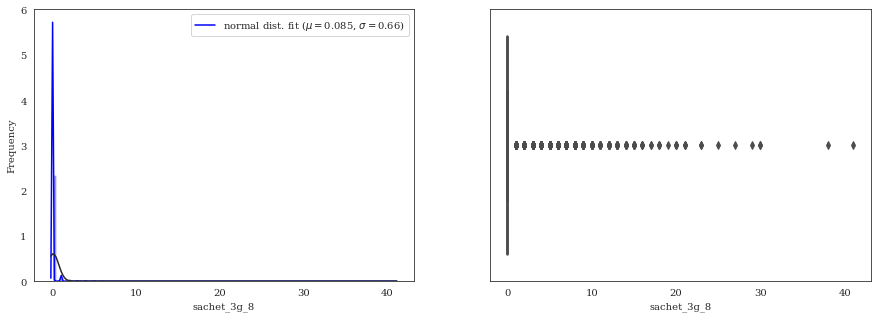

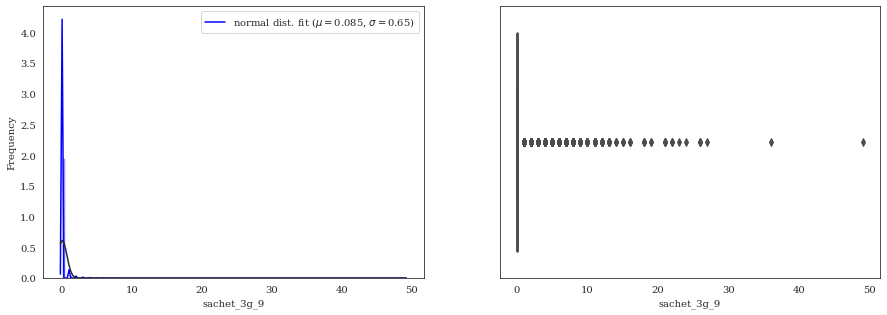

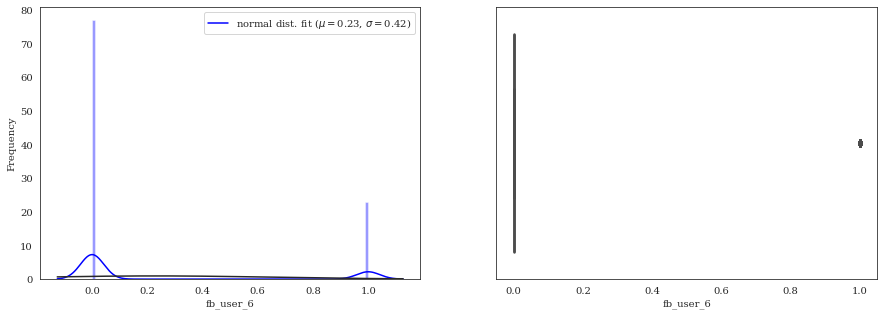

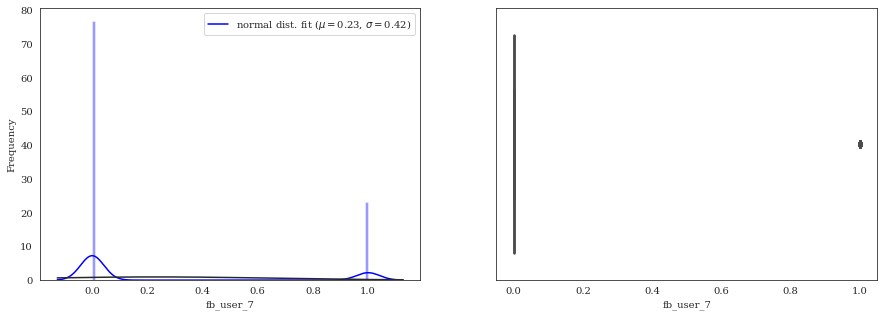

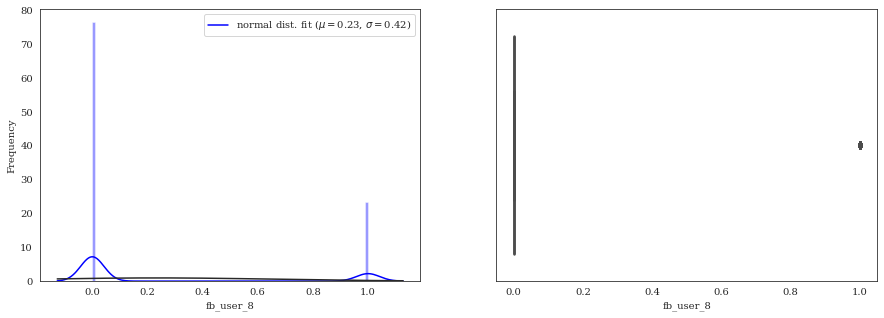

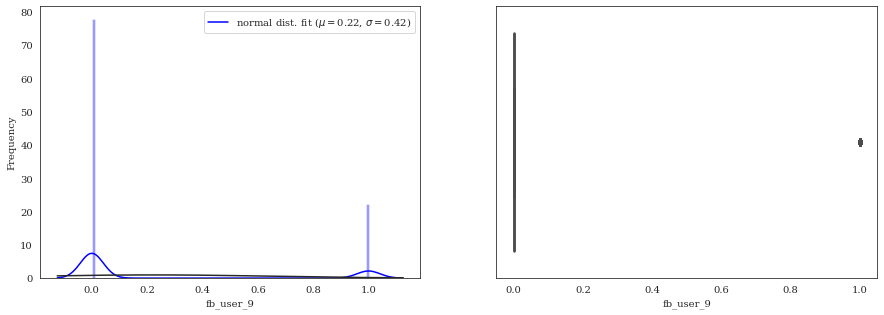

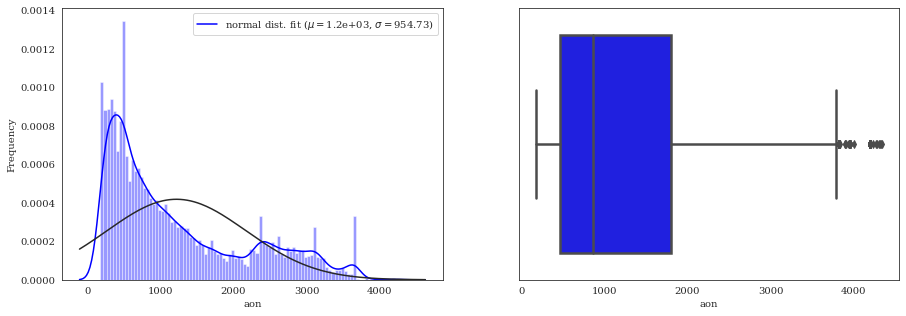

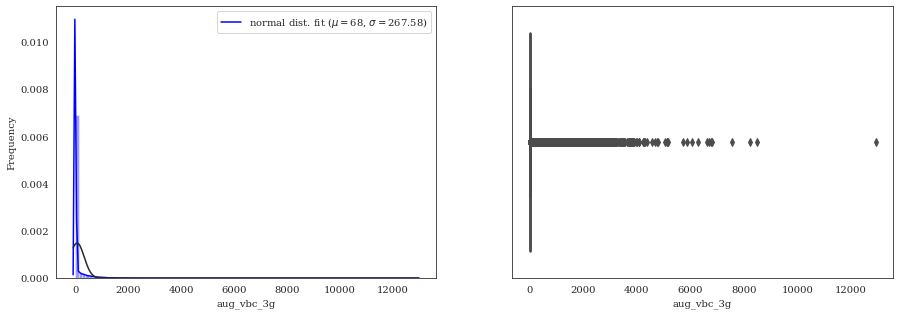

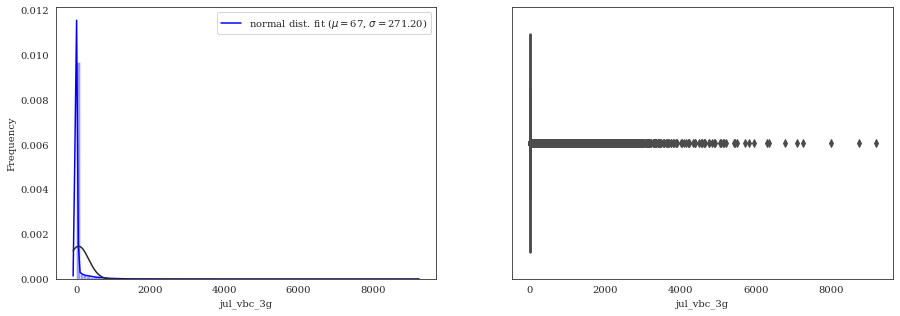

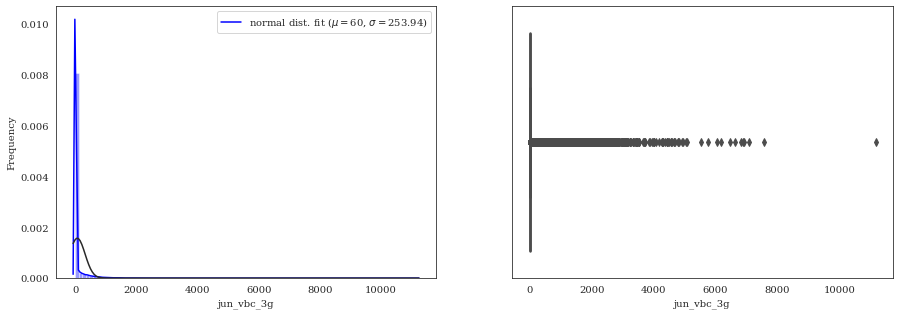

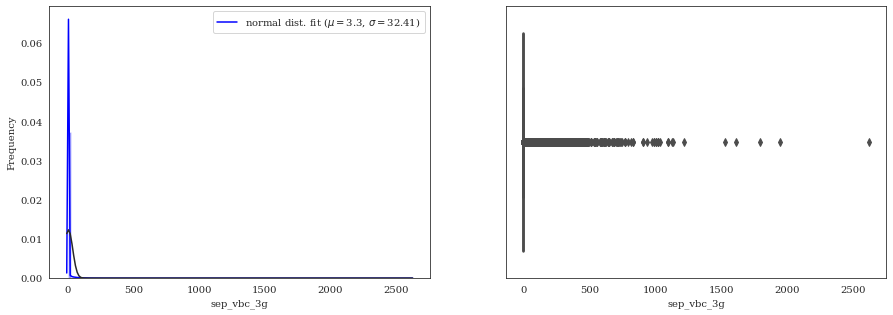

In [18]:
var = df.columns[1:]
for i in tqdm(var):
    plt.figure(figsize=(15,5))
    try:
        plt.subplot(1,2,1)
        sns.distplot(a=df[i], bins=100,kde=True,color='blue', fit=norm)
        (mu, sigma) = norm.fit(df[i])
        plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
        plt.ylabel('Frequency')
        plt.subplot(1,2,2)
        sns.boxplot(x=df[i],color='blue',linewidth=2.5)
       
    except Exception:
        plt.close()
        pass 

plt.show()

## Bivariate analysis by Correlation

## Check Error 

In [21]:
df.isnull().sum().sort_values(ascending = False).head(10)

mobile_number          0
count_rech_2g_6        0
total_rech_amt_8       0
total_rech_amt_9       0
max_rech_amt_6         0
max_rech_amt_7         0
max_rech_amt_8         0
max_rech_amt_9         0
date_of_last_rech_6    0
date_of_last_rech_7    0
dtype: int64

# Filter High Value Customer
We did the filtering and created derived variables 

In [22]:
df

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109            0.00            0.00   
1         7001865778        109            0.00            0.00   
2         7001625959        109            0.00            0.00   
3         7001204172        109            0.00            0.00   
4         7000142493        109            0.00            0.00   
...              ...        ...             ...             ...   
99994     7001548952        109            0.00            0.00   
99995     7000607688        109            0.00            0.00   
99996     7000087541        109            0.00            0.00   
99997     7000498689        109            0.00            0.00   
99998     7001905007        109            0.00            0.00   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                0.00            6/30/2014            7/31/2014   
1                0.00            6/30/2014            7/31/2014   
2                0.00            6/30/2014            7/31/2014   
3                0.00            6/30/2014            7/31/2014   
4                0.00            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99994            0.00            6/30/2014            7/31/2014   
99995            0.00            6/30/2014            7/31/2014   
99996            0.00            6/30/2014            7/31/2014   
99997            0.00            6/30/2014            7/31/2014   
99998            0.00            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9  arpu_6  arpu_7  arpu_8  \
0                8/31/2014            9/30/2014  197.38  214.82  213.80   
1                8/31/2014            9/30/2014   34.05  355.07  268.32   
2                8/31/2014            9/30/2014  167.69  189.06  210.23   
3                8/31/2014            9/30/2014  221.34  251.10  508.05   
4                8/31/2014            9/30/2014  261.64  309.88  238.17   
...                    ...                  ...     ...     ...     ...   
99994            8/31/2014            9/30/2014   18.47   69.16   57.53   
99995            8/31/2014            9/30/2014  112.20   77.81   79.08   
99996            8/31/2014            9/30/2014  229.19    0.00    0.00   
99997            8/31/2014            9/30/2014  322.99  303.39  606.82   
99998            8/31/2014            9/30/2014  687.07    0.00    0.00   

       arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       21.10         0.00         0.00         0.00         0.00   
1       86.28        24.11        78.68         7.68        18.34   
2      290.71        11.54        55.24        37.26        74.81   
3      389.50        99.91        54.39       310.98       241.71   
4      163.43        50.31       149.44        83.89        58.78   
...       ...          ...          ...          ...          ...   
99994   29.95         5.40         3.36         5.91         0.00   
99995  140.84        29.26        18.13        16.06        49.49   
99996    0.00         1.11         0.00         0.00         0.00   
99997  731.01         0.00         0.00         0.00         0.00   
99998    0.00        84.34         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0              0.00          0.00          0.00          0.00           0.00   
1             15.74         99.84        304.76         53.76           0.00   
2            143.33        220.59        208.36        118.91           0.00   
3            123.31        109.01         71.68        113.54           0.00   
4             76.96         91.88        124.26         45.81           0.00   
...             ...           ...           ...           ...            ...   
99994         15.19         54.46         52.79         27.14           0.00   
99995        100.83        

In [23]:
# We Calculated the total Data recharge amount--> Total Data Recharge * Average Amount of Data recharge
df["total_data_recharge_amnt_6"] = df.total_rech_data_6 * df.av_rech_amt_data_6

In [24]:
df["total_data_recharge_amnt_7"] = df.total_rech_data_7 * df.av_rech_amt_data_7

In [25]:
#We Calculated Total Amount recharge --> total talktime recharge + total data recharge
df["total_recharge_amnt_6"] = df.total_rech_amt_6 + df.total_data_recharge_amnt_6
df["total_recharge_amnt_7"] = df.total_rech_amt_7 + df.total_data_recharge_amnt_7

In [26]:
#We Calculated Average amount of recharge of 6th and 7th month
df['average_amnt_6_7'] = (df["total_recharge_amnt_6"] + df["total_recharge_amnt_7"])/2

In [27]:
# We Checked the 70th percentile of "average_amnt_6_7"
df['average_amnt_6_7'].quantile(.70)

478.0

In [28]:
#Further we filter based on 70th percentile .
df_hv = df[df["average_amnt_6_7"]>= df["average_amnt_6_7"].quantile(.70)]

In [29]:
#Then we Deleted the derived columns created in above step
df_hv.drop(columns=["total_data_recharge_amnt_6","total_data_recharge_amnt_7","total_recharge_amnt_6",\
                                "total_recharge_amnt_7","average_amnt_6_7"],inplace=True)

In [30]:
df_hv.shape 

(30001, 226)

In [31]:
# check the data
df_hv.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109            0.00            0.00            0.00   
7      7000701601        109            0.00            0.00            0.00   
8      7001524846        109            0.00            0.00            0.00   
21     7002124215        109            0.00            0.00            0.00   
23     7000887461        109            0.00            0.00            0.00   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9   arpu_6   arpu_7   arpu_8  arpu_9  onnet_mou_6  \
0             9/30/2014   197.38   214.82   213.80   21.10         0.00   
7             9/30/2014 1,069.18 1,349.85 3,171.48  500.00        57.84   
8             9/30/2014   378.72   492.22   137.36  166.79       413.69   
21            9/30/2014   514.45   597.75   637.76  578.60       102.41   
23            9/30/2014    74.35   193.90   366.97  811.48        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          0.00         0.00         0.00          0.00          0.00   
7         54.68        52.29         0.00        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00          0.00           0.00           0.00           0.00   
7         325.91          0.00          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            0.00           0.00           0.00           0.00           0.00   
7            0.00          23.74          12.59          38.06           0.00   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28              0.00   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               0.00              0.00              0.00              0.00   
7             308.63            447.38            162.28              0.00   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               0.00              0.00              0.00              0.00   
7              62.13             55.14             53.23              0.00   
8               0.00              0.00              0.00              0.00   
21    

# Tag churners and remove attributes of the churn phase

In [32]:
#We Calculated total call in mins by adding Incoming and Outgoing calls
df_hv['total_calls_9'] = df_hv.total_ic_mou_9 + df_hv.total_og_mou_9

In [33]:
# We Calculated total 2G and 3G consumption of data
df_hv["total_data_consumptions"] = df_hv.vol_2g_mb_9 + df_hv.vol_3g_mb_9

In [34]:
#We Calculated the Tag 1 as churner  where total_calls_9=0 and total_data_consumptions=0
# else 0 as non-churner
df_hv["churn"]=df_hv.apply(lambda row:1 if (row.total_calls_9==0 and row.total_data_consumptions==0) else 0,axis=1)

In [35]:
# We checked the percentages of churn and non churn data
df_hv["churn"].value_counts(normalize=True)

0   0.92
1   0.08
Name: churn, dtype: float64

In [36]:
#Similarly we dropped the derived columns
df_hv.drop(columns=["total_calls_9","total_data_consumptions"],inplace=True)

In [37]:
# In addition we dropped all 9th month columns
df_hv = df_hv.filter(regex='[^9]$',axis=1)

In [38]:
# Lastly we checked the info about high value customer
df_hv.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 173 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [39]:
# We Created List of Categorical and Continues Variables 
CatrgoricalCols = []
ContinuesCols = []

for col in list(df_hv):
    if df_hv[col].dtypes == 'object':
        CatrgoricalCols.append(col)  
    else:
        ContinuesCols.append(col)
print('Categorical columns:\n',CatrgoricalCols)

print('Continues Variable columns:\n',ContinuesCols)

Categorical columns:
 ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
Continues Variable columns:
 ['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_

## Train Test Split

In [40]:
seed = 100
train, test = train_test_split(df_hv, train_size =0.7, test_size=0.3, random_state=seed)

In [41]:
print('train Shape:', train.shape)
print('test Shape:', test.shape)


train Shape: (21000, 173)
test Shape: (9001, 173)


In [42]:
#Convert categorical data to numeric columns by aggregation.
categorical_columns = ["night_pck_user_6","night_pck_user_7",
                       "night_pck_user_8","fb_user_6",          
                       "fb_user_8","fb_user_7"]  

In [43]:
train[categorical_columns].head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
39186              0.00              0.00              0.00       0.00   
39833              0.00              0.00              0.00       1.00   
38778              0.00              0.00              0.00       1.00   
43026              0.00              0.00              0.00       0.00   
12271              0.00              0.00              0.00       1.00   

       fb_user_8  fb_user_7  
39186       0.00       0.00  
39833       1.00       1.00  
38778       0.00       1.00  
43026       0.00       0.00  
12271       1.00       1.00

In [44]:
## we create y variables for churn

In [45]:
#Calculate categorical features mean and replace those with categorical value
print(train.groupby('night_pck_user_6')["churn"].mean())
print(train.groupby('night_pck_user_7')["churn"].mean())
print(train.groupby('night_pck_user_8')["churn"].mean())
print(train.groupby('fb_user_6')["churn"].mean())
print(train.groupby('fb_user_7')["churn"].mean())
print(train.groupby('fb_user_8')["churn"].mean())

night_pck_user_6
0.00   0.08
1.00   0.09
Name: churn, dtype: float64
night_pck_user_7
0.00   0.08
1.00   0.06
Name: churn, dtype: float64
night_pck_user_8
0.00   0.08
1.00   0.03
Name: churn, dtype: float64
fb_user_6
0.00   0.10
1.00   0.07
Name: churn, dtype: float64
fb_user_7
0.00   0.11
1.00   0.06
Name: churn, dtype: float64
fb_user_8
0.00   0.13
1.00   0.02
Name: churn, dtype: float64


In [46]:
# We Mapped each categorical value with mean value
mapping = {'night_pck_user_6' : {0: 0.08,  1: 0.09},
           'night_pck_user_7' : {0: 0.08,  1: 0.06},
           'night_pck_user_8' : {0: 0.08,  1: 0.03},
           'fb_user_6'        : {0: 0.10,  1: 0.07},
           'fb_user_7'        : {0: 0.11,  1: 0.06},
           'fb_user_8'        : {0: 0.13,  1: 0.02}}

#convert categorical to Numeric features by aggregation and replace in train data
train.replace(mapping, inplace = True)
#replace the same in test data
test.replace(mapping, inplace = True)

In [47]:
y_train = train.pop("churn")
X_train = train

In [48]:
y_test = test.pop("churn")
X_test = test

In [49]:
# Create List of Categorical and Continues Variables 
CatrgoricalCols = []
ContinuesCols = []

for col in list(X_train):
    if X_train[col].dtypes == 'object':
        CatrgoricalCols.append(col)  
    else:
        ContinuesCols.append(col)
print('Categorical columns:\n',CatrgoricalCols)

print('Continues Variable columns:\n',ContinuesCols)

Categorical columns:
 ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
Continues Variable columns:
 ['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_

In [50]:
scale = StandardScaler()
create_x_train = scale.fit_transform(X_train[ContinuesCols])

#Form the dataframe after scaling
df_scale = pd.DataFrame(create_x_train,columns=ContinuesCols)
# Check the shape of scaled data
df_scale.shape

(21000, 163)

In [51]:
# After scaling Training Data we perform the scaling on test set
create_x_test = scale.transform(X_test[ContinuesCols])
# form the test set dataframe after scaling
X_test_scale = pd.DataFrame(create_x_test,columns=ContinuesCols)

In [52]:
# For feature reduction we use PCA
pc_class = PCA(random_state=seed)
X_train_pca = pc_class.fit(df_scale)

In [53]:
# We Checked the explained_variance_ratio_ to understand the principal component variance.
X_train_pca.explained_variance_ratio_

array([1.11853470e-01, 9.29263317e-02, 6.44348993e-02, 5.15772557e-02,
       3.86769242e-02, 3.40169363e-02, 2.79294840e-02, 2.55723672e-02,
       2.45756603e-02, 2.23401014e-02, 2.08512920e-02, 1.86749605e-02,
       1.84882726e-02, 1.82645178e-02, 1.75073176e-02, 1.71984403e-02,
       1.57313163e-02, 1.39475782e-02, 1.33450025e-02, 1.28716036e-02,
       1.26884464e-02, 1.21525622e-02, 1.16562413e-02, 1.08095086e-02,
       1.07556634e-02, 1.02376110e-02, 1.00191152e-02, 9.03587999e-03,
       8.42595218e-03, 8.16037389e-03, 7.80149633e-03, 7.54040854e-03,
       7.33961857e-03, 7.03842071e-03, 7.00770895e-03, 6.65076493e-03,
       6.37372200e-03, 6.17007305e-03, 6.10415732e-03, 5.98780933e-03,
       5.81561812e-03, 5.43459964e-03, 5.29612578e-03, 5.13288896e-03,
       5.05437799e-03, 4.95181779e-03, 4.83866251e-03, 4.65597096e-03,
       4.51673350e-03, 4.31738506e-03, 4.14568507e-03, 4.04412898e-03,
       3.97994052e-03, 3.87678597e-03, 3.70755079e-03, 3.54384099e-03,
      

In [54]:
# Then we performed the cumulaltive sum of explained variance
var_cumu = np.cumsum(X_train_pca.explained_variance_ratio_)
#And Converted explained variance to DataFrame
var_cumu_df = pd.DataFrame({"variance":var_cumu}) 
var_cumu_df.head(30) 

variance
0       0.11
1       0.20
2       0.27
3       0.32
4       0.36
5       0.39
6       0.42
7       0.45
8       0.47
9       0.49
10      0.51
11      0.53
12      0.55
13      0.57
14      0.59
15      0.60
16      0.62
17      0.63
18      0.65
19      0.66
20      0.67
21      0.69
22      0.70
23      0.71
24      0.72
25      0.73
26      0.74
27      0.75
28      0.76
29      0.76

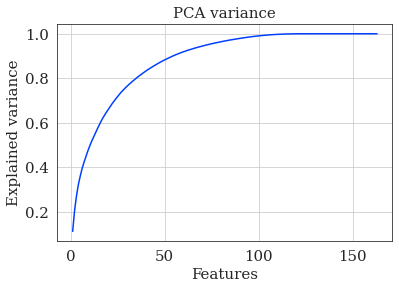

In [55]:
# Plot the cumulative explained variance 
plt.figure(figsize=[6,4])
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.title("PCA variance",size=15)
plt.ylabel("Explained variance",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

In [56]:
# We Find the suitable principal components.
pca_demo = PCA(0.95,random_state=seed)
X_train_pca1 = pca_demo.fit_transform(df_scale)
print(f" principal components for 95% of variance:{X_train_pca1.shape[1]}")

 principal components for 95% of variance:73


# Model Building 
### Due to limitation of time - we use RandomForest Classifier 

In [57]:
y_train.count()

21000

In [58]:
# Due to my schedule I was able to model RandomForest, by training with default parameters
# However if I had more time I would run the hyperparmeters
rf_class = RandomForestClassifier(n_jobs=-1) #class_weight={0:1,1:2}
rf_class.fit(df_scale,y_train)

RandomForestClassifier(n_jobs=-1)

In [59]:
# We created list Feature importance dataframe
Feature_importance = pd.DataFrame({"columns":ContinuesCols,"feature_importance":rf_class.feature_importances_})

In [60]:
#checked the top 10 important features
fi = Feature_importance.sort_values(by="feature_importance",ascending=False).head(10)
fi

columns  feature_importance
67     loc_ic_t2m_mou_8                0.05
73         loc_ic_mou_8                0.05
91       total_ic_mou_8                0.04
61       total_og_mou_8                0.04
7                arpu_8                0.03
64     loc_ic_t2t_mou_8                0.03
106    total_rech_amt_8                0.02
34         loc_og_mou_8                0.02
112  last_day_rch_amt_8                0.02
25     loc_og_t2m_mou_8                0.02

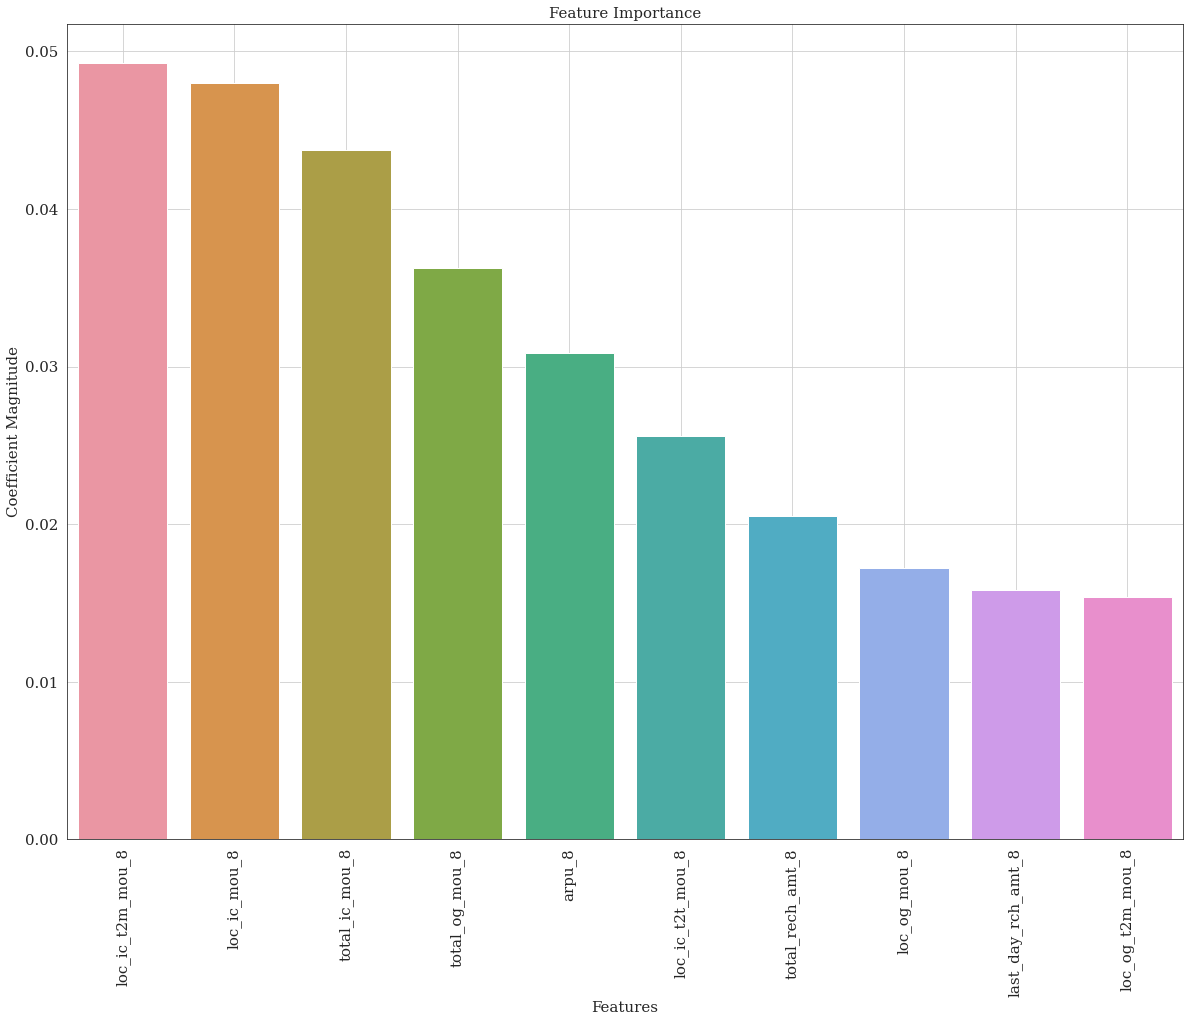

In [63]:
#Plot to show the feature importance
plt.figure(figsize=[20,15])
sns.barplot(x = "columns",y="feature_importance",data=fi)
plt.title("Feature Importance",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Magnitude",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

In [64]:
y_pred_rf = rf_class.predict(X_test_scale)
pred_prob = rf_class.predict_proba(X_test_scale)

In [65]:
#check the default parameters
rf_class.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [66]:
y_test

20296    1
8279     1
72269    0
65602    0
42758    1
        ..
40214    0
59799    0
18784    0
4712     0
15296    0
Name: churn, Length: 9001, dtype: int64

In [67]:
precision = metrics.precision_score(y_test,y_pred_rf)
print(f"precision: {precision}")
recall = metrics.recall_score(y_test,y_pred_rf)
print(f"recall: {recall}")

precision: 0.7703862660944206
recall: 0.4786666666666667


In [68]:
f1_score = metrics.f1_score(y_test,y_pred_rf)
print(f"f1_score: {f1_score}")

f1_score: 0.5904605263157895


In [69]:
#check the classification report
print(metrics.classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8251
           1       0.77      0.48      0.59       750

    accuracy                           0.94      9001
   macro avg       0.86      0.73      0.78      9001
weighted avg       0.94      0.94      0.94      9001



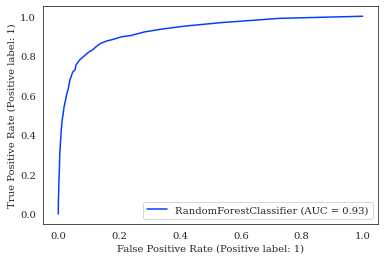

In [70]:
#plot roc auc cureve
metrics.plot_roc_curve(rf_class, X_test_scale, y_test)
plt.show()

In [71]:
fi

columns  feature_importance
67     loc_ic_t2m_mou_8                0.05
73         loc_ic_mou_8                0.05
91       total_ic_mou_8                0.04
61       total_og_mou_8                0.04
7                arpu_8                0.03
64     loc_ic_t2t_mou_8                0.03
106    total_rech_amt_8                0.02
34         loc_og_mou_8                0.02
112  last_day_rch_amt_8                0.02
25     loc_og_t2m_mou_8                0.02

## Conclusion
We suggest the above top 10 features which will likely to predict churning.
